In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from collections import defaultdict

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
# load dataset
df = pd.read_csv('data/mushrooms.csv')
df.shape

(8124, 23)

 **In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfitting**

In [4]:
### check target
df['class'].value_counts()/len(df)
### it's a balanced data set

e    0.517971
p    0.482029
Name: class, dtype: float64

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['class'], axis=1),  # drop the target
    df['class'],  # just the target
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((6499, 22), (1625, 22))

In [6]:
cat_columns = X_train.columns
X_train['class'] = y_train
X_train.head(5)

cap-shape cap-surface cap-color bruises odor gill-attachment  \
7434         k           s         g       f    n               f   
7725         x           f         w       f    n               f   
783          x           s         w       t    l               f   
1928         f           s         w       f    n               f   
7466         k           y         e       f    y               f   

     gill-spacing gill-size gill-color stalk-shape  ...  \
7434            w         b          p           e  ...   
7725            w         b          g           e  ...   
783             c         b          n           e  ...   
1928            w         b          h           t  ...   
7466            c         n          b           t  ...   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
7434                      w                      w         p          w   
7725                      w                      w         p          w   
783                       w                      w         p          w   
1928                      w                      w         p          w   
7466                      w                      p         p          w   

     ring-number ring-type spore-print-color population habitat class  
7434           t         p                 w          s       g     e  
7725           t         p                 w          n       g     e  
783            o         p                 k          s       m     e  
1928           o         e                 k          s       g     e  
7466           o         e                 w          v       l     p  

[5 rows x 23 columns]

In [7]:
plt.style.use('seaborn')
pdf = matplotlib.backends.backend_pdf.PdfPages("countplots.pdf")

C:\Users\Me\AppData\Local\Temp\ipykernel_23204\3697959800.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 8))


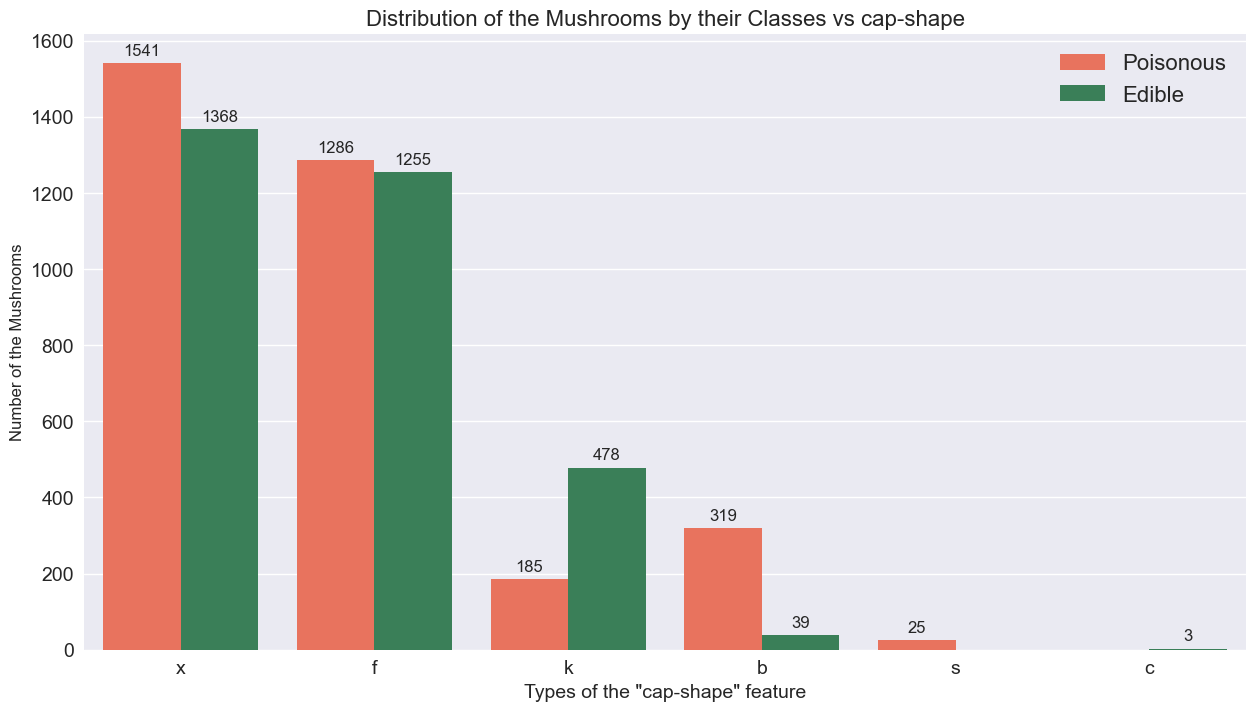

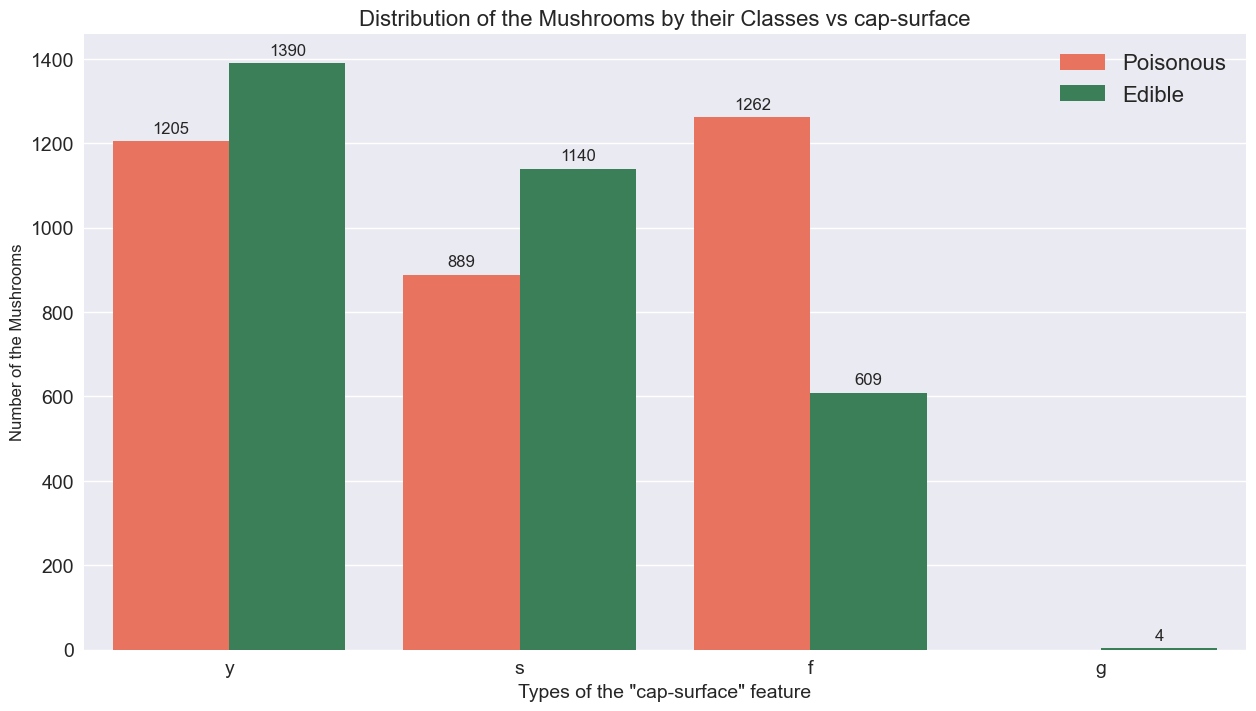

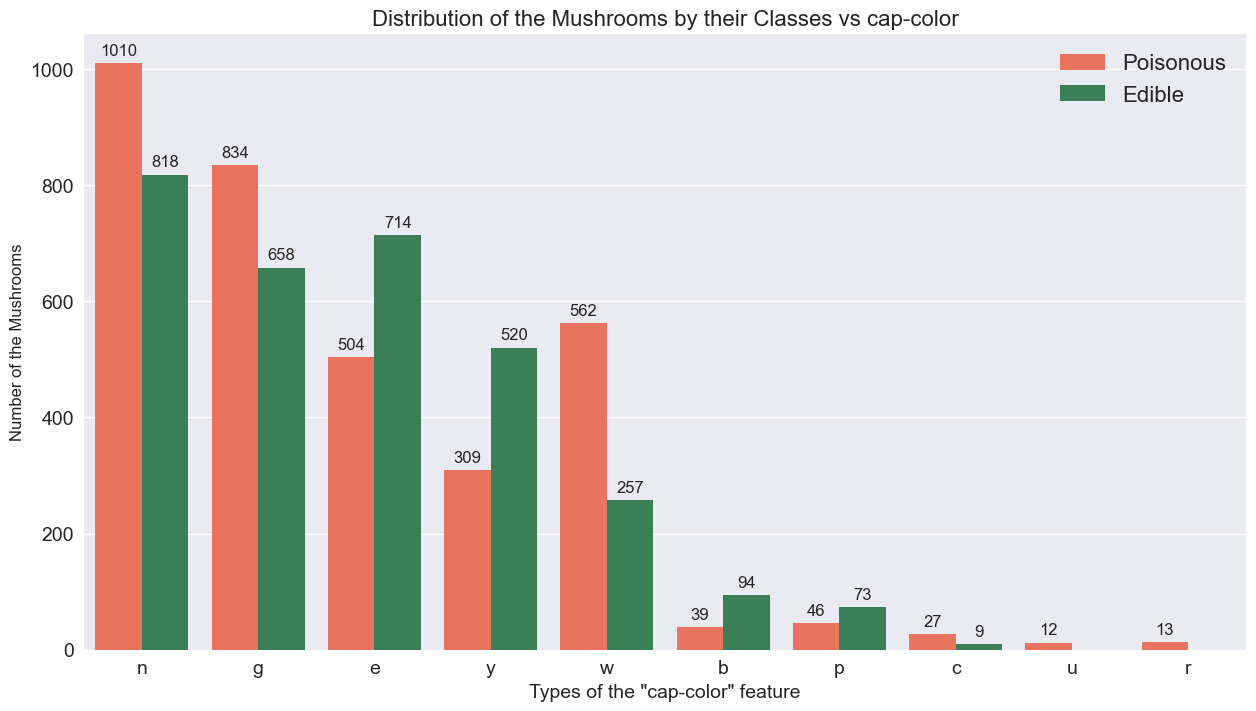

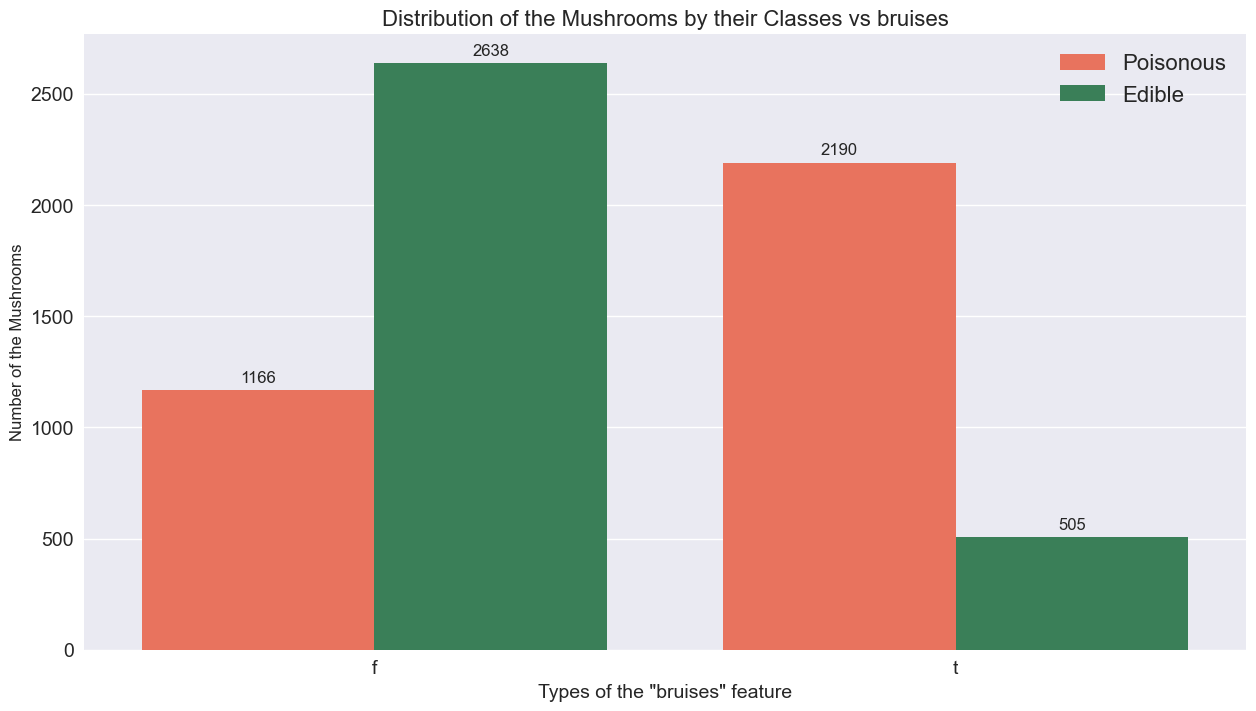

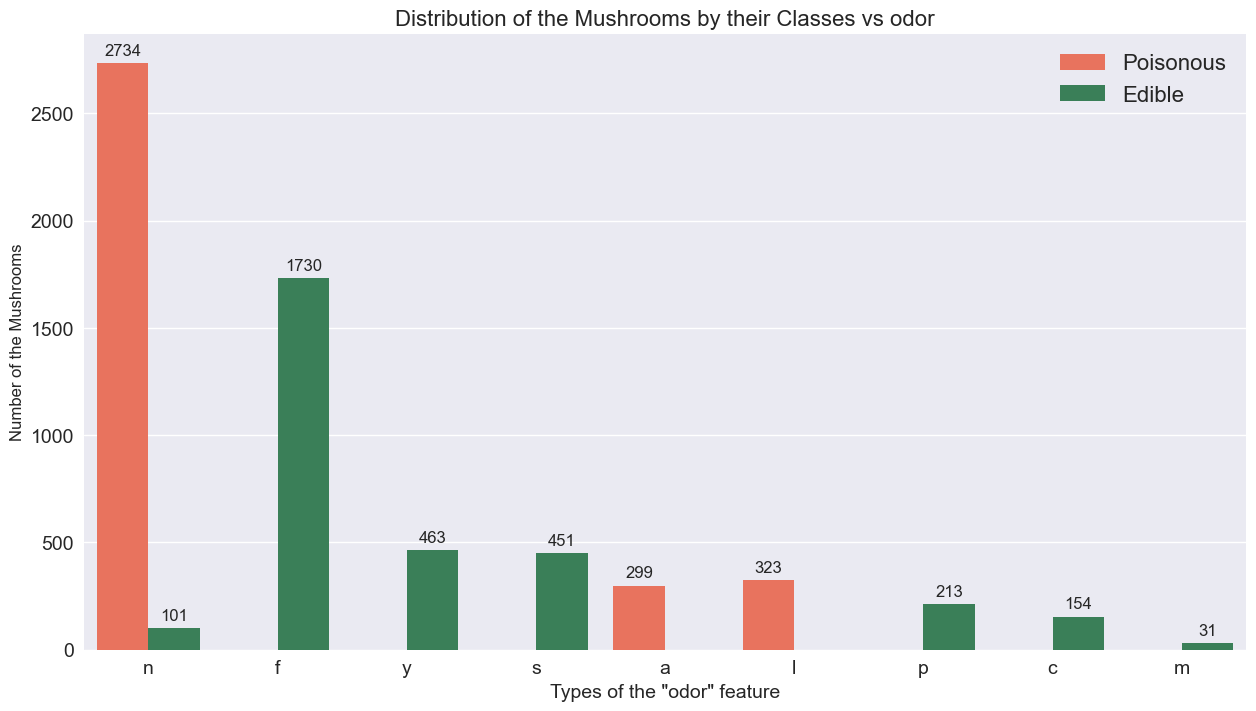

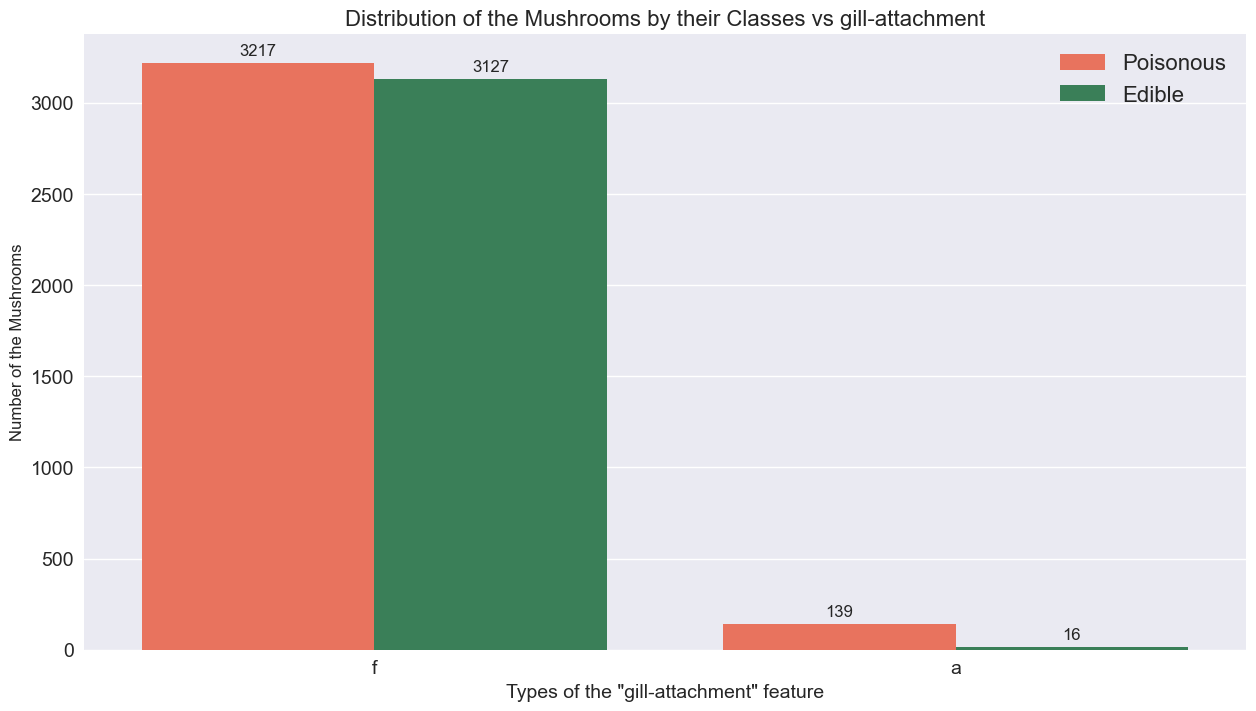

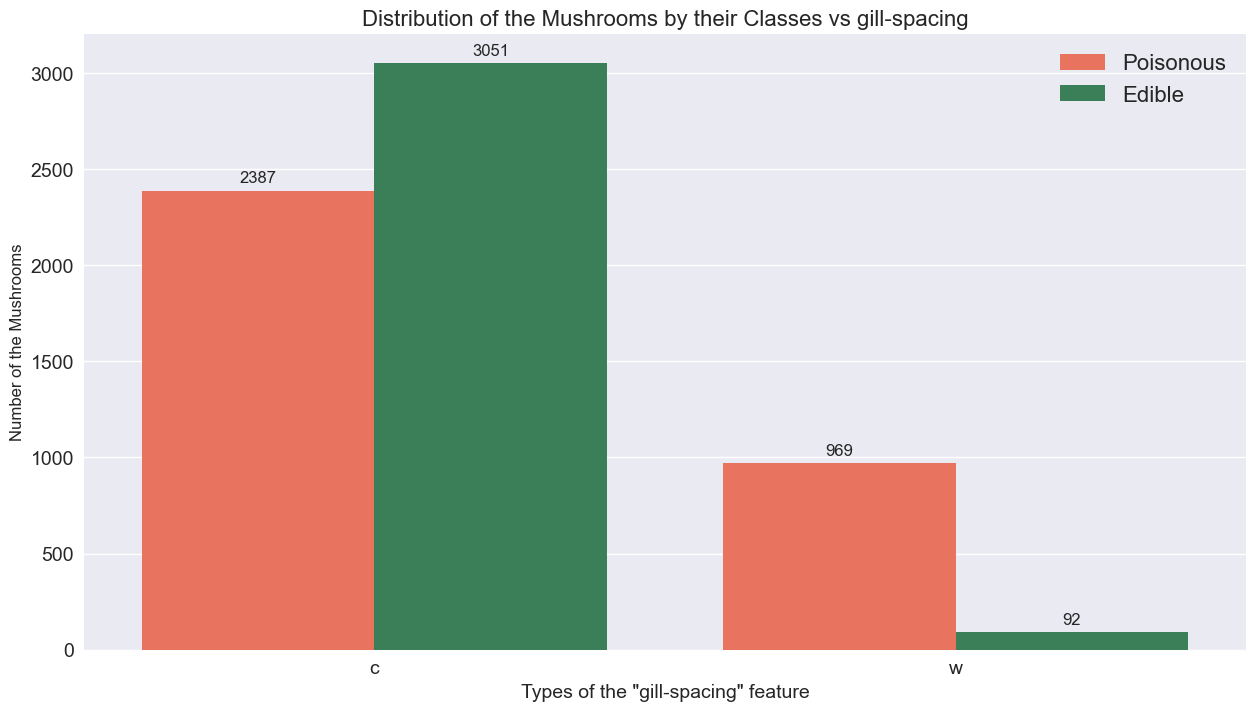

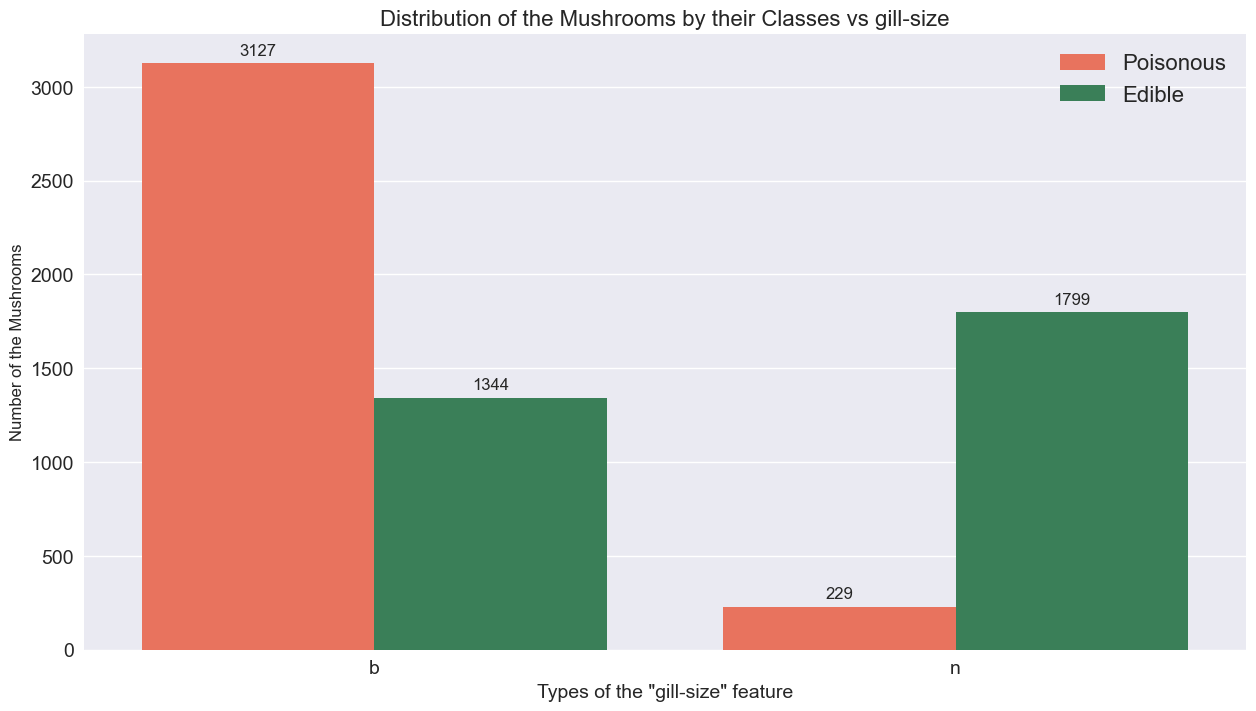

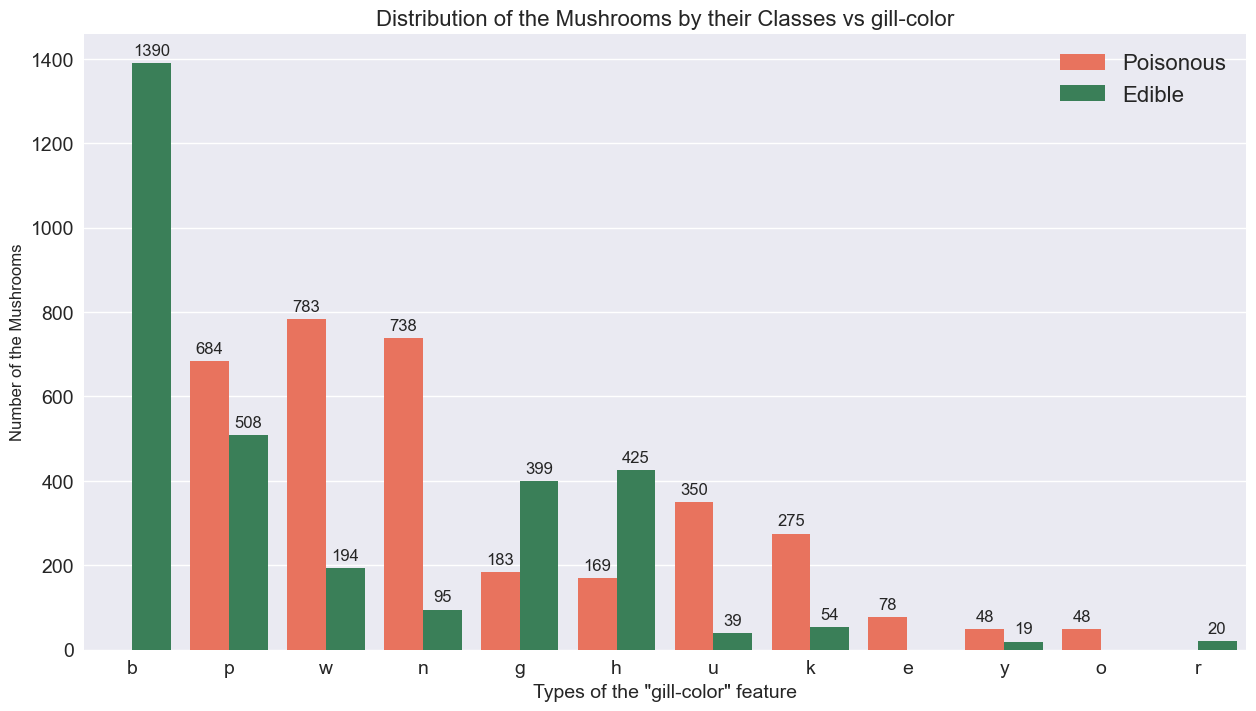

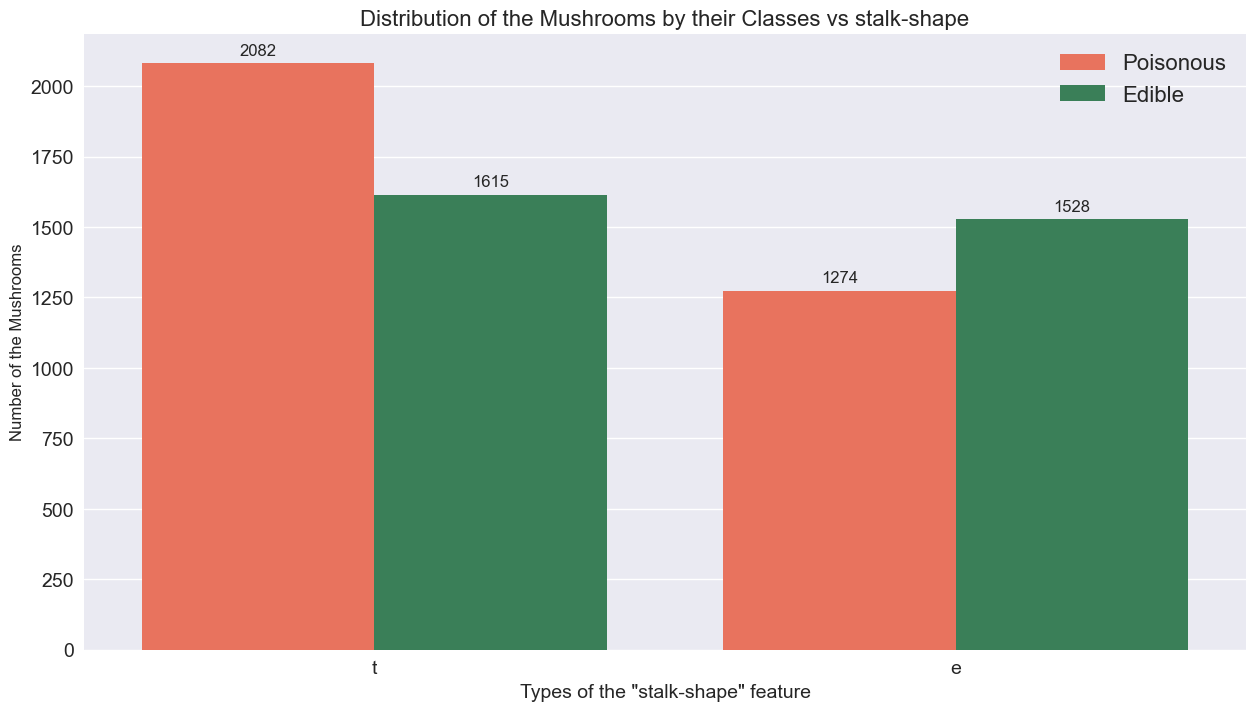

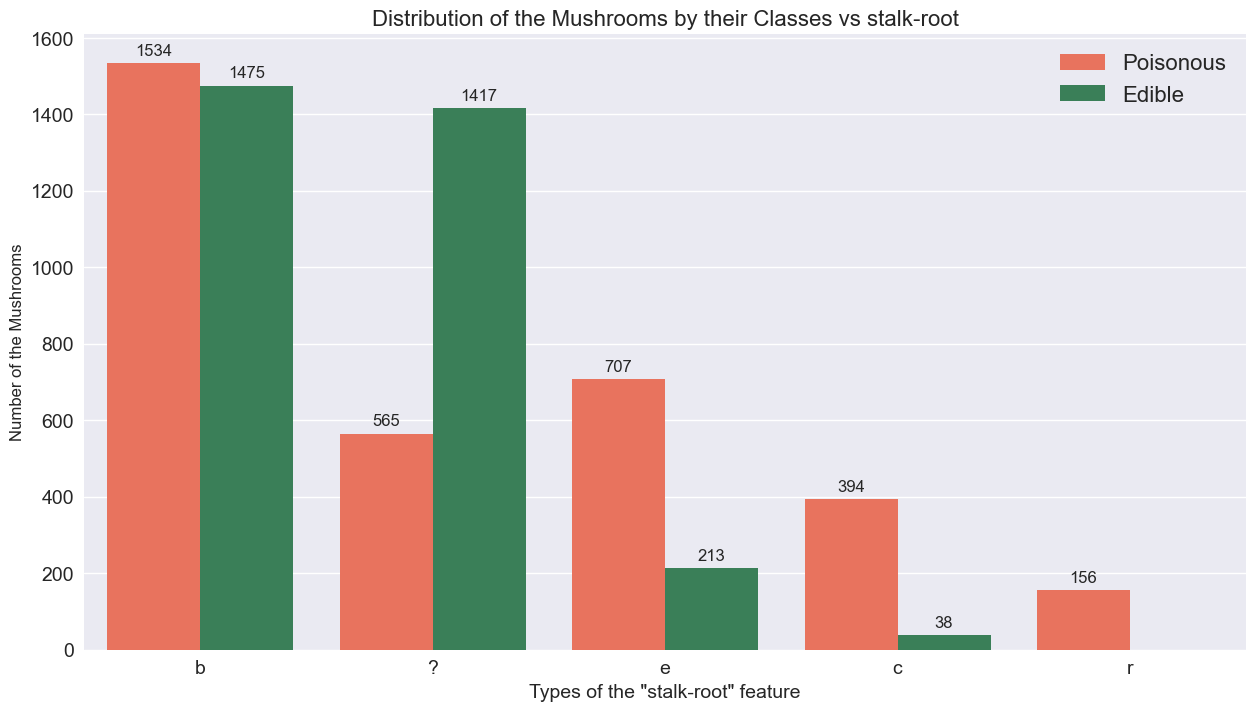

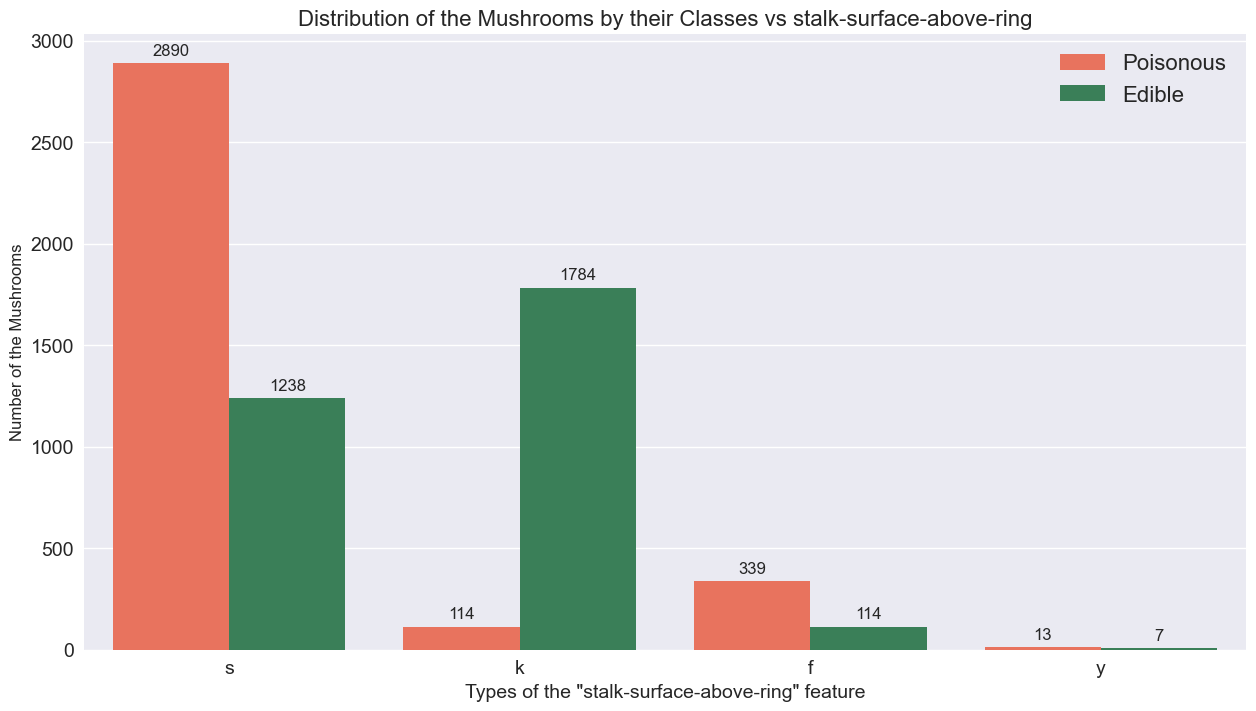

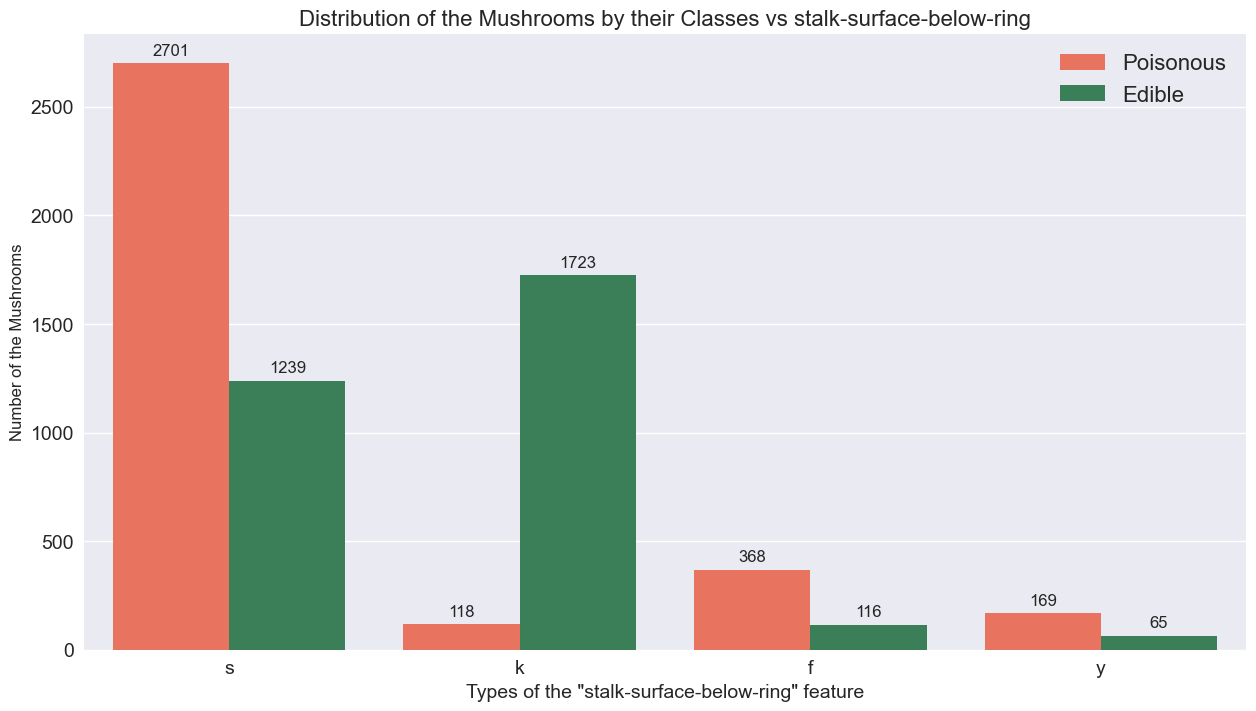

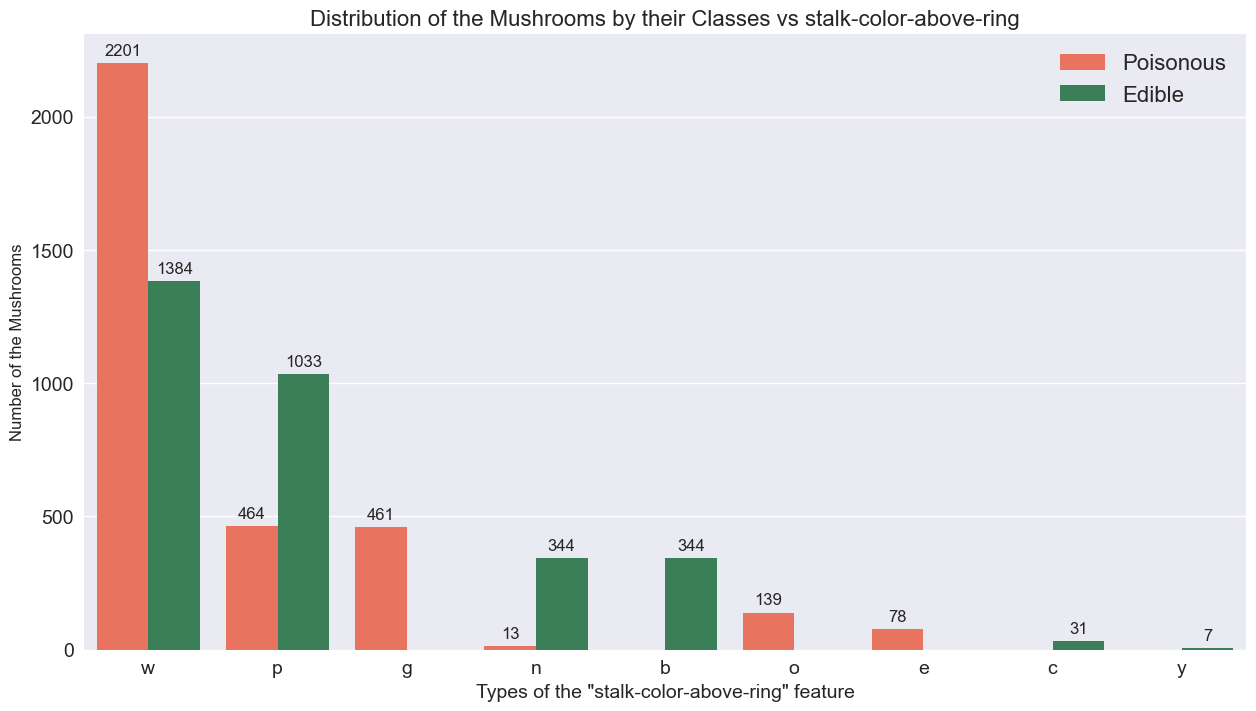

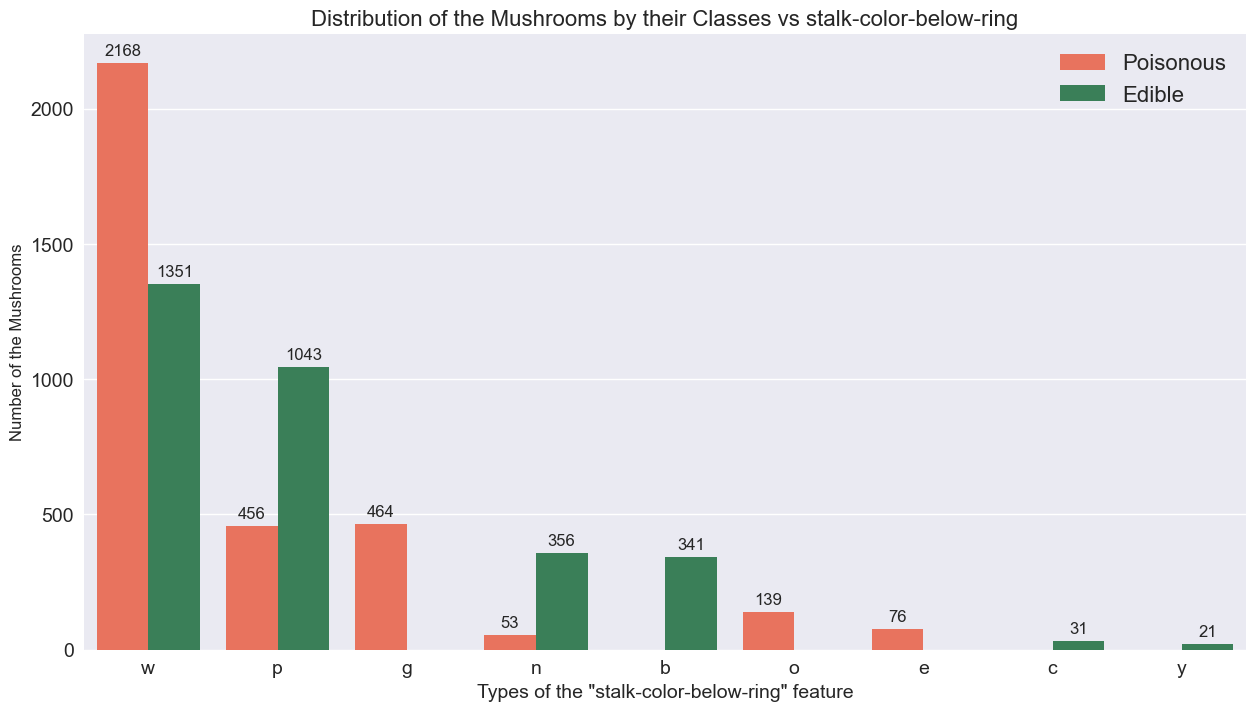

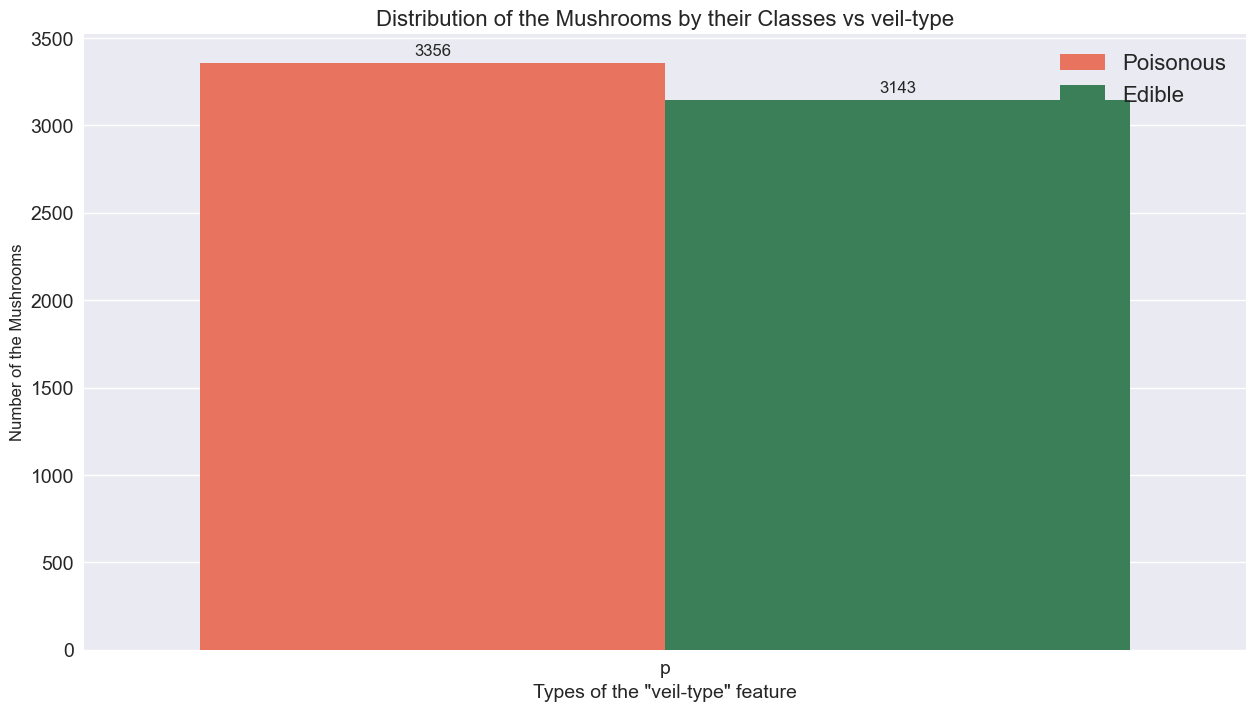

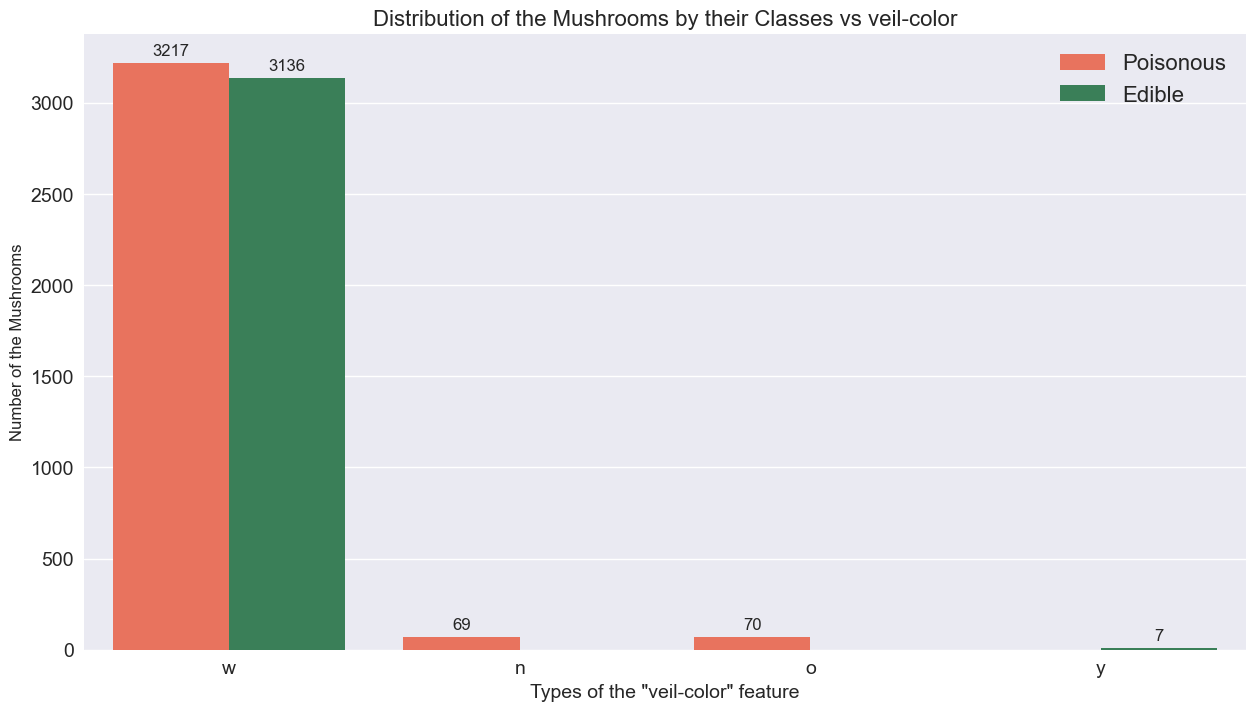

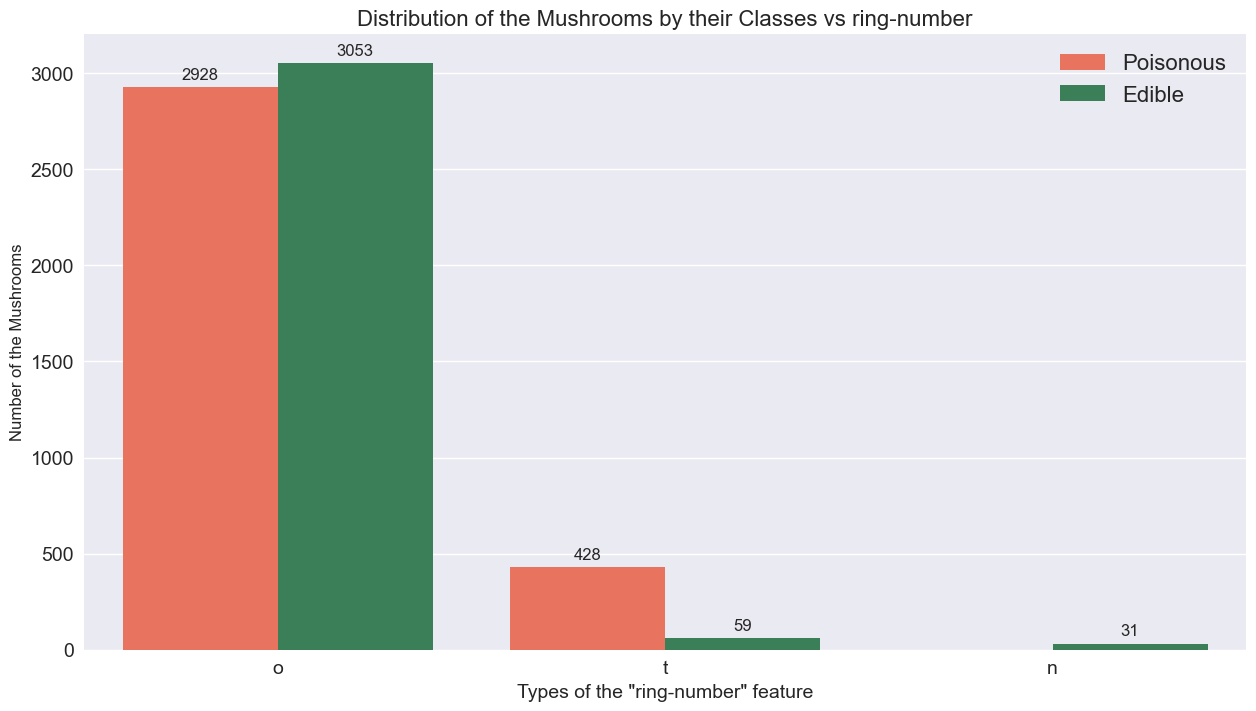

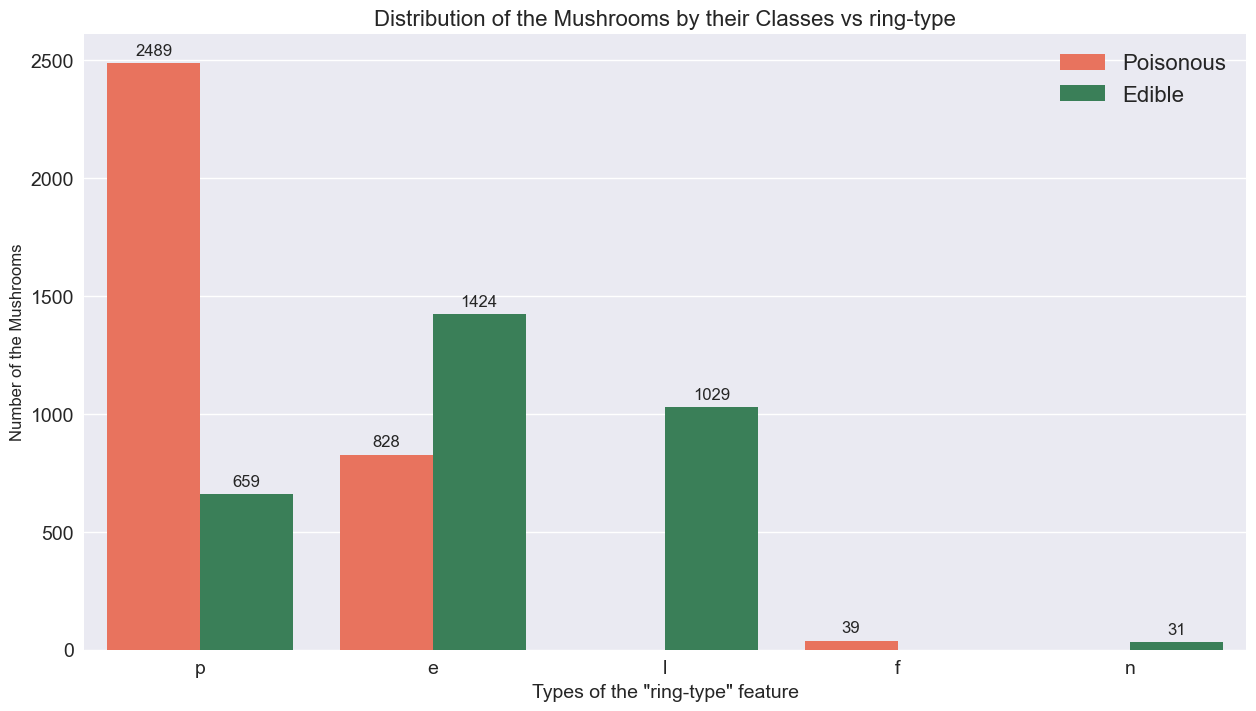

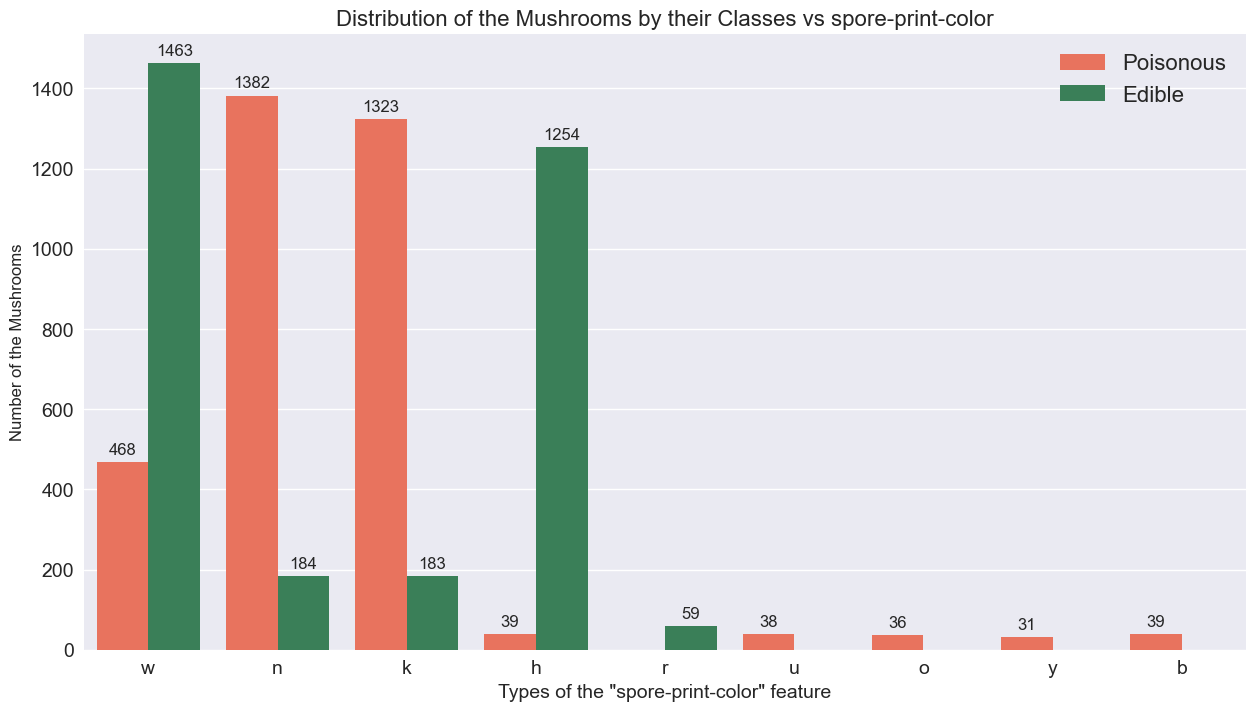

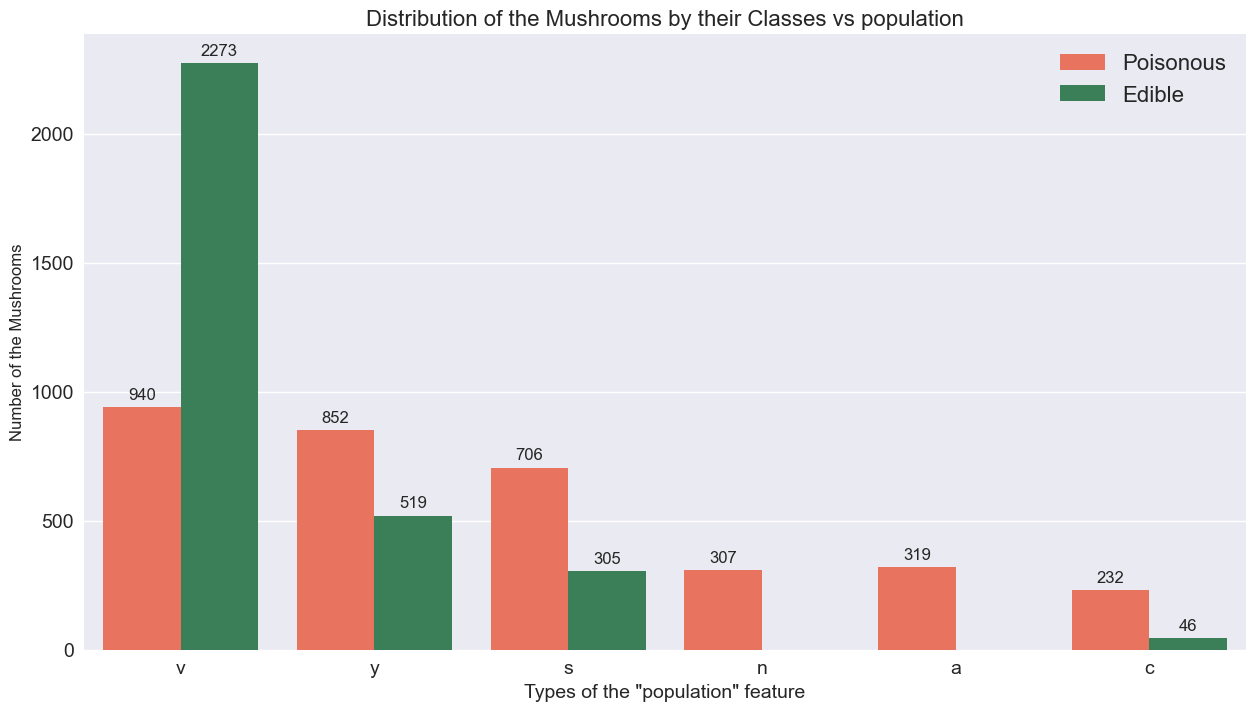

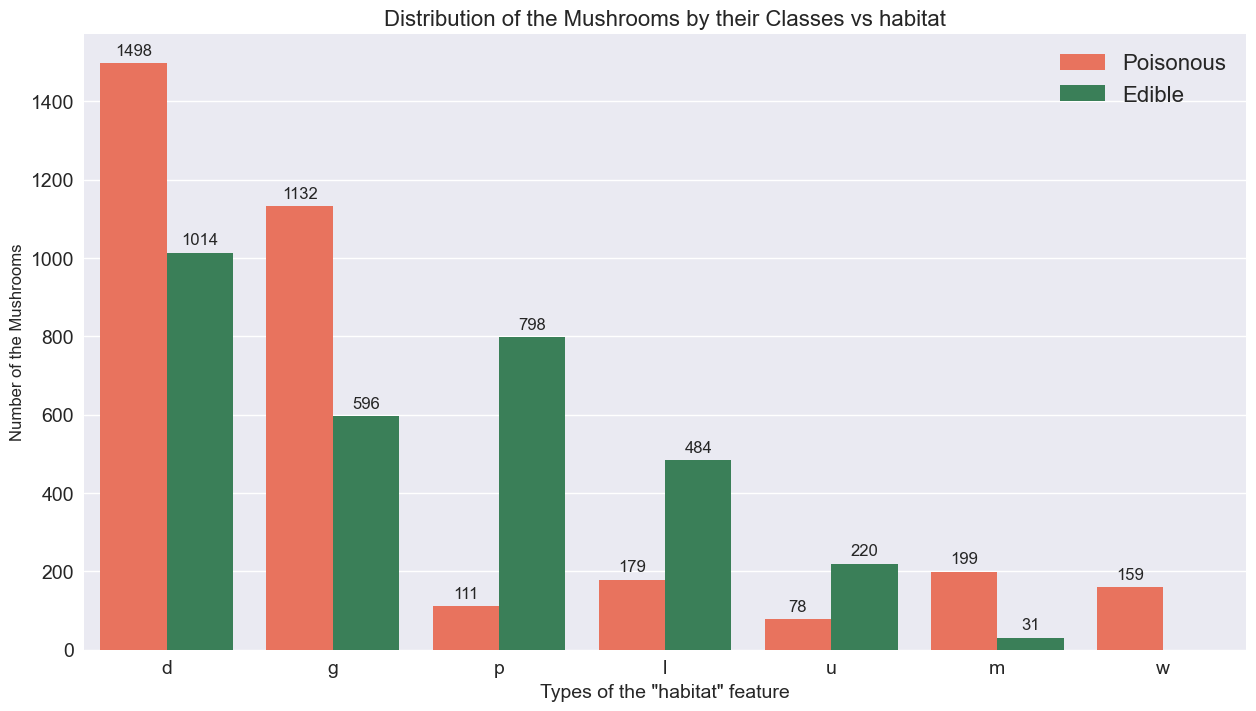

In [8]:
for col in cat_columns:
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = sns.countplot(data=X_train, 
                       x=col,
                       hue='class',
                       order=df[col].value_counts().index,
                       palette=['tomato', 'seagreen'],
                       ax=ax
                      )

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    size=12,
                    textcoords='offset points'
                   )
        
    plt.legend(['Poisonous', 'Edible'], loc='upper right', fontsize=16)
    plt.xlabel(f'Types of the "{col}" feature', fontsize=14)
    plt.ylabel('Number of the Mushrooms', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f'Distribution of the Mushrooms by their Classes vs {col}', fontsize=16)
    pdf.savefig(fig)
    
### close file
pdf.close() 

In [9]:
### Encode target
target_dic = {'e':0, 'p': 1}

y_train_encode = y_train.map(target_dic)
y_test_encode = y_test.map(target_dic)

y_train_encode = y_train.map(target_dic)
y_test_encode = y_test.map(target_dic)

In [10]:
df_result = pd.DataFrame(columns=['encoder' ,'Test acc', 'F1 score'])

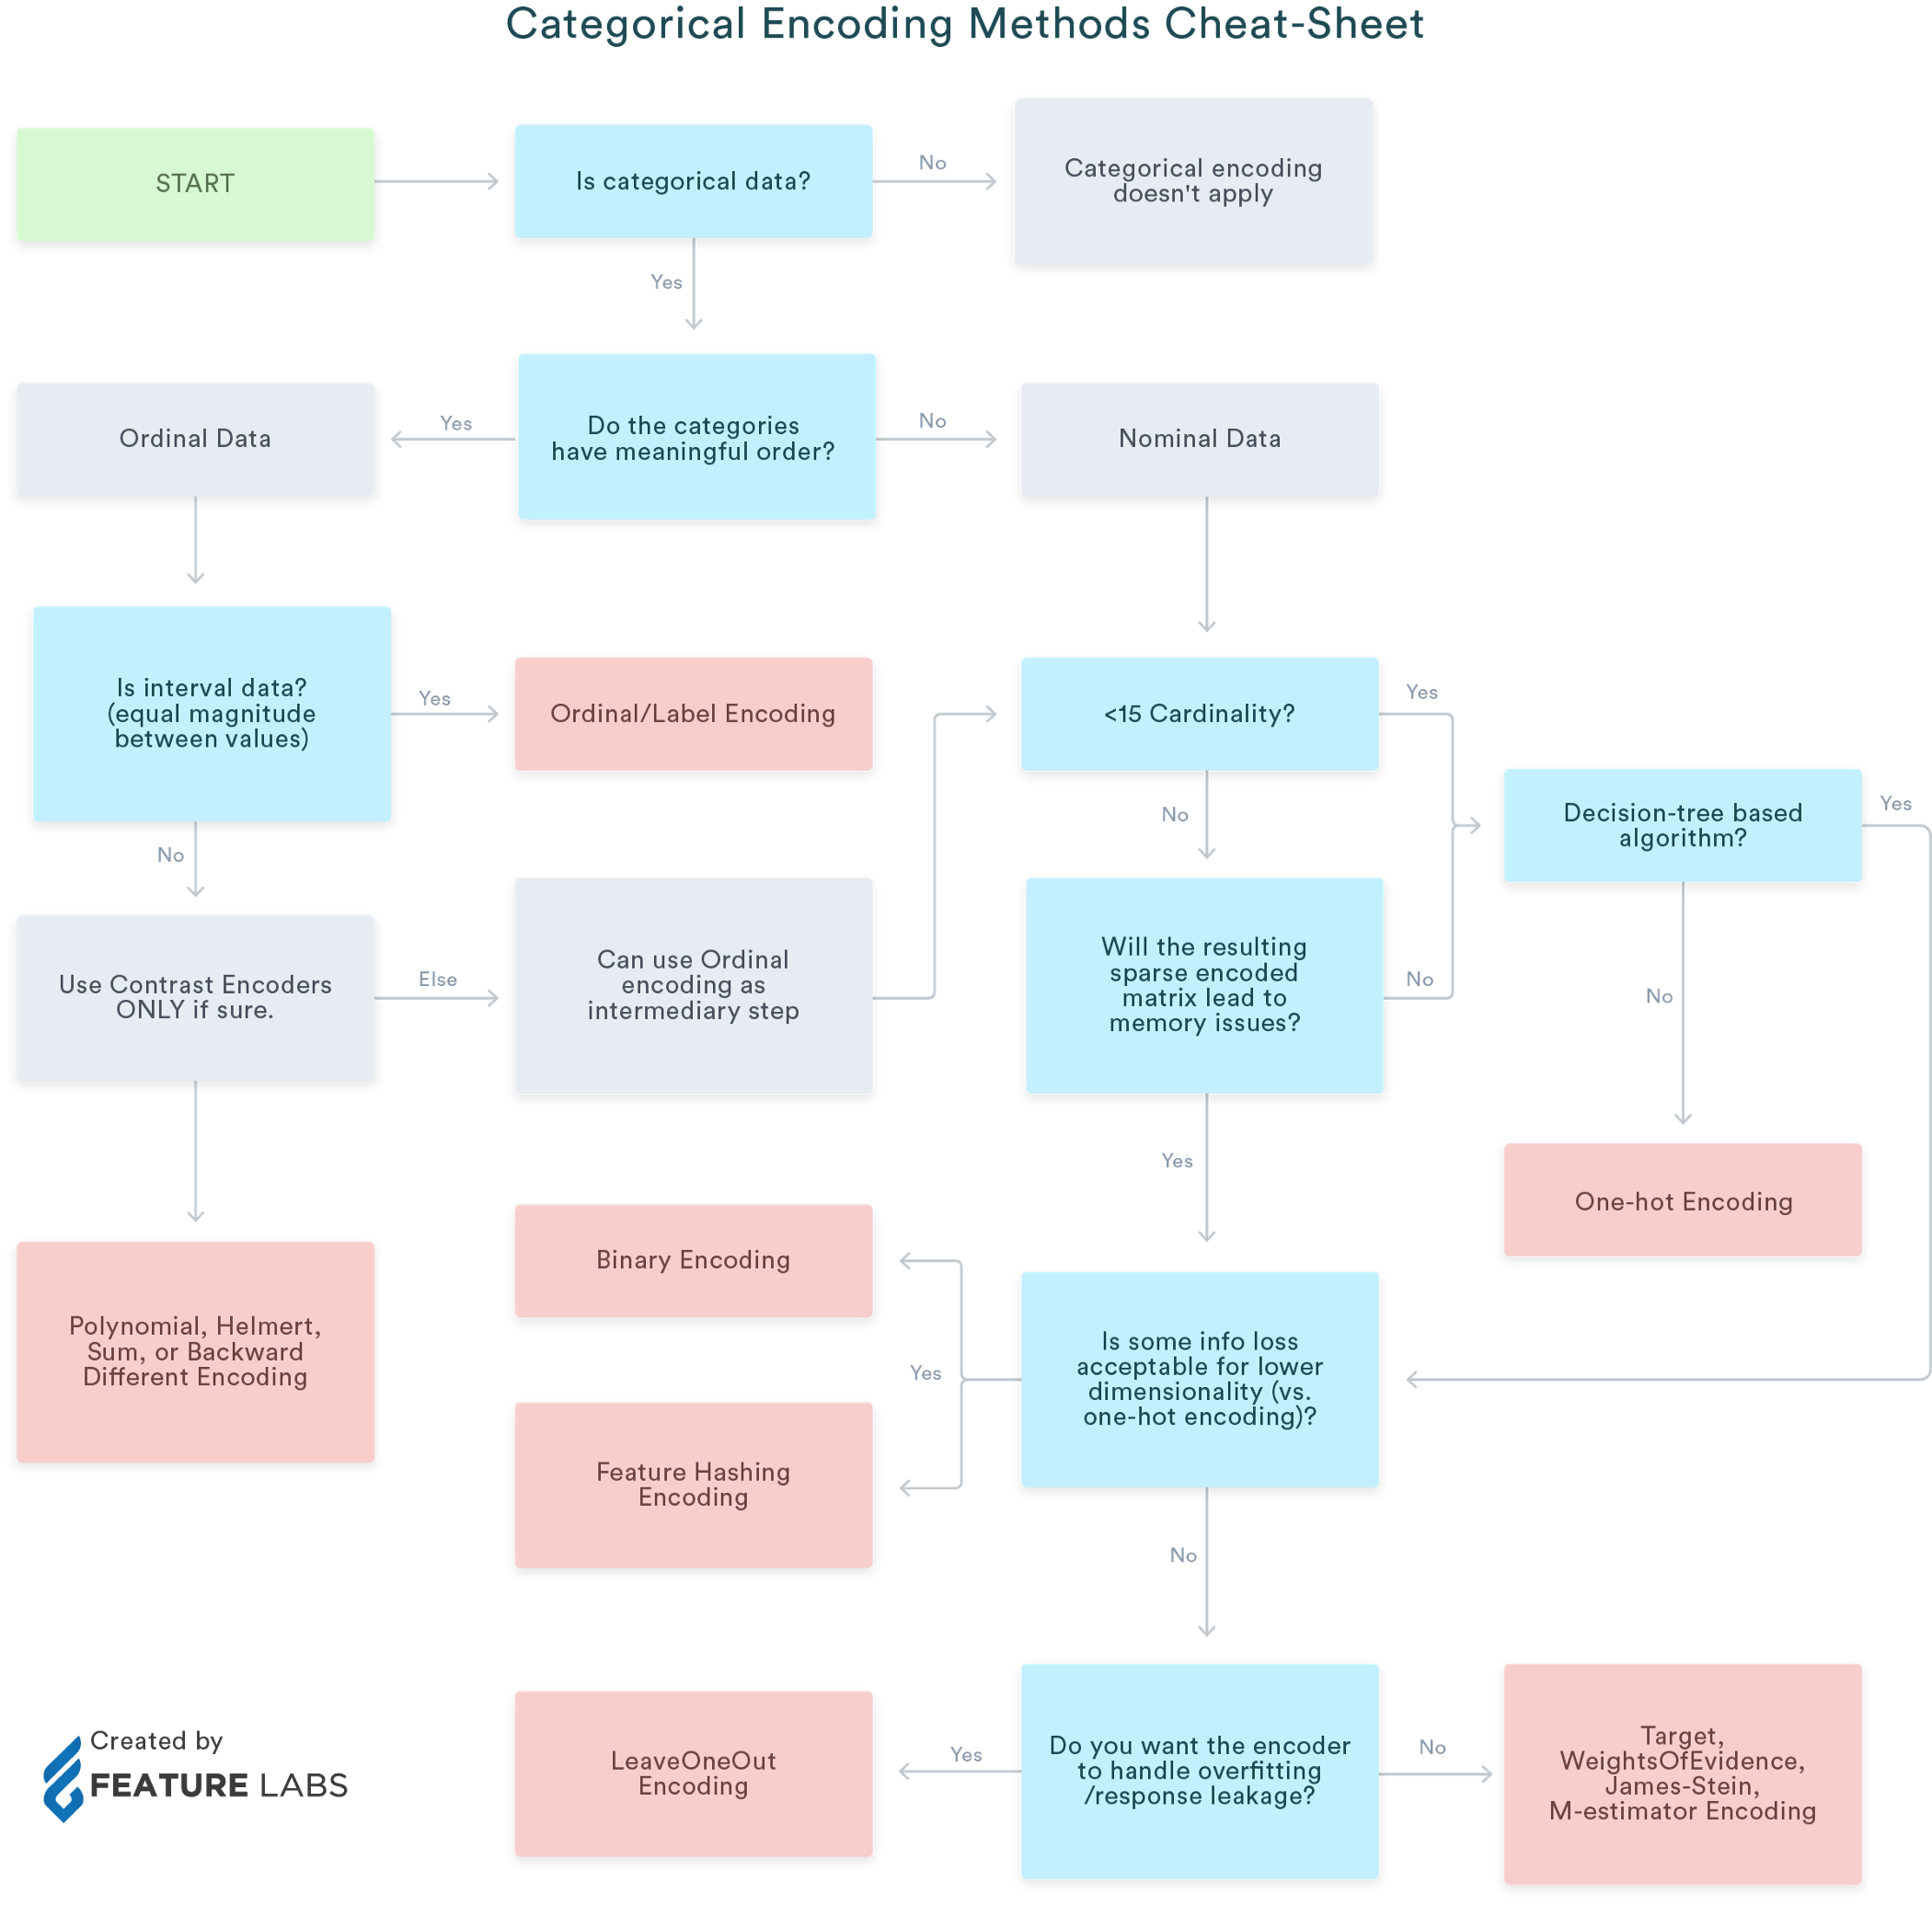

1. One hot Encoding
2. Label Encoding
3. Ordinal Encoding
4. Count and Frequency
5. Probability Ratio Encoding
6. Mean Encoding
7. Weight of evidence
8. Leave One Out encoding

### 1. One hot Encoding

In [11]:
X_train.drop('class', axis=1, inplace=True)

In [12]:
encoder = OneHotEncoder(categories='auto',
                        drop='first', # to return k-1, use drop=false to return k dummies
                        sparse=False,
                        handle_unknown='error') # helps deal with rare labels

encoder.fit(X_train)

OneHotEncoder(drop='first', sparse=False)

In [13]:
X_train_transform = pd.DataFrame(encoder.transform(X_train))
X_test_transform = pd.DataFrame(encoder.transform(X_test))
X_train_transform.columns = encoder.get_feature_names_out()
X_test_transform.columns = encoder.get_feature_names_out()

X_train_transform.shape, X_test_transform.shape

((6499, 95), (1625, 95))

In [14]:
X_train_transform.head(5)

cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0          0.0          0.0          1.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          1.0          0.0          0.0          0.0   
4          0.0          0.0          1.0          0.0          0.0   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0            0.0            1.0            0.0          0.0          0.0  ...   
1            0.0            0.0            0.0          0.0          0.0  ...   
2            0.0            1.0            0.0          0.0          0.0  ...   
3            0.0            1.0            0.0          0.0          0.0  ...   
4            0.0            0.0            1.0          0.0          1.0  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0           0.0           1.0           0.0           0.0        1.0   
1           1.0           0.0           0.0           0.0        1.0   
2           0.0           1.0           0.0           0.0        0.0   
3           0.0           1.0           0.0           0.0        1.0   
4           0.0           0.0           1.0           0.0        0.0   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0  
2        0.0        1.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0  
4        1.0        0.0        0.0        0.0        0.0  

[5 rows x 95 columns]

In [15]:
def gaussian_model(encoder_name, X_train, X_test, y_train, y_test):
    global df_result
    # check shape
    if X_train.shape[1] == X_test.shape[1]:
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_test)
        
        print(f'Gaussian Naive Bayes model accuracy: {accuracy_score(y_test, y_pred)*100:.2f}')
        print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
        print(confusion_matrix(y_test, y_pred))
        
        df_result = df_result.append({
                              'encoder': encoder_name,
                              'Test acc': accuracy_score(y_test, y_pred)*100, 
                              'F1 score': f1_score(y_test, y_pred),
                             },
                               ignore_index=True
                            )
    else:
        print('The shape of train and test data set is not similar')


In [16]:
gaussian_model('One hot', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 94.83
F1 score: 0.95
[[768  84]
 [  0 773]]


### 2. Label Encoding

In [17]:
d = defaultdict(LabelEncoder)

In [18]:
# Encoding the variable
X_train_label_encode = X_train.apply(lambda x: d[x.name].fit_transform(x))

# # Using the dictionary to encode future data
X_test_label_encode = X_test.apply(lambda x: d[x.name].transform(x))

In [19]:
X_train_label_encode.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  6499.000000  6499.000000  6499.000000  6499.000000  6499.000000   
mean      3.341899     1.822896     4.466841     0.414679     4.157717   
std       1.601991     1.233020     2.527400     0.492704     2.090789   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     3.000000     0.000000     2.000000   
50%       3.000000     2.000000     4.000000     0.000000     5.000000   
75%       5.000000     3.000000     8.000000     1.000000     5.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      6499.000000   6499.000000  6499.000000  6499.000000  6499.000000   
mean          0.976150      0.163256     0.312048     4.816895     0.568857   
std           0.152593      0.369627     0.463365     3.547595     0.495274   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           1.000000      0.000000     0.000000     2.000000     0.000000   
50%           1.000000      0.000000     0.000000     5.000000     1.000000   
75%           1.000000      0.000000     1.000000     7.000000     1.000000   
max           1.000000      1.000000     1.000000    11.000000     1.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               6499.000000             6499.000000   
mean   ...                  1.603785                5.820280   
std    ...                  0.678422                1.902764   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             6499.000000     6499.0  6499.000000  6499.000000   
mean                 5.801046        0.0     1.969072     1.070165   
std                  1.904287        0.0     0.231015     0.273483   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  6499.000000        6499.000000  6499.000000  6499.000000  
mean      2.274504           3.605939     3.636252     1.511617  
std       1.805411           2.383894     1.262433     1.724209  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 22 columns]

In [20]:
gaussian_model('Label Encoding', X_train_label_encode, X_test_label_encode, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 91.57
F1 score: 0.91
[[773  79]
 [ 58 715]]


### 3. Ordinal Encoding

In [21]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.NaN)

In [22]:
X_train_transform = ord_enc.fit_transform(X_train)
X_train_transform = pd.DataFrame(X_train_transform)
X_test_transform = pd.DataFrame.from_records(ord_enc.transform(X_test))

In [23]:
X_train_transform.columns = X_train.columns
X_test_transform.columns = X_test.columns

In [24]:
X_train_transform.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  6499.000000  6499.000000  6499.000000  6499.000000  6499.000000   
mean      3.341899     1.822896     4.466841     0.414679     4.157717   
std       1.601991     1.233020     2.527400     0.492704     2.090789   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     3.000000     0.000000     2.000000   
50%       3.000000     2.000000     4.000000     0.000000     5.000000   
75%       5.000000     3.000000     8.000000     1.000000     5.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      6499.000000   6499.000000  6499.000000  6499.000000  6499.000000   
mean          0.976150      0.163256     0.312048     4.816895     0.568857   
std           0.152593      0.369627     0.463365     3.547595     0.495274   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           1.000000      0.000000     0.000000     2.000000     0.000000   
50%           1.000000      0.000000     0.000000     5.000000     1.000000   
75%           1.000000      0.000000     1.000000     7.000000     1.000000   
max           1.000000      1.000000     1.000000    11.000000     1.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               6499.000000             6499.000000   
mean   ...                  1.603785                5.820280   
std    ...                  0.678422                1.902764   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             6499.000000     6499.0  6499.000000  6499.000000   
mean                 5.801046        0.0     1.969072     1.070165   
std                  1.904287        0.0     0.231015     0.273483   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  6499.000000        6499.000000  6499.000000  6499.000000  
mean      2.274504           3.605939     3.636252     1.511617  
std       1.805411           2.383894     1.262433     1.724209  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 22 columns]

In [25]:
gaussian_model('Ordinal Encoding', X_train_label_encode, X_test_label_encode, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 91.57
F1 score: 0.91
[[773  79]
 [ 58 715]]


### 4. Count and Frequency

In [26]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

In [27]:
for col in X_train_transform.columns:
    frequency_map = (X_train_transform[col].value_counts() / len(X_train_transform) ).to_dict()
    X_train_transform[col] = X_train_transform[col].map(frequency_map)
    X_test_transform[col] = X_test_transform[col].map(frequency_map)

In [28]:
X_train_transform.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  6499.000000  6499.000000  6499.000000  6499.000000  6499.000000   
mean      0.366677     0.339786     0.199887     0.514559     0.277285   
std       0.127387     0.049980     0.071224     0.084076     0.161097   
min       0.000462     0.000615     0.001846     0.414679     0.004770   
25%       0.390983     0.287890     0.127558     0.414679     0.071242   
50%       0.390983     0.312202     0.229574     0.585321     0.266195   
75%       0.447607     0.399292     0.281274     0.585321     0.436221   
max       0.447607     0.399292     0.281274     0.585321     0.436221   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      6499.000000   6499.000000  6499.000000  6499.000000  6499.000000   
mean          0.953438      0.726793     0.570652     0.141245     0.509483   
std           0.145314      0.248940     0.174181     0.057760     0.068206   
min           0.023850      0.163256     0.312048     0.003077     0.431143   
25%           0.976150      0.836744     0.312048     0.091399     0.431143   
50%           0.976150      0.836744     0.687952     0.150331     0.568857   
75%           0.976150      0.836744     0.687952     0.183413     0.568857   
max           0.976150      0.836744     0.687952     0.213879     0.568857   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               6499.000000             6499.000000   
mean   ...                  0.454623                0.368822   
std    ...                  0.198325                0.211503   
min    ...                  0.036006                0.001077   
25%    ...                  0.283274                0.230343   
50%    ...                  0.606247                0.551623   
75%    ...                  0.606247                0.551623   
max    ...                  0.606247                0.551623   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             6499.000000     6499.0  6499.000000  6499.000000   
mean                 0.358826        1.0     0.955805     0.852582   
std                  0.207466        0.0     0.143356     0.230156   
min                  0.003231        1.0     0.001077     0.004770   
25%                  0.230651        1.0     0.977535     0.920295   
50%                  0.541468        1.0     0.977535     0.920295   
75%                  0.541468        1.0     0.977535     0.920295   
max                  0.541468        1.0     0.977535     0.920295   

         ring-type  spore-print-color   population      habitat  
count  6499.000000        6499.000000  6499.000000  6499.000000  
mean      0.379826           0.239830     0.319588     0.254018  
std       0.122308           0.054981     0.179327     0.126386  
min       0.004770           0.004770     0.042776     0.024465  
25%       0.346515           0.231728     0.155562     0.139868  
50%       0.346515           0.240960     0.210956     0.265887  
75%       0.484382           0.297123     0.494384     0.386521  
max       0.484382           0.297123     0.494384     0.386521  

[8 rows x 22 columns]

In [29]:
gaussian_model('Count and Frequency', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 94.65
F1 score: 0.94
[[825  27]
 [ 60 713]]


# Target guided encodings

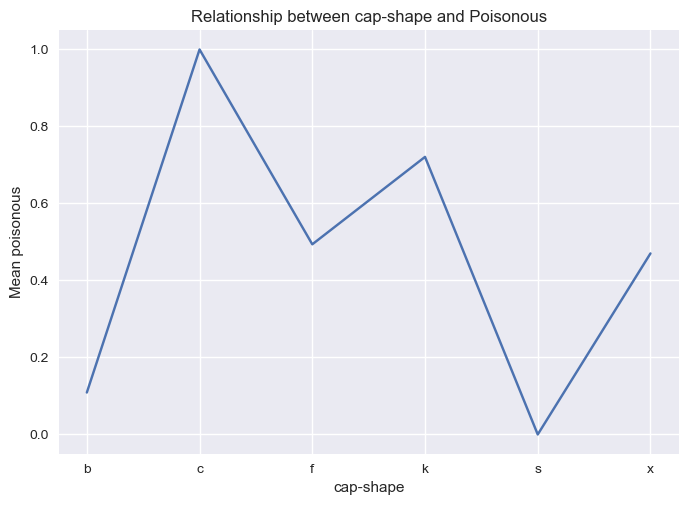

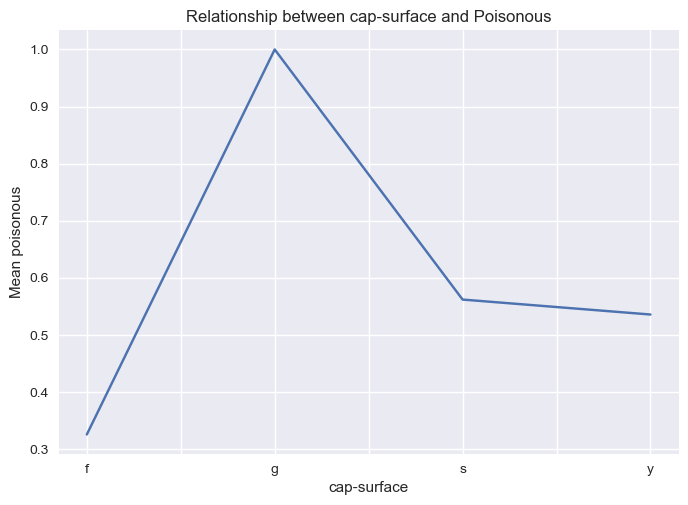

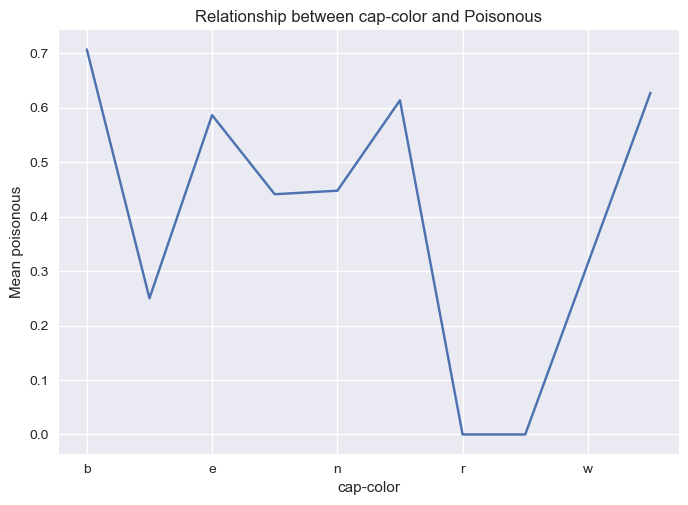

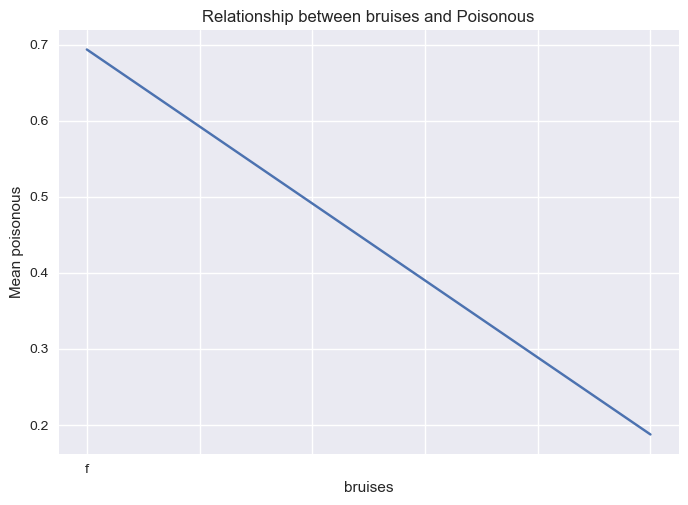

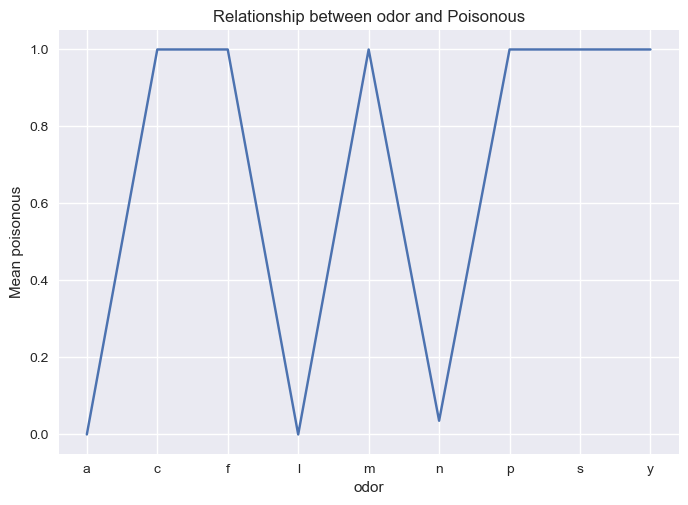

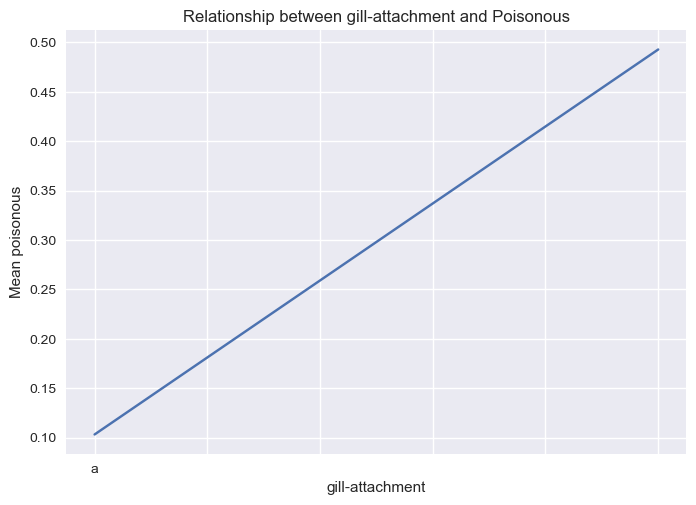

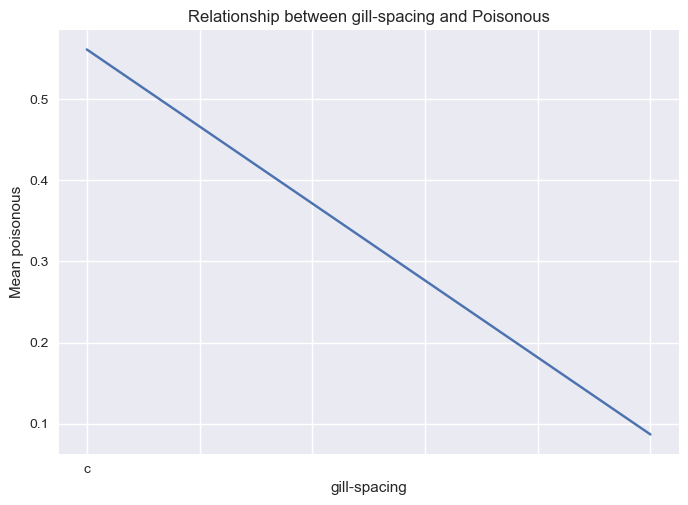

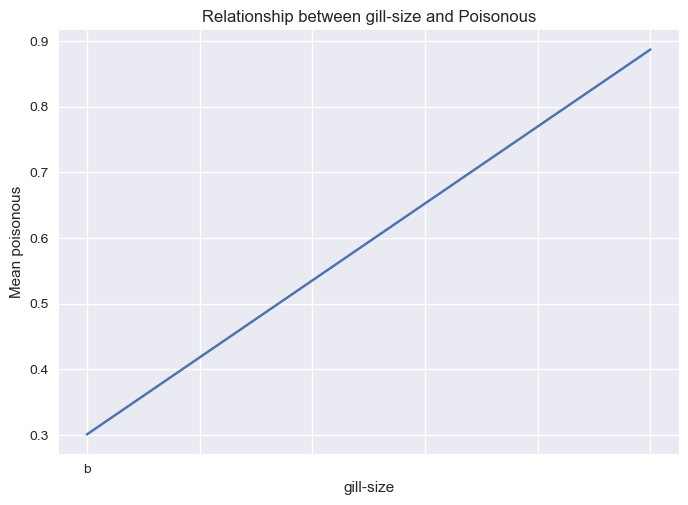

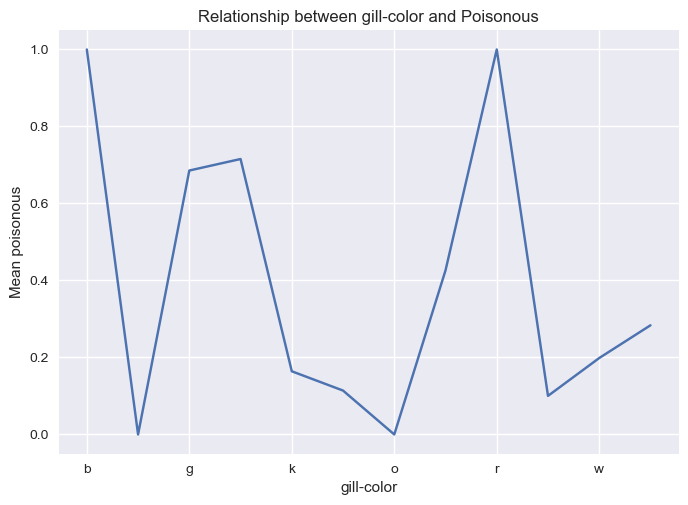

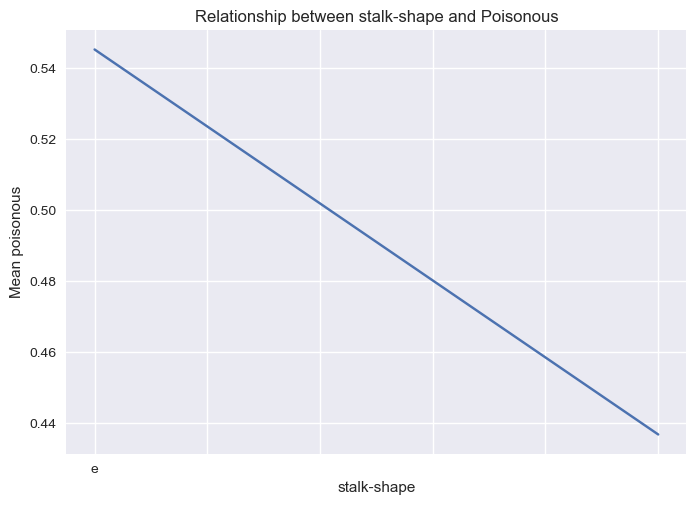

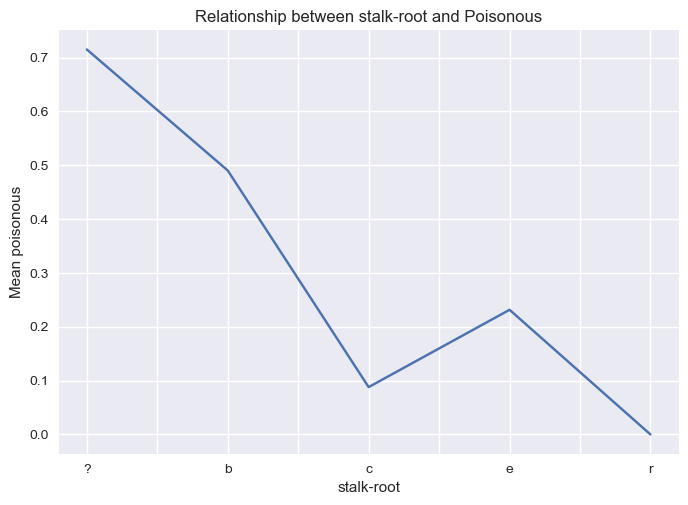

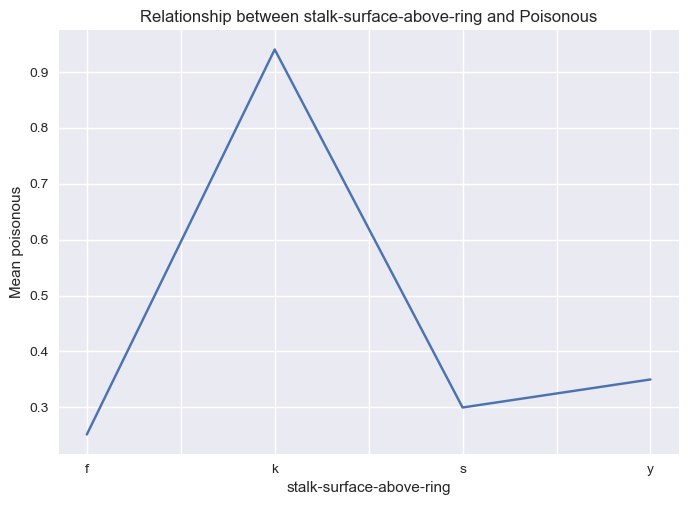

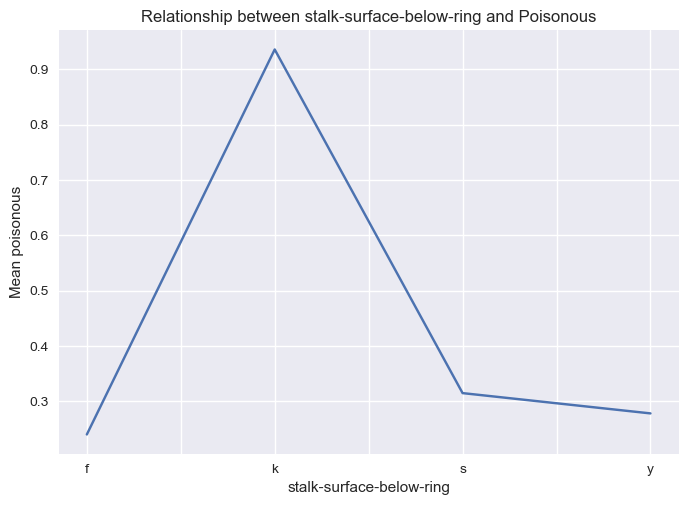

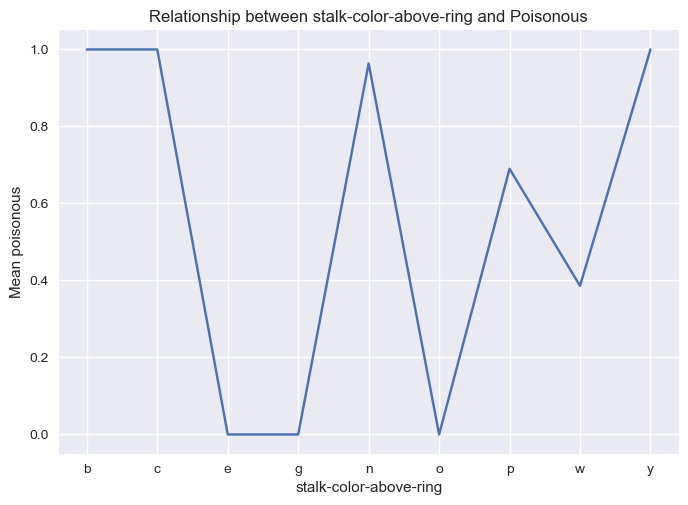

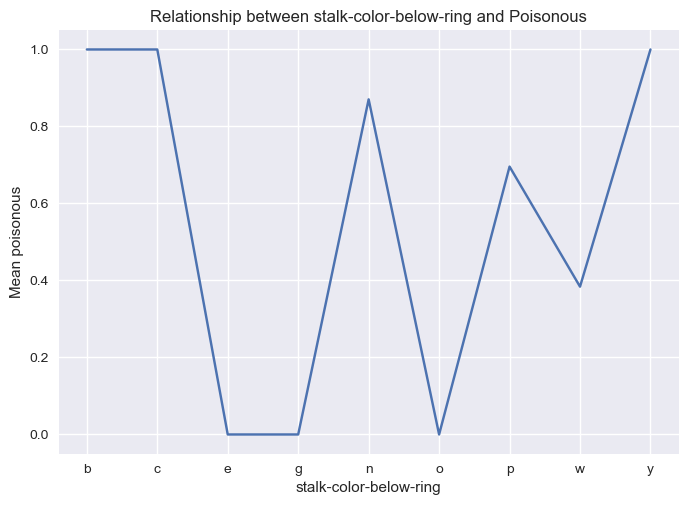

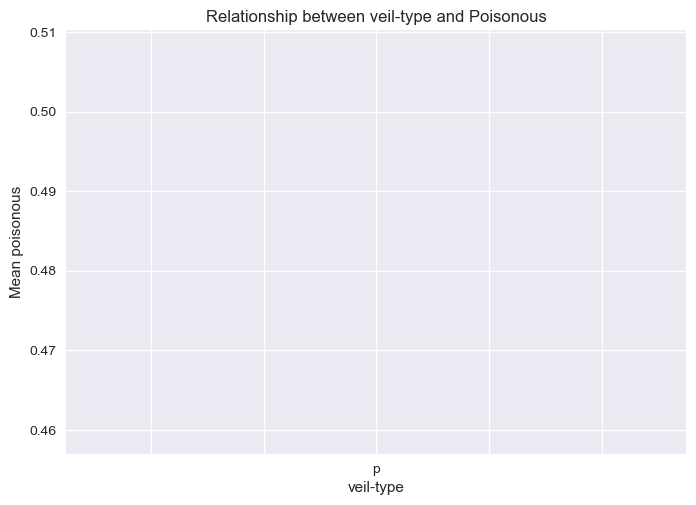

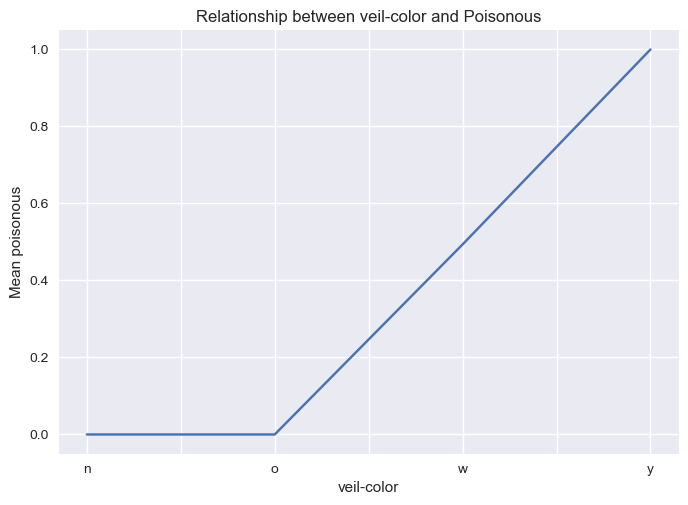

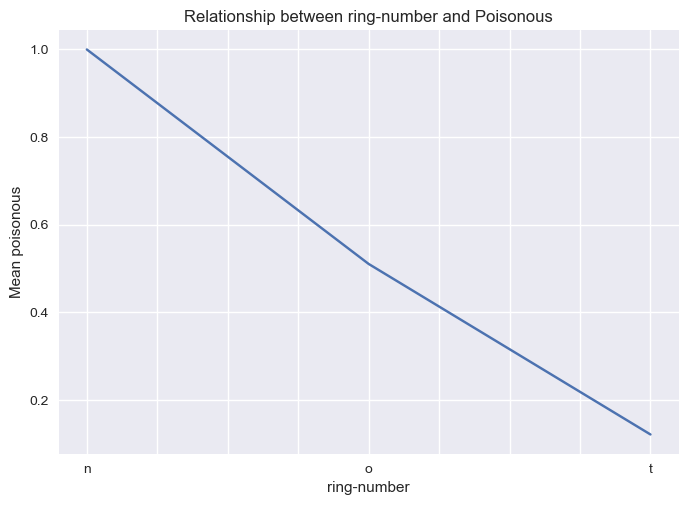

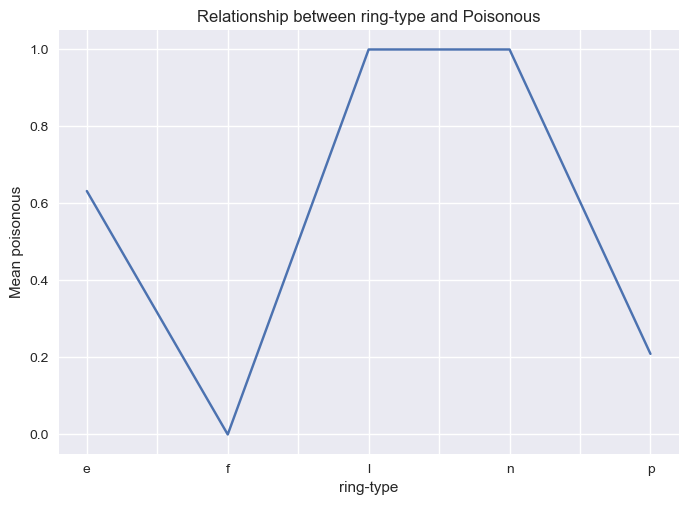

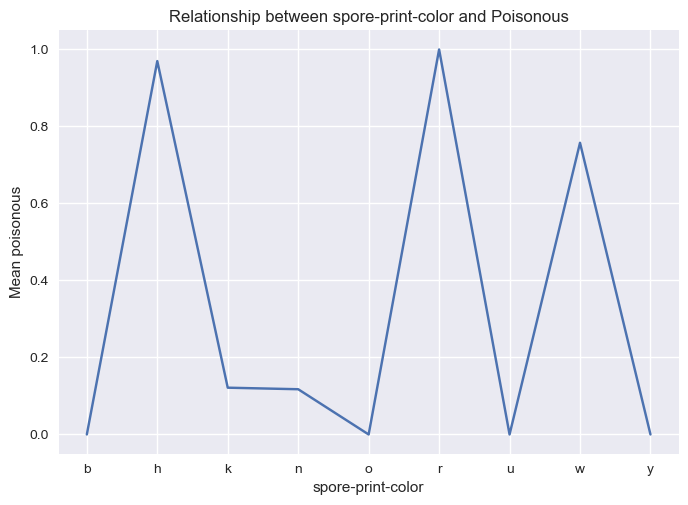

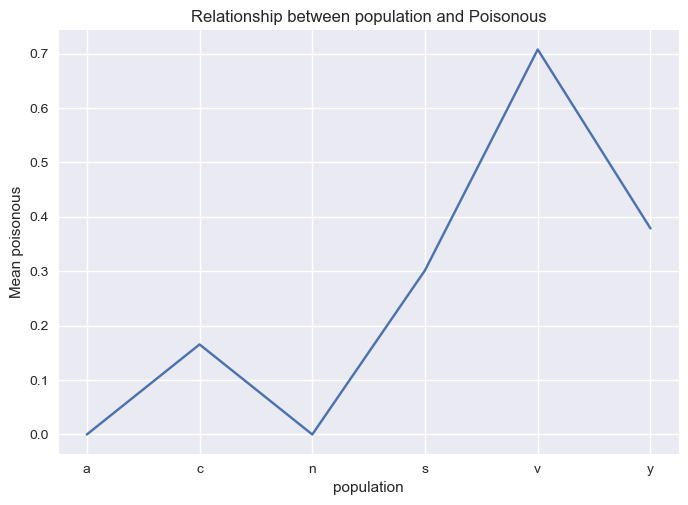

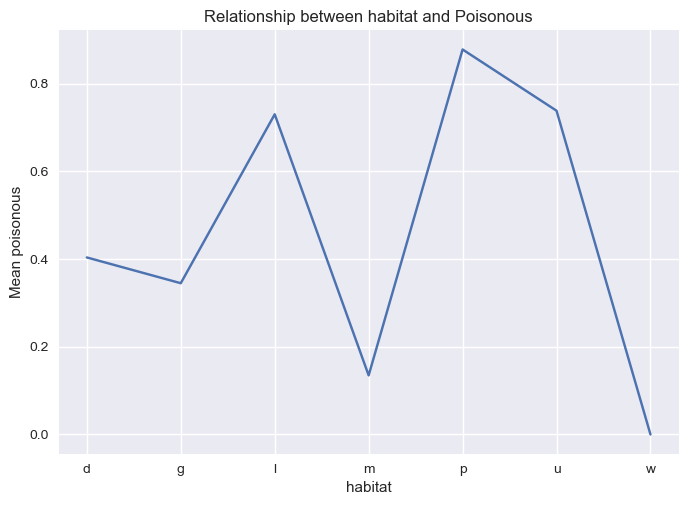

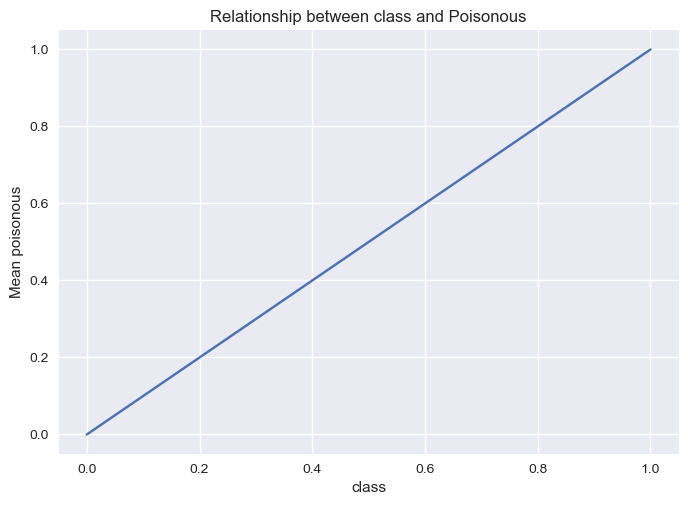

In [30]:
X_train['class'] = y_train_encode
for col in X_train.columns:  
    fig = plt.figure()
    fig = X_train.groupby([col])['class'].mean().plot()
    fig.set_title(f'Relationship between {col} and Poisonous')
    fig.set_ylabel('Mean poisonous')
    plt.show()

### 5. Probability Ratio Encoding
These encoding is suitable for classification problems only, where the target is binary.

For each category, we calculate the mean of target=1, that is the probability of the target being 1 ( P(1) ), and the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the categories by that ratio.

In [31]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

In [32]:
def find_category_mappings(df, variable, target):
    tmp = pd.DataFrame(df.groupby([variable])[target].mean())  
    tmp['non-target'] = 1 - tmp[target]  
    tmp['ratio'] = tmp[target] / tmp['non-target']
    return tmp['ratio'].to_dict()

def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [33]:
for col in X_train_transform.columns.to_list()[:-1]:    
    mappings = find_category_mappings(X_train_transform, col, 'class')  
    integer_encode(X_train_transform, X_test_transform, col, mappings)

In [34]:
X_train_transform.replace(np.inf, 1, inplace=True)
X_train_transform.drop('class', axis=1, inplace=True)
X_test_transform.replace(np.inf, 1, inplace=True)

In [35]:
X_train_transform.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  6499.000000  6499.000000  6499.000000  6499.000000  6499.000000   
mean      1.049698     1.000485     1.026952     1.419873     0.484187   
std       0.552834     0.333758     0.449602     1.001098     0.484011   
min       0.000000     0.482567     0.000000     0.230594     0.000000   
25%       0.887735     0.482567     0.788969     0.230594     0.036942   
50%       0.887735     1.153527     0.809901     2.262436     0.036942   
75%       0.975894     1.282340     1.416667     2.262436     1.000000   
max       2.583784     1.282340     2.410256     2.262436     1.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      6499.000000   6499.000000  6499.000000  6499.000000  6499.000000   
mean          0.951586      1.085004     2.747102     0.852714     0.958361   
std           0.130759      0.437354     3.440990     0.781344     0.209836   
min           0.115108      0.094943     0.429805     0.000000     0.775696   
25%           0.972024      1.278173     0.429805     0.196364     0.775696   
50%           0.972024      1.278173     0.429805     0.742690     0.775696   
75%           0.972024      1.278173     7.855895     1.000000     1.199372   
max           0.972024      1.278173     7.855895     2.514793     1.199372   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               6499.000000             6499.000000   
mean   ...                  4.451706                2.372026   
std    ...                  6.381665                5.853298   
min    ...                  0.315217                0.000000   
25%    ...                  0.458719                0.628805   
50%    ...                  0.458719                0.628805   
75%    ...                 14.601695                2.226293   
max    ...                 14.601695               26.461538   

       stalk-color-below-ring     veil-type   veil-color  ring-number  \
count             6499.000000  6.499000e+03  6499.000000  6499.000000   
mean                 1.348171  9.365316e-01     0.953999     0.974684   
std                  1.581022  9.970570e-14     0.141048     0.238210   
min                  0.000000  9.365316e-01     0.000000     0.137850   
25%                  0.623155  9.365316e-01     0.974821     1.042691   
50%                  0.623155  9.365316e-01     0.974821     1.042691   
75%                  2.287281  9.365316e-01     0.974821     1.042691   
max                  6.716981  9.365316e-01     1.000000     1.042691   

         ring-type  spore-print-color   population      habitat  
count  6499.000000        6499.000000  6499.000000  6499.000000  
mean      0.887288           7.399165     1.399653     1.817846  
std       0.659351          12.405225     1.020223     2.299462  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.264765           0.133140     0.432011     0.526502  
50%       1.000000           1.000000     0.609155     0.676903  
75%       1.719807           3.126068     2.418085     2.703911  
max       1.719807          32.153846     2.418085     7.189189  

[8 rows x 22 columns]

In [36]:
gaussian_model('Probability Ratio Encoding', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 98.40
F1 score: 0.98
[[840  12]
 [ 14 759]]


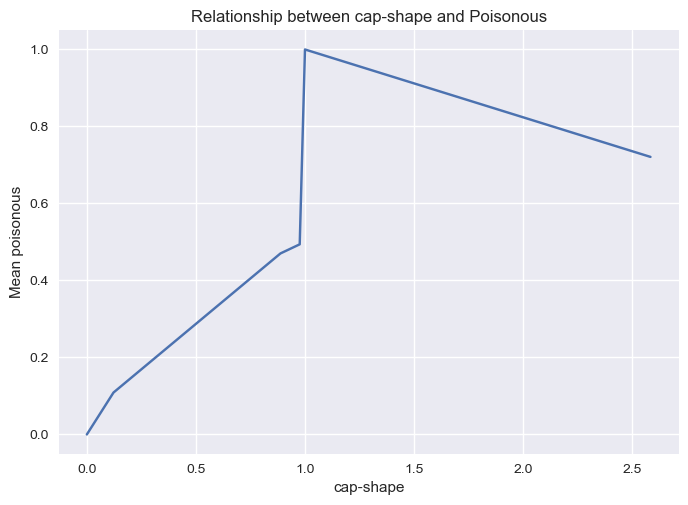

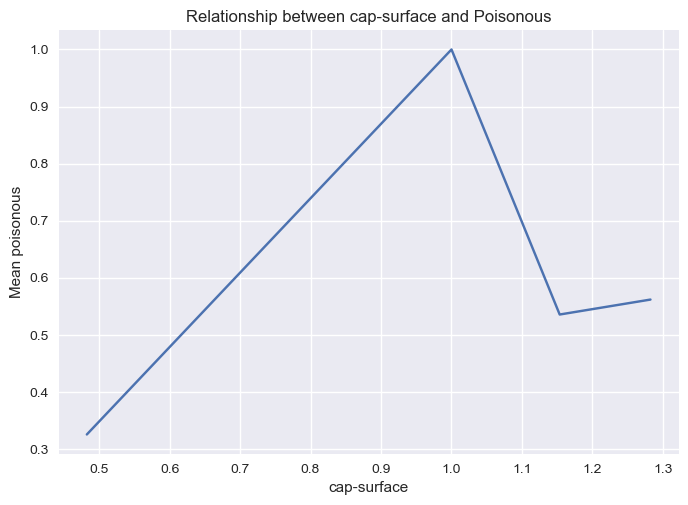

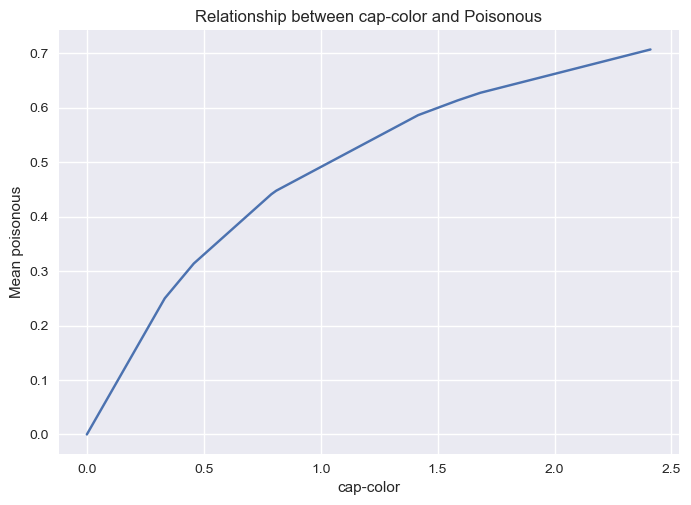

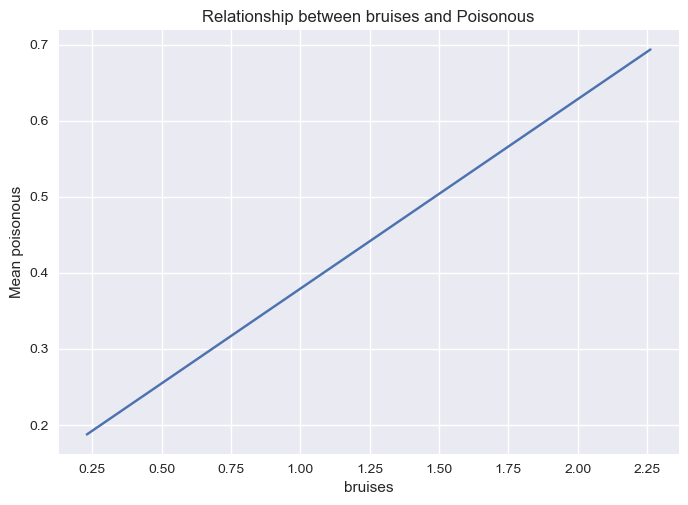

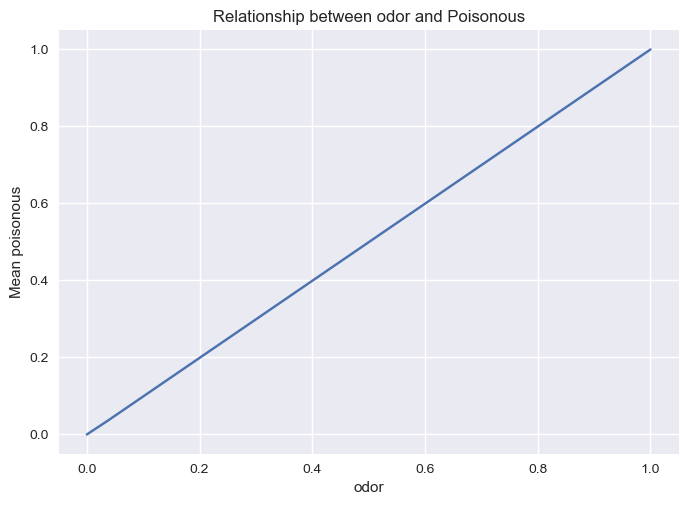

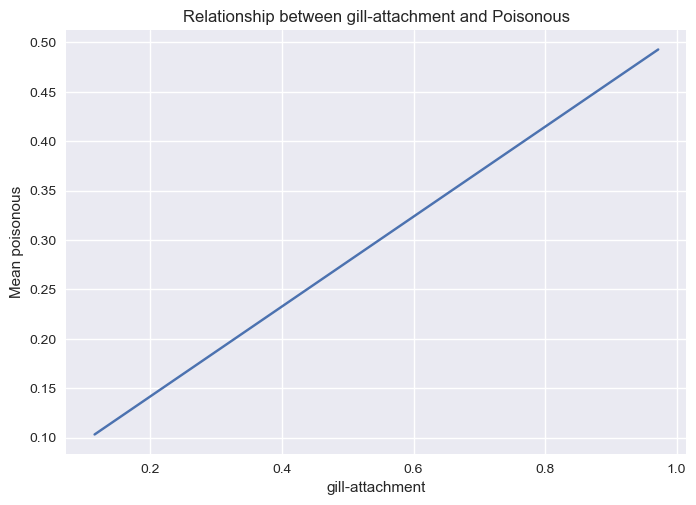

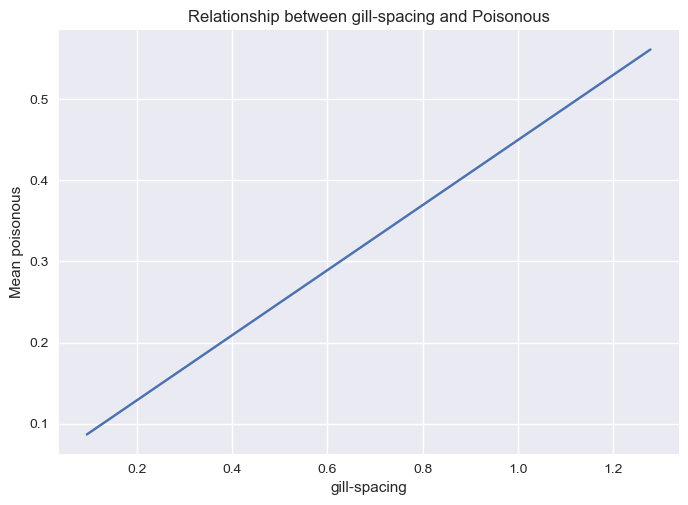

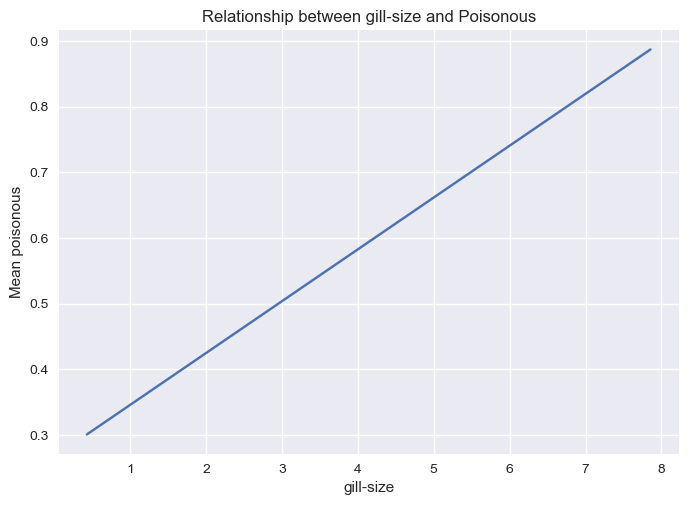

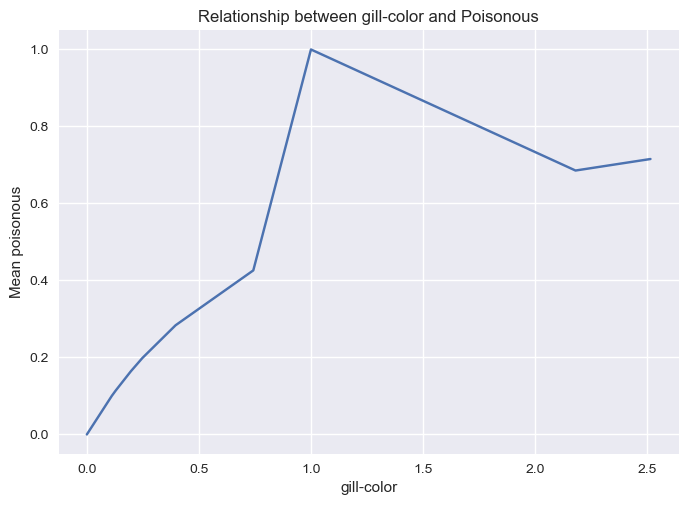

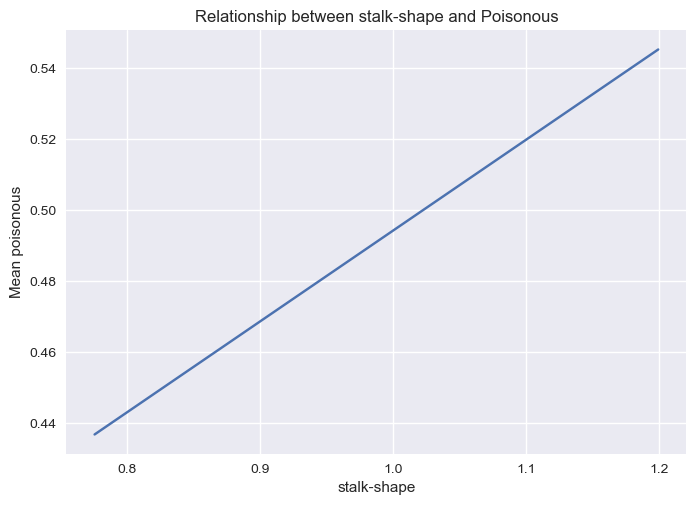

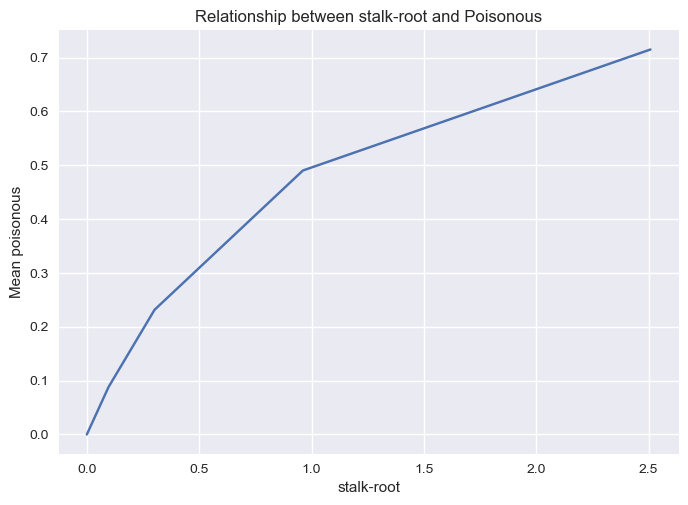

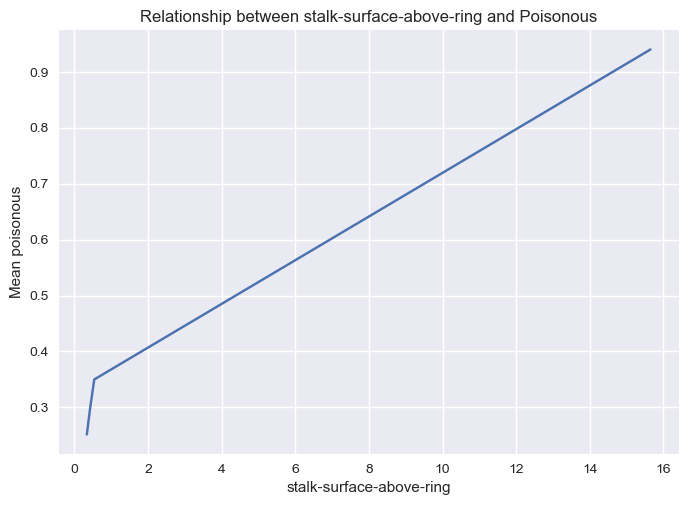

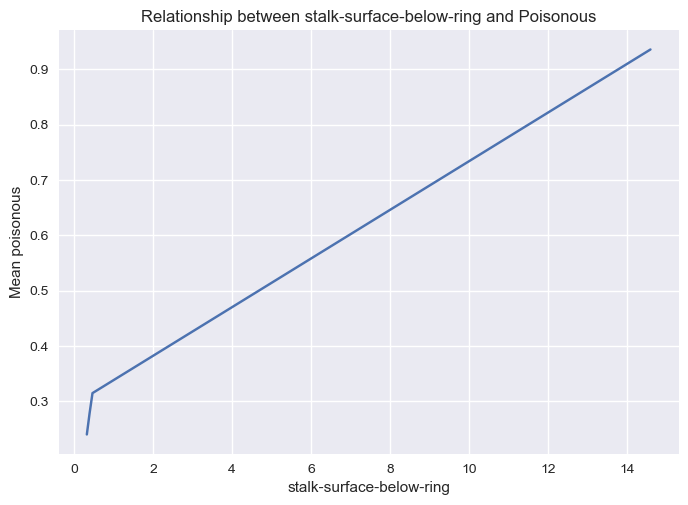

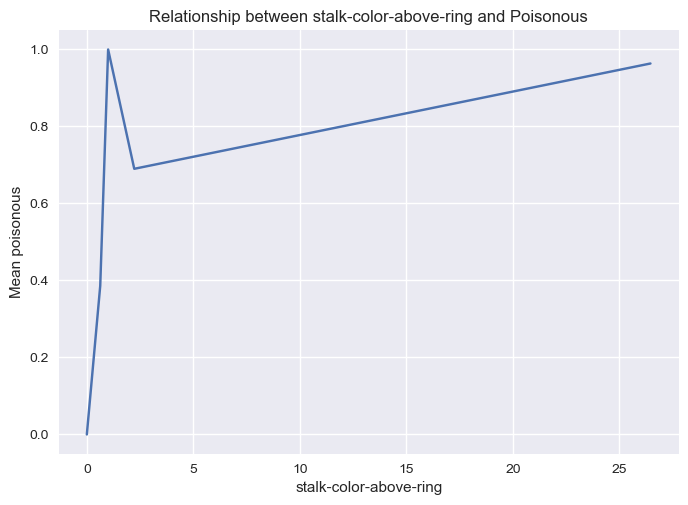

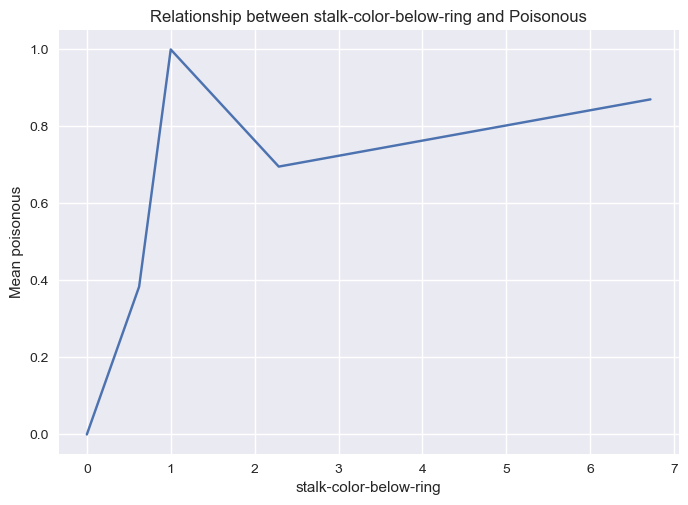

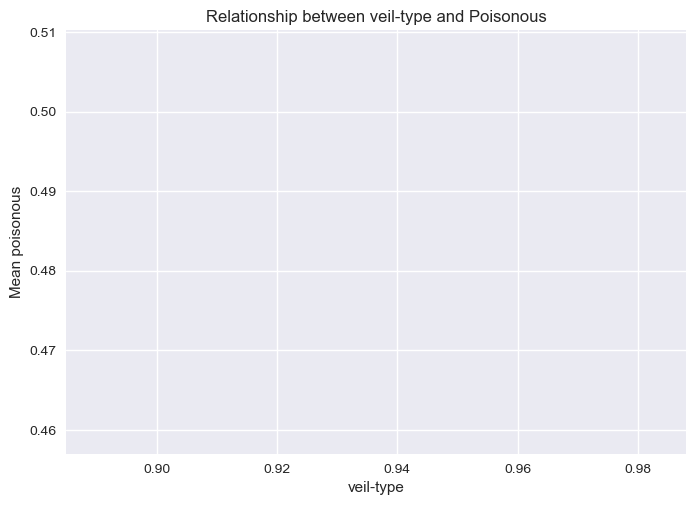

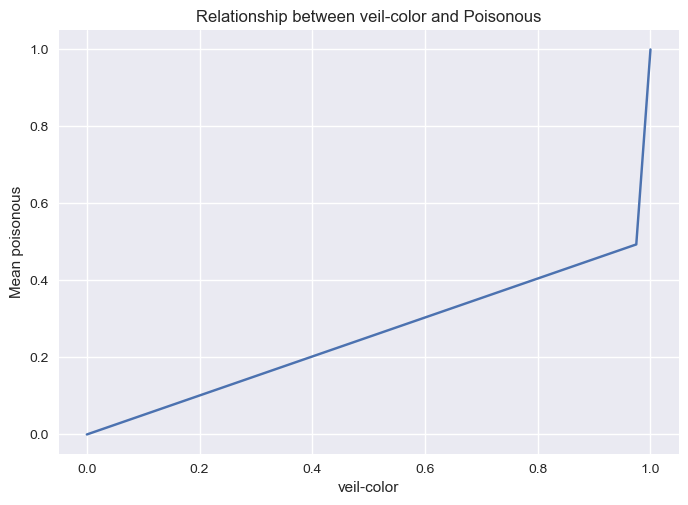

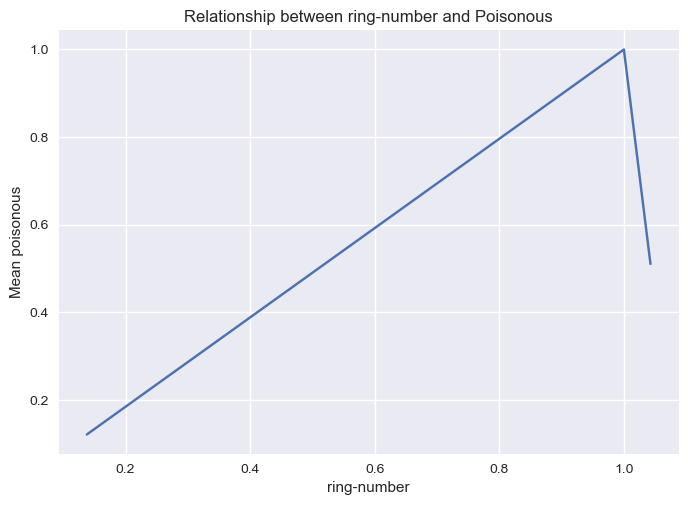

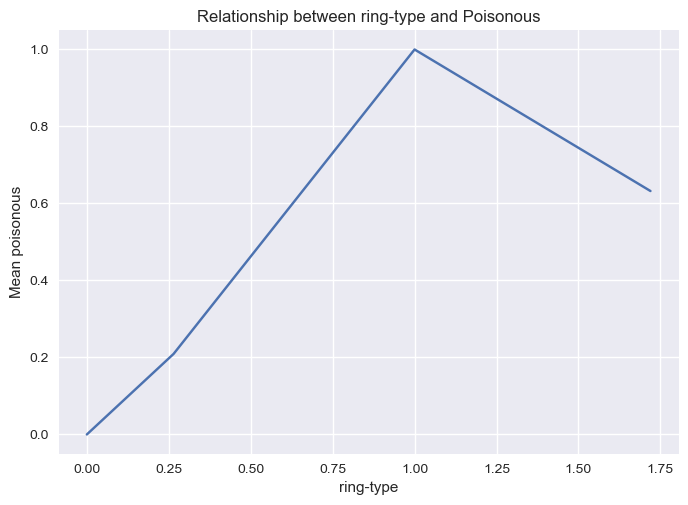

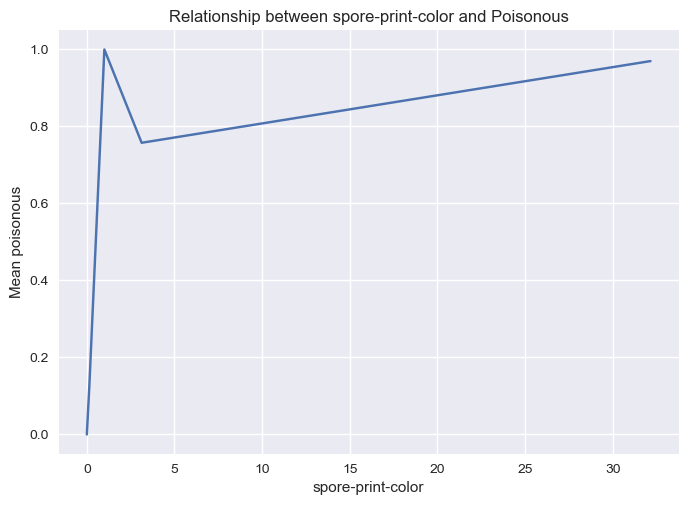

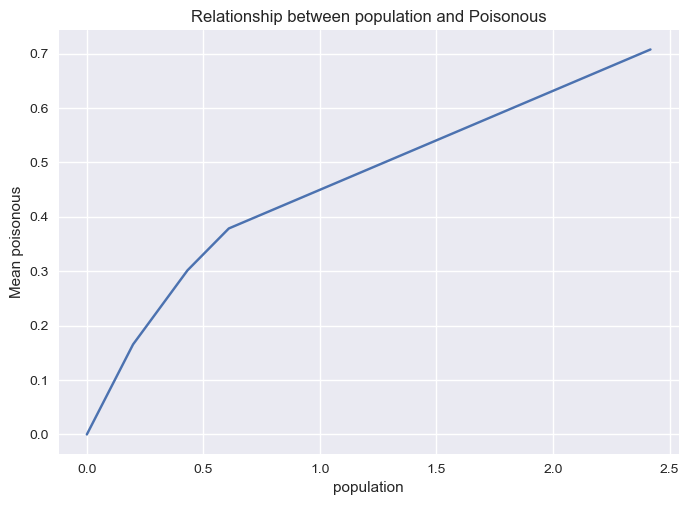

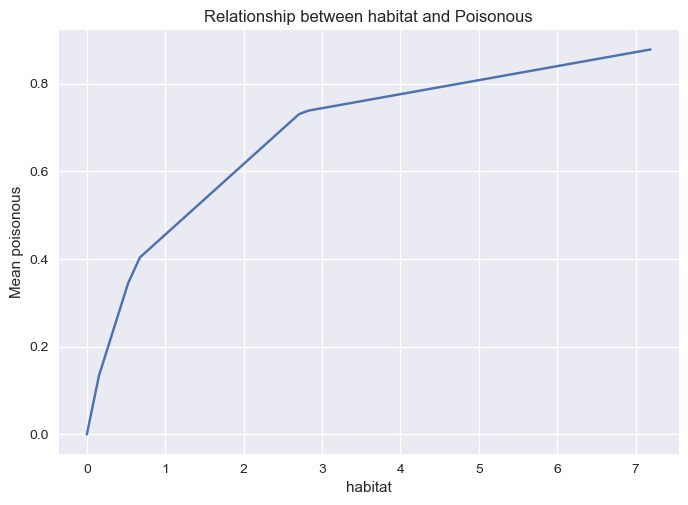

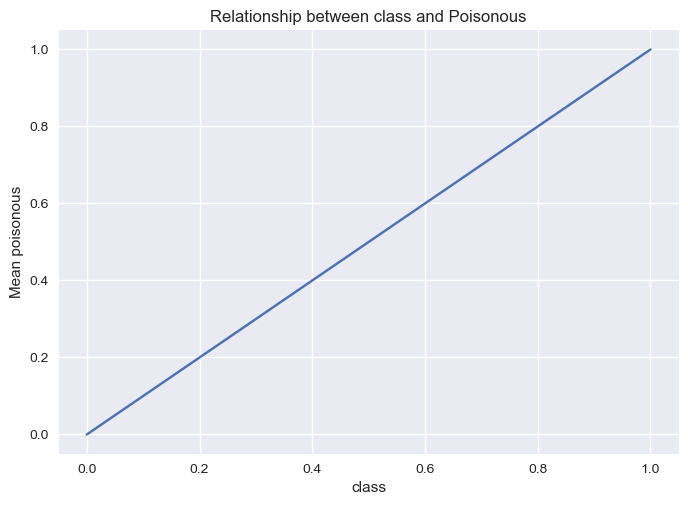

In [37]:
X_train_transform['class'] = y_train_encode
for col in X_train_transform.columns:  
    fig = plt.figure()
    fig = X_train_transform.groupby([col])['class'].mean().plot()
    fig.set_title(f'Relationship between {col} and Poisonous')
    fig.set_ylabel('Mean poisonous')
    plt.show()

In [38]:
### The function has a break to 1 when one of the feature classes contains only poisonous mushrooms

### 6. Mean Encoding

In [39]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

X_train_transform['class'] = y_train_encode

In [40]:
def find_category_mappings(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [41]:
for col in cat_columns:
    mappings = find_category_mappings(X_train_transform, col, 'class')
    integer_encode(X_train_transform, X_test_transform, col, mappings)

In [42]:
X_train_transform.drop('class', axis=1, inplace=True)

In [43]:
gaussian_model('Mean Encoding', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 99.14
F1 score: 0.99
[[852   0]
 [ 14 759]]


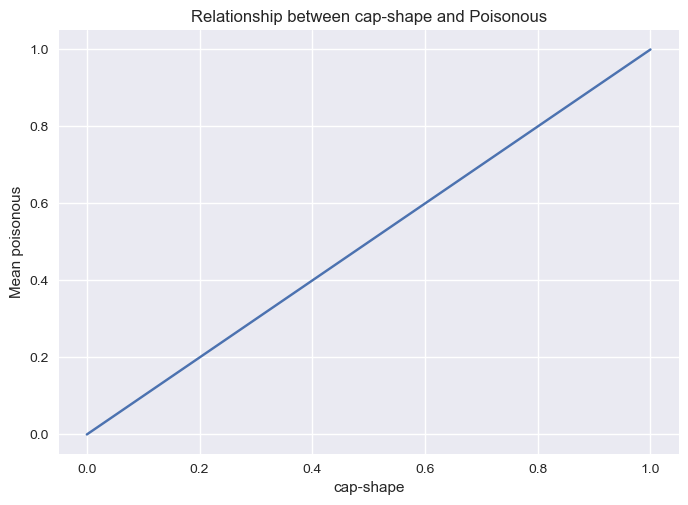

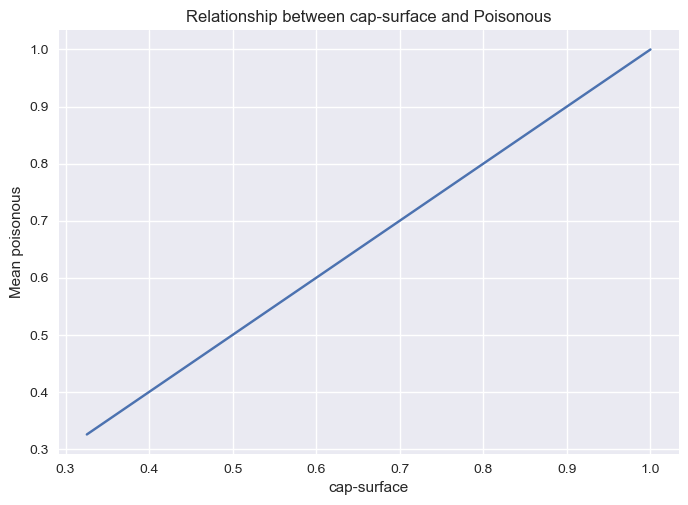

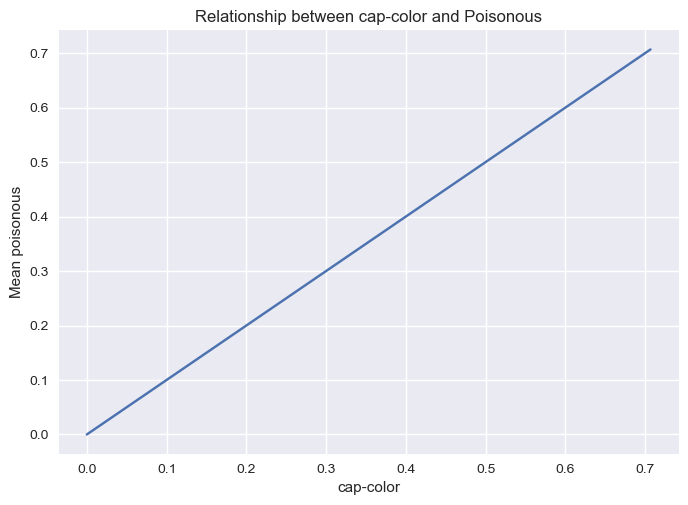

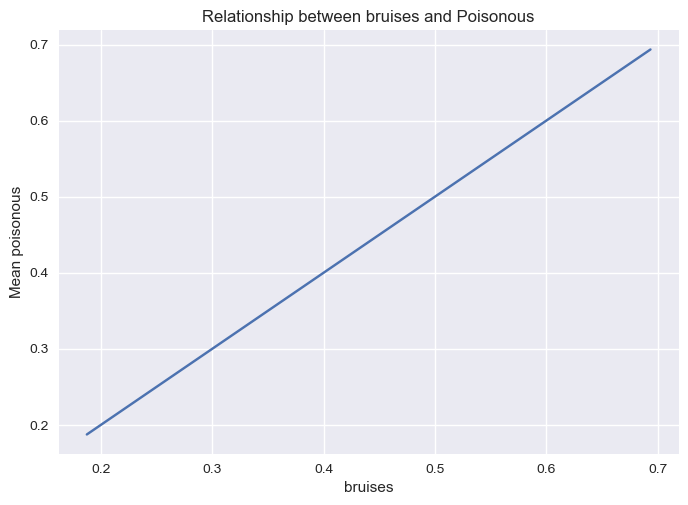

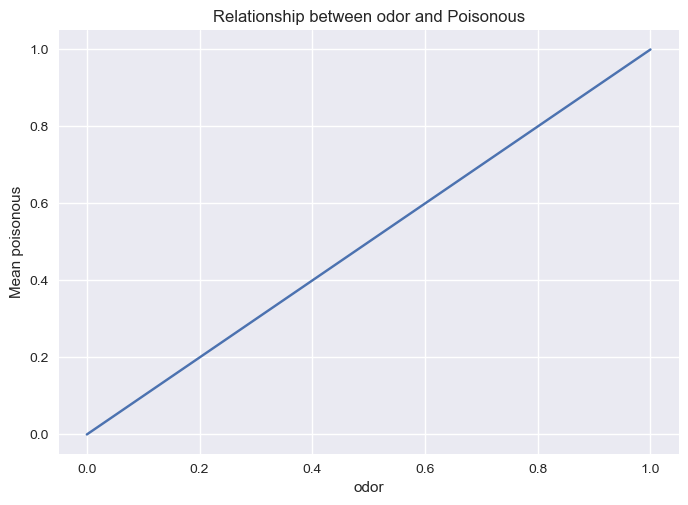

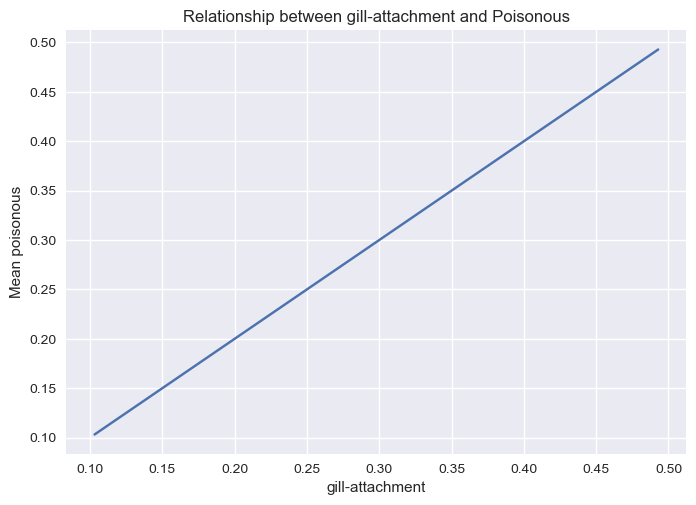

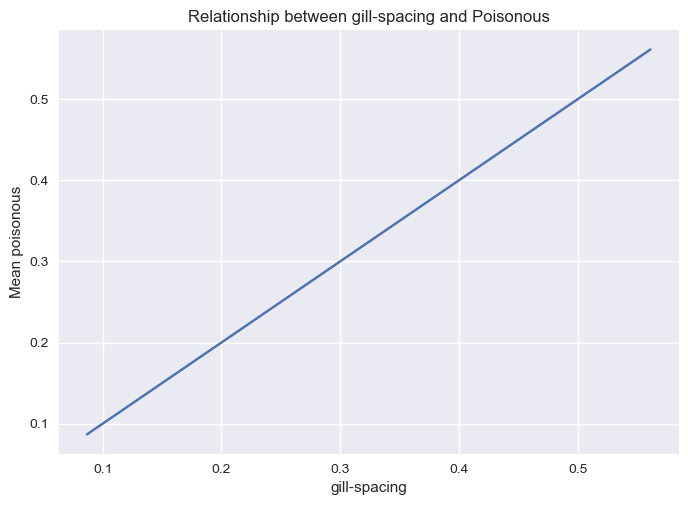

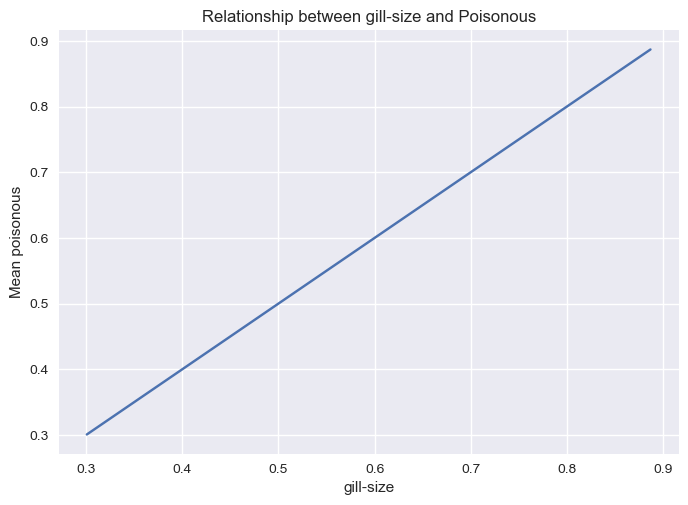

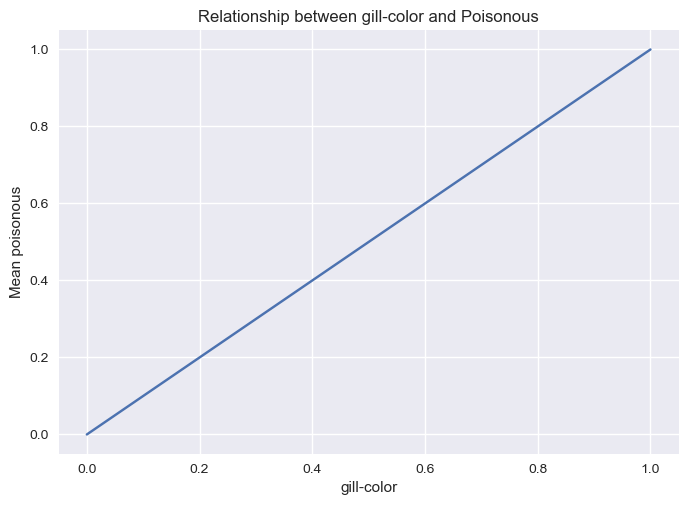

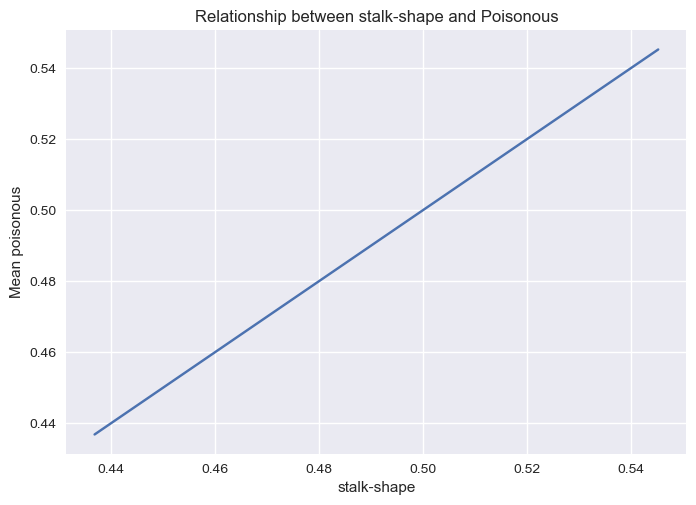

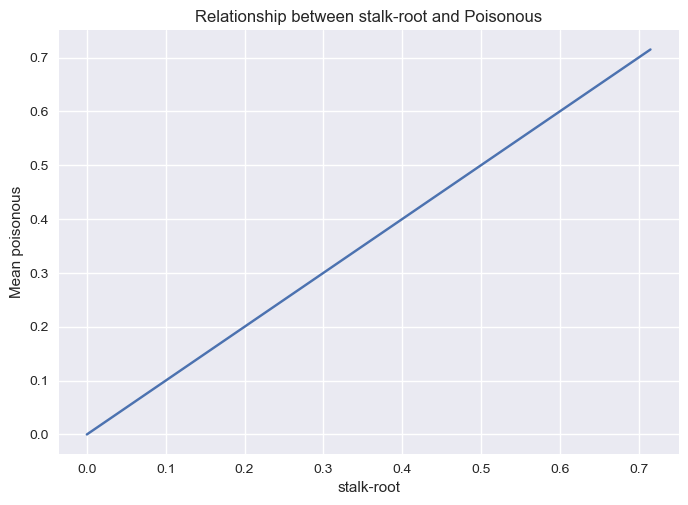

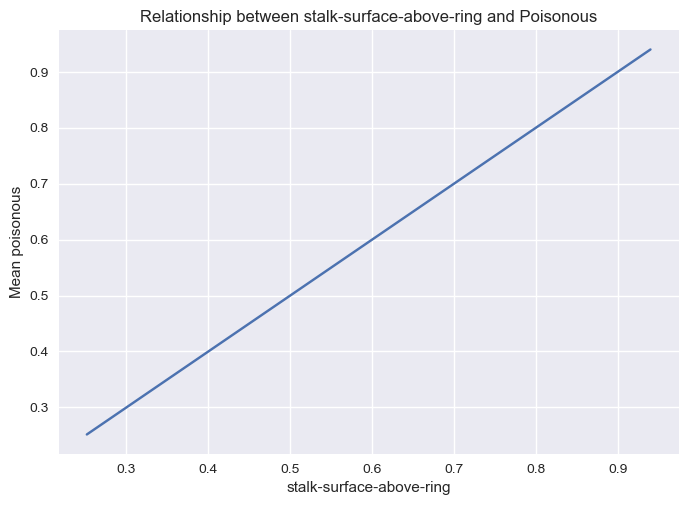

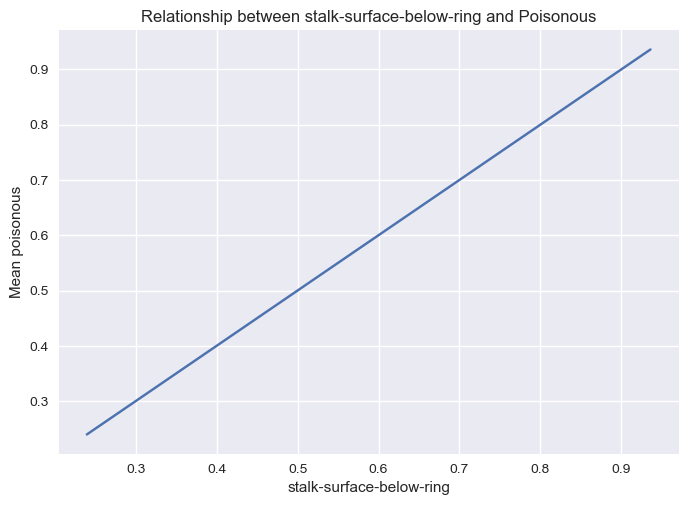

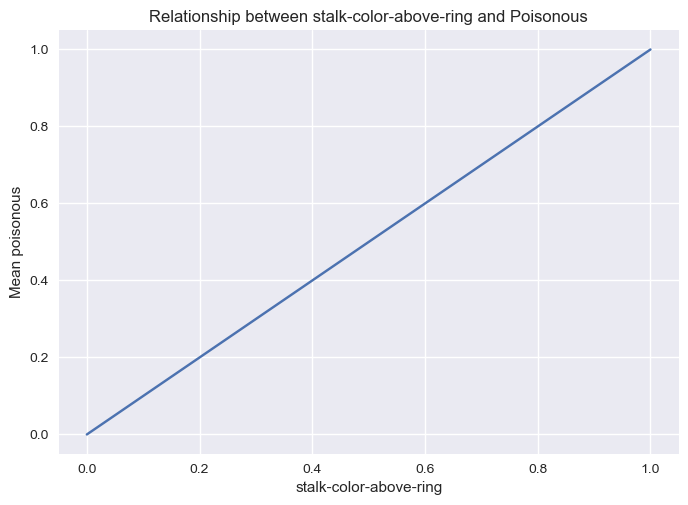

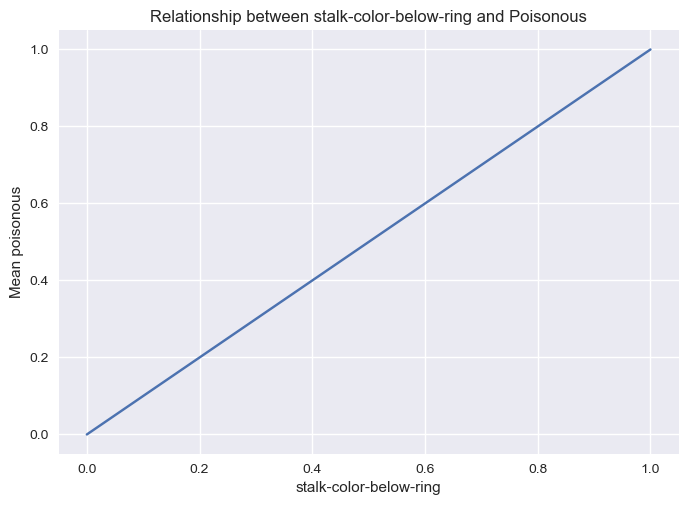

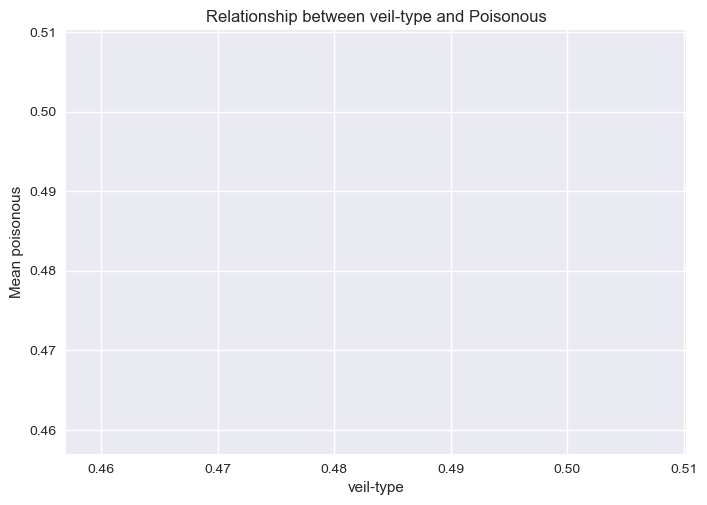

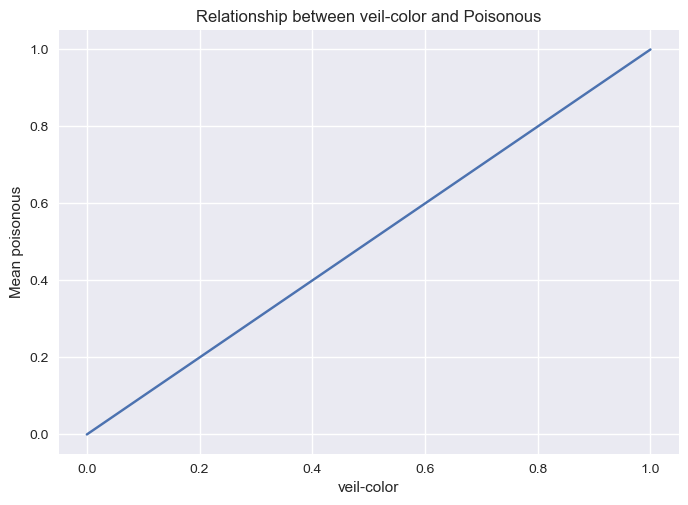

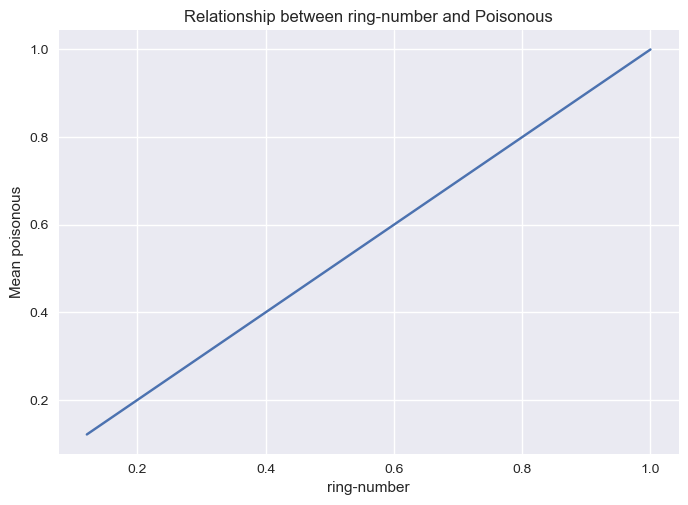

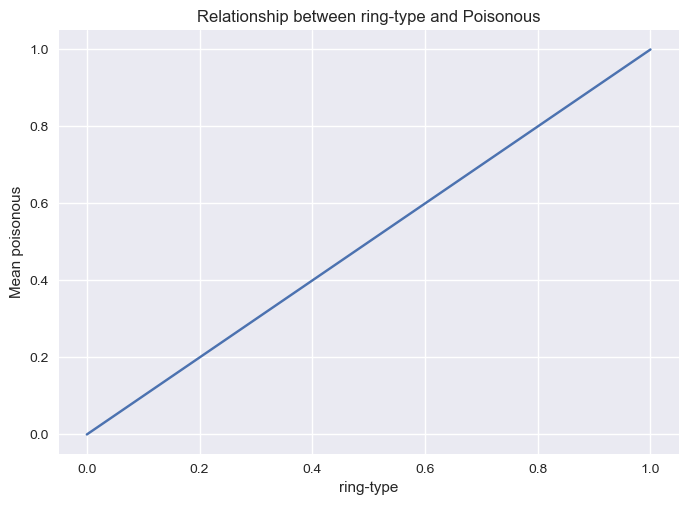

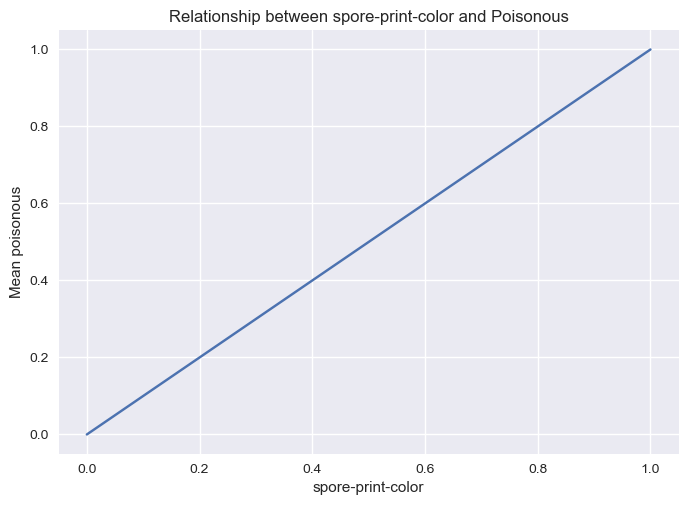

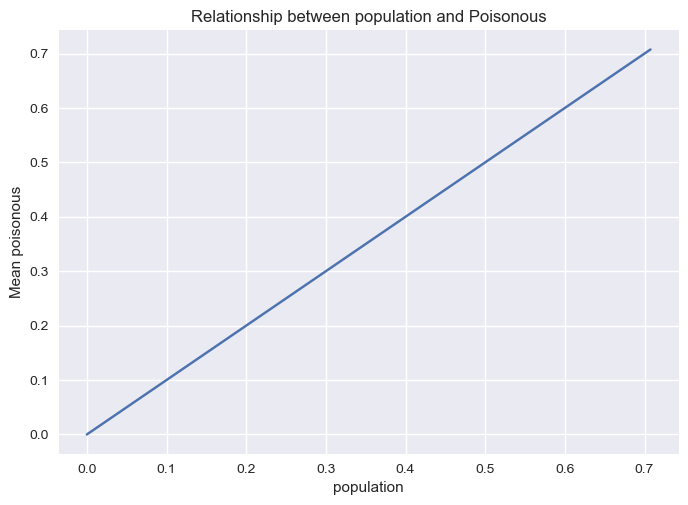

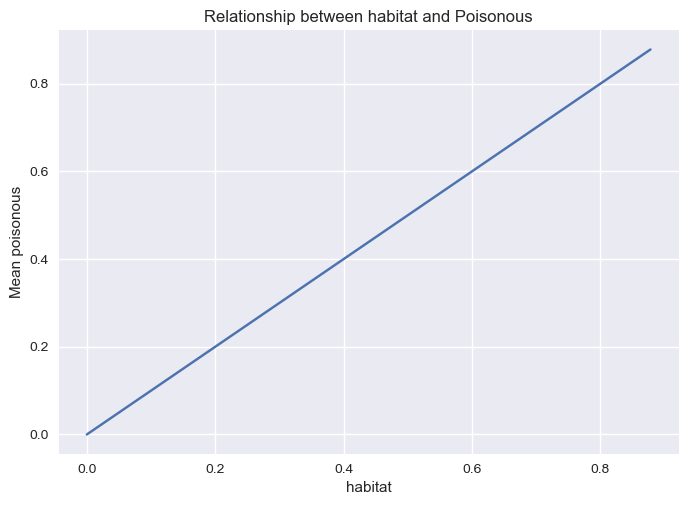

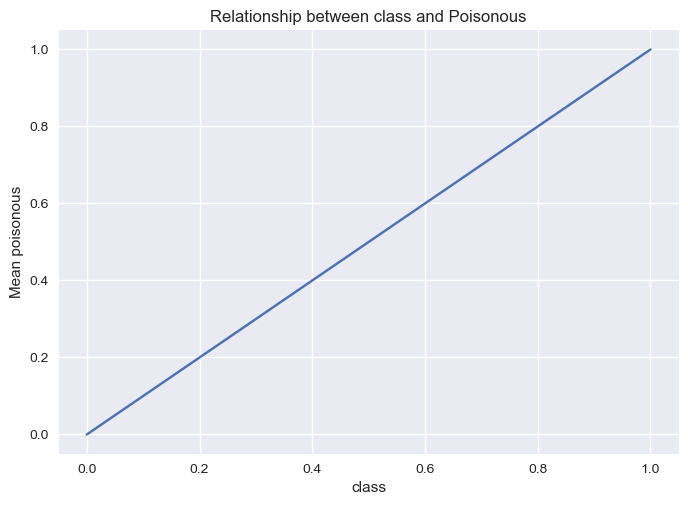

In [44]:
X_train_transform['class'] = y_train_encode
for col in X_train_transform.columns:  
    fig = plt.figure()
    fig = X_train_transform.groupby([col])['class'].mean().plot()
    fig.set_title(f'Relationship between {col} and Poisonous')
    fig.set_ylabel('Mean poisonous')
    plt.show()

### 7. Weight of evidence

- WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
- If P(Bads) > P(Goods) the odds ratio will be < 1 and,
- WoE will be < 0 if,  P(Goods) > P(Bads).

In [45]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

X_train_transform['class'] = y_train_encode

In [46]:
def find_category_mappings(df, variable, target):
    df_copy = df.copy()
    
    # total positive class
    total_pos = df_copy[target].sum()
    
    # total negative class
    total_neg = len(df_copy) - df_copy[target].sum()

    # non target
    df_copy['non-target'] = 1 - df_copy[target]

    # % of positive class per category, respect to total positive class
    pos_perc = df_copy.groupby([variable])[target].sum() / total_pos

    # % of negative class per category, respect to total negative class
    neg_perc = df_copy.groupby([variable])['non-target'].sum() / total_neg

    # let's concatenate
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)
    
    # let's calculate the Weight of Evidence
    prob_tmp['woe'] = np.log(prob_tmp[target]/prob_tmp['non-target'])
    return prob_tmp['woe'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [47]:
for col in cat_columns:
    mappings = find_category_mappings(X_train_transform, col, 'class')
    integer_encode(X_train_transform, X_test_transform, col, mappings)

C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Me\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.p

In [48]:
X_train_transform.replace([np.inf, -np.inf], 0, inplace=True)
X_train_transform.drop('class', axis=1, inplace=True)
X_test_transform.replace([np.inf, -np.inf], 0, inplace=True)

In [49]:
X_train_transform.describe()

cap-shape  cap-surface    cap-color      bruises         odor  \
count  6499.000000  6499.000000  6499.000000  6499.000000  6499.000000   
mean     -0.016483    -0.009566     0.005042    -0.064923    -1.410228   
std       0.578918     0.417948     0.427379     1.125111     1.603333   
min      -2.036057    -0.663063    -1.033040    -1.401526    -3.232828   
25%      -0.053510    -0.663063    -0.171456    -1.401526    -3.232828   
50%      -0.053510     0.208396    -0.145271     0.882014     0.000000   
75%       0.041171     0.314258     0.413879     0.882014     0.000000   
max       1.014827     0.314258     0.945305     0.882014     0.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      6499.000000   6499.000000  6499.000000  6499.000000  6499.000000   
mean         -0.013687     -0.113446     0.127862    -0.546216    -0.000533   
std           0.325558      0.960997     1.346394     1.018734     0.215837   
min          -2.096313     -2.288904    -0.778852    -2.128799    -0.188422   
25%           0.037197      0.311004    -0.778852    -1.329703    -0.188422   
50%           0.037197      0.311004    -0.778852    -0.231904    -0.188422   
75%           0.037197      0.311004     2.126836     0.000000     0.247370   
max           0.037197      0.311004     2.126836     0.987762     0.247370   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               6499.000000             6499.000000   
mean   ...                  0.232228                0.163251   
std    ...                  1.584064                0.920319   
min    ...                 -1.088921               -0.398362   
25%    ...                 -0.713745               -0.398362   
50%    ...                 -0.713745               -0.398362   
75%    ...                  2.746710                0.865910   
max    ...                  2.746710                3.341264   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             6499.000000     6499.0  6499.000000  6499.000000   
mean                 0.109360        0.0     0.039171    -0.044757   
std                  0.711461        0.0     0.005939     0.532677   
min                 -0.407388        0.0     0.000000    -1.916014   
25%                 -0.407388        0.0     0.040071     0.107377   
50%                 -0.407388        0.0     0.040071     0.107377   
75%                  0.892936        0.0     0.040071     0.107377   
max                  1.970211        0.0     0.040071     0.107377   

         ring-type  spore-print-color   population      habitat  
count  6499.000000        6499.000000  6499.000000  6499.000000  
mean     -0.401334           0.148394     0.191439     0.101689  
std       0.860312           2.159340     0.802202     0.991992  
min      -1.263341          -1.950779    -1.552524    -1.793746  
25%      -1.263341          -1.912599    -0.430111    -0.575929  
50%       0.000000           0.000000     0.000000    -0.324656  
75%       0.607784           1.205348     0.948548     1.060271  
max       0.607784           3.536104     0.948548     2.038150  

[8 rows x 22 columns]

In [50]:
gaussian_model('Weight of evidence', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 96.12
F1 score: 0.96
[[841  11]
 [ 52 721]]


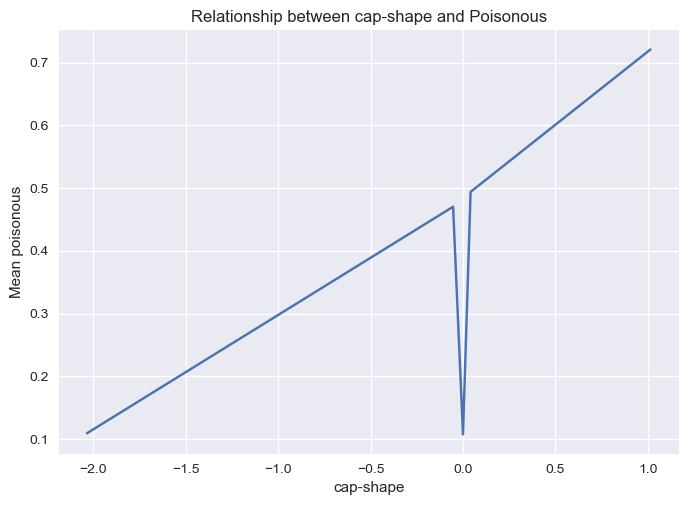

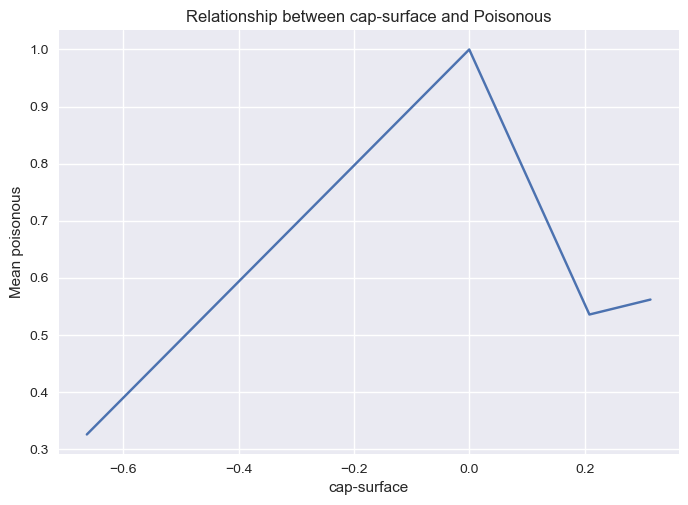

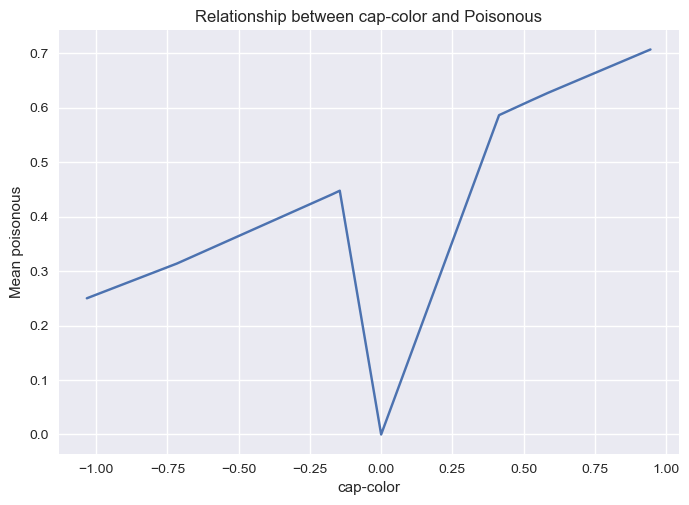

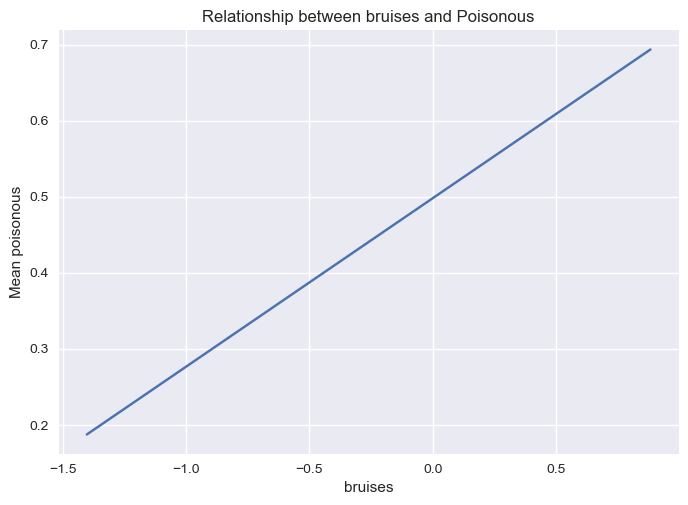

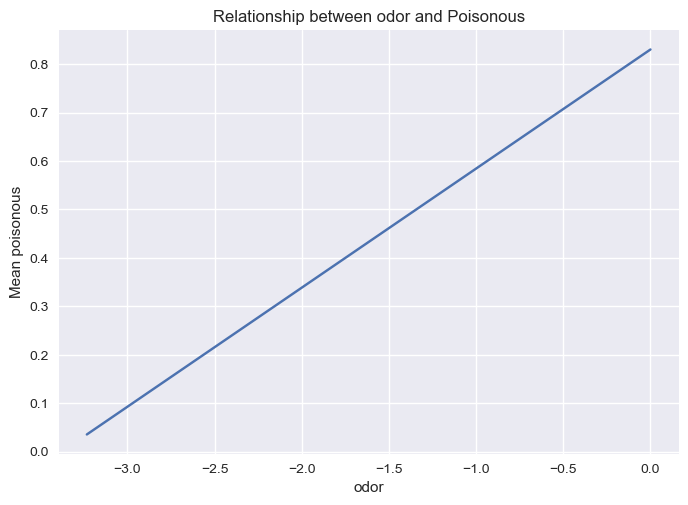

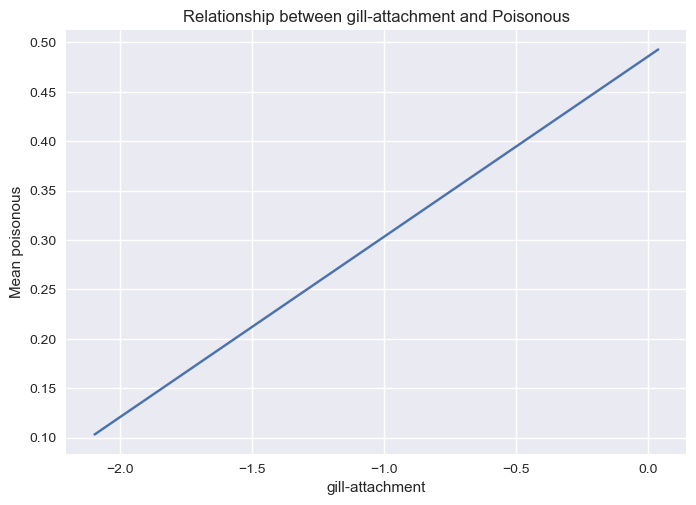

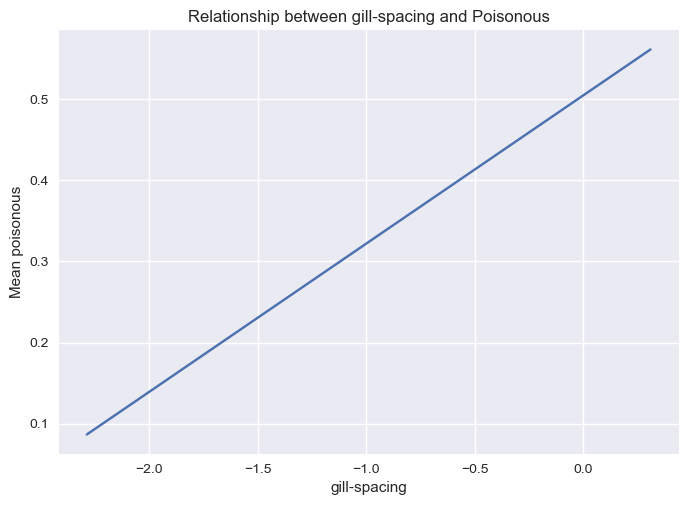

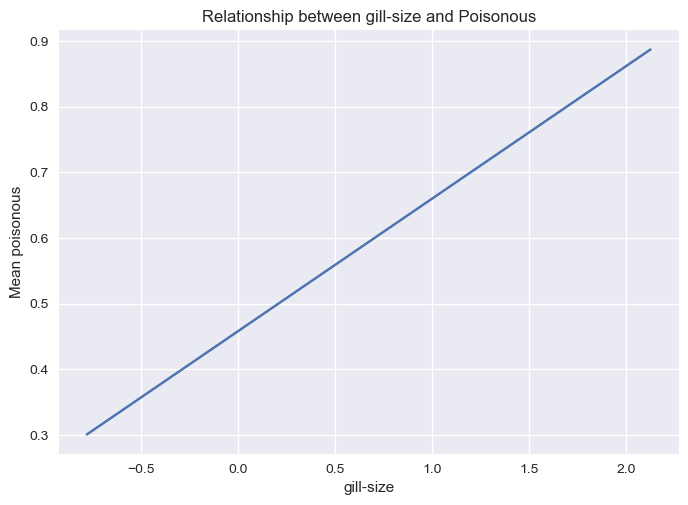

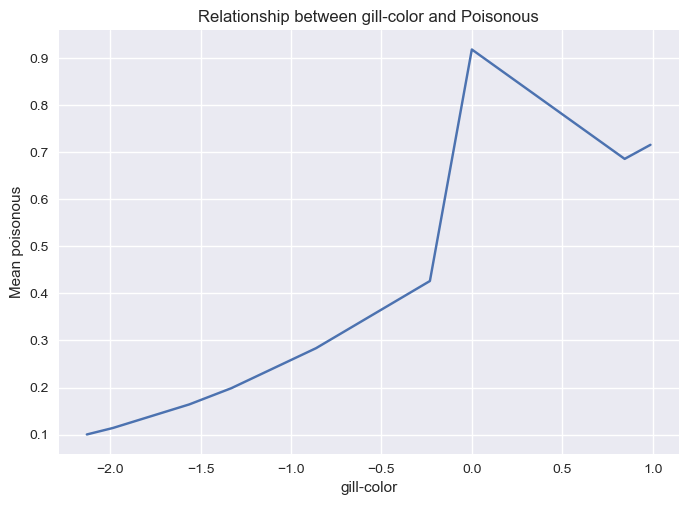

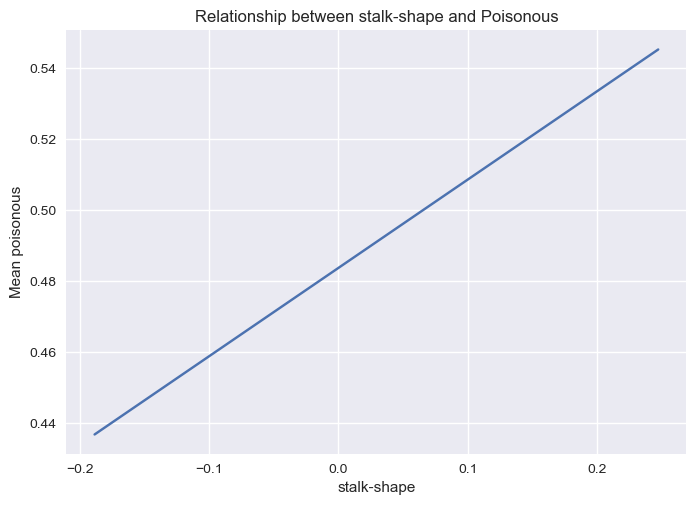

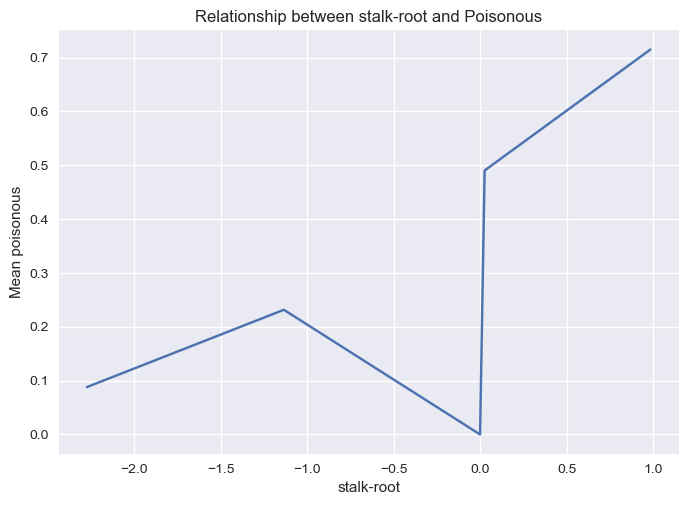

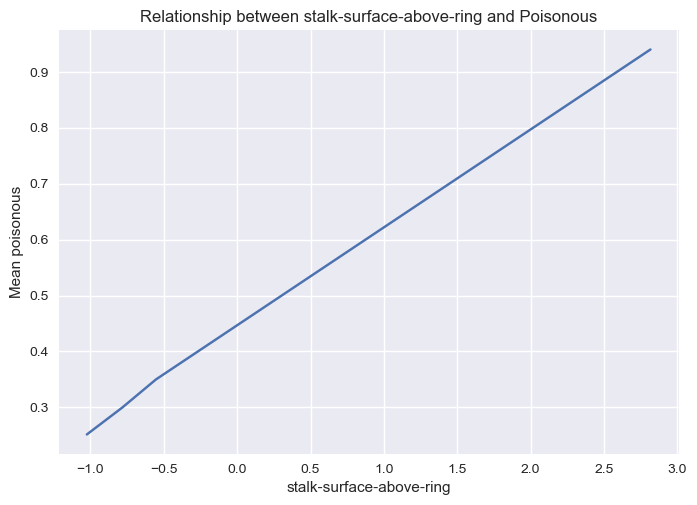

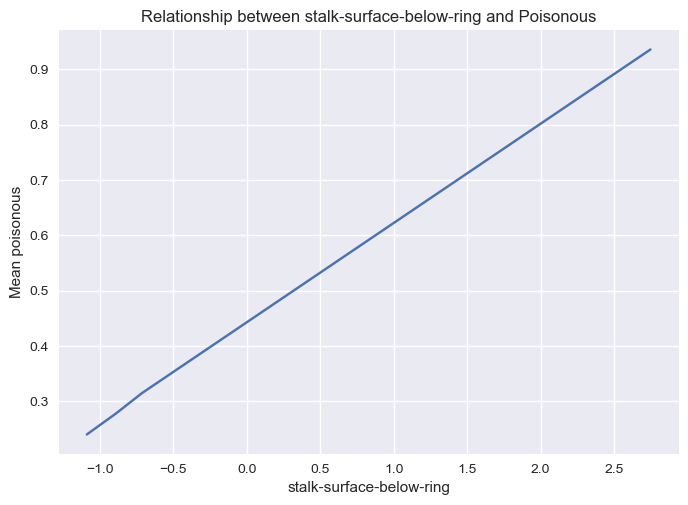

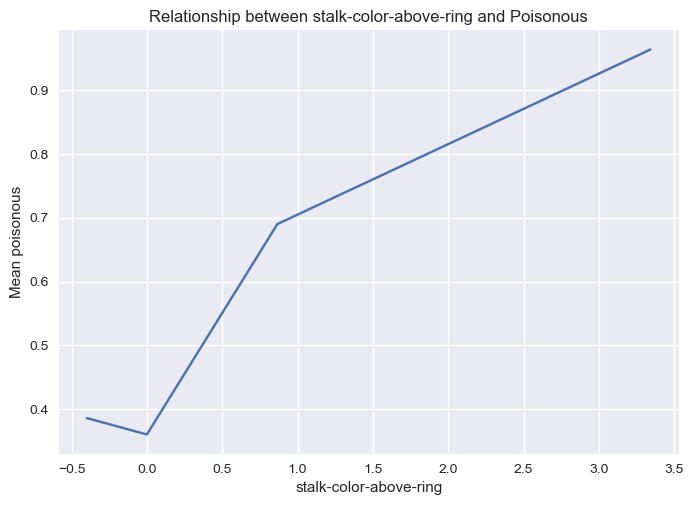

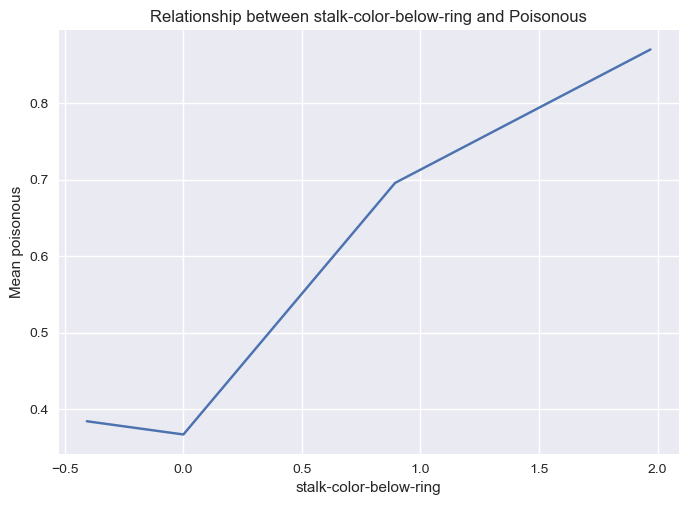

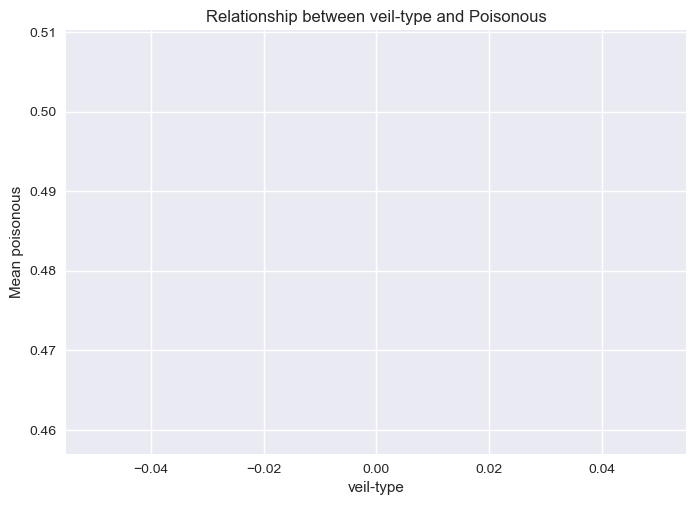

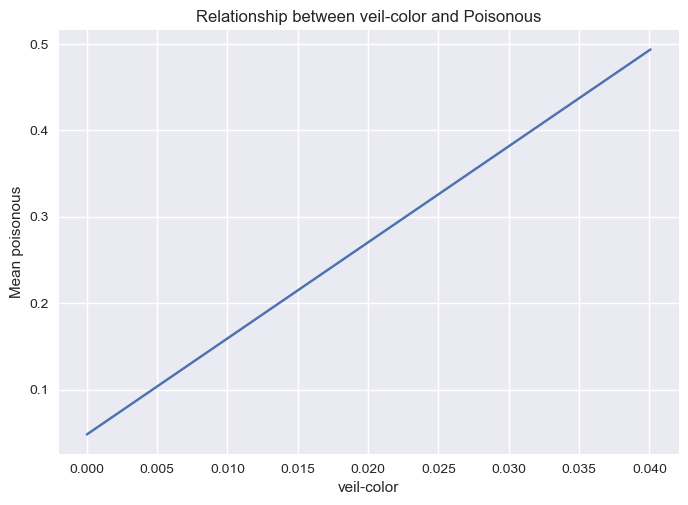

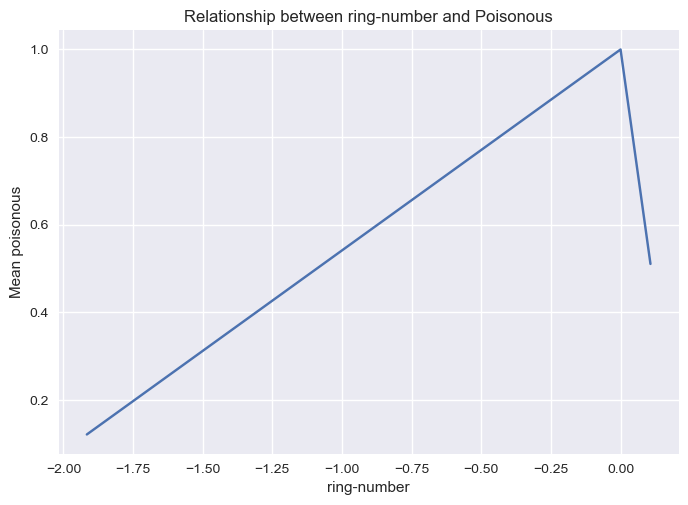

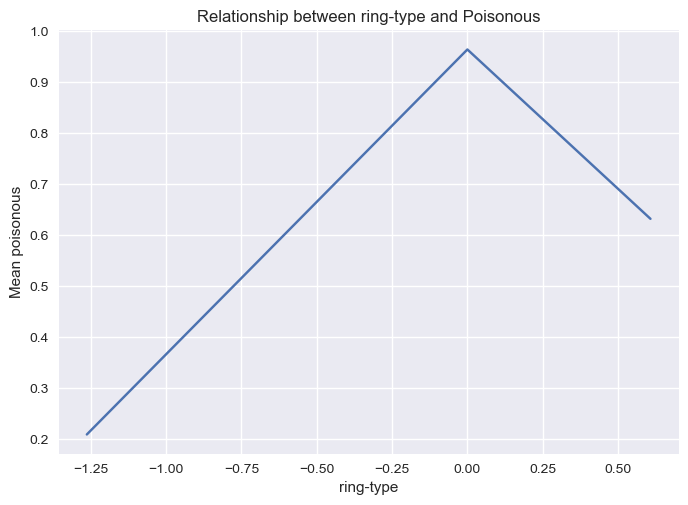

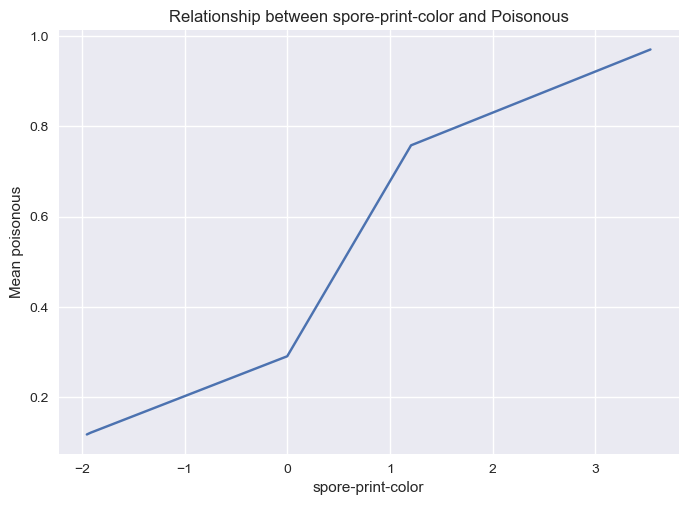

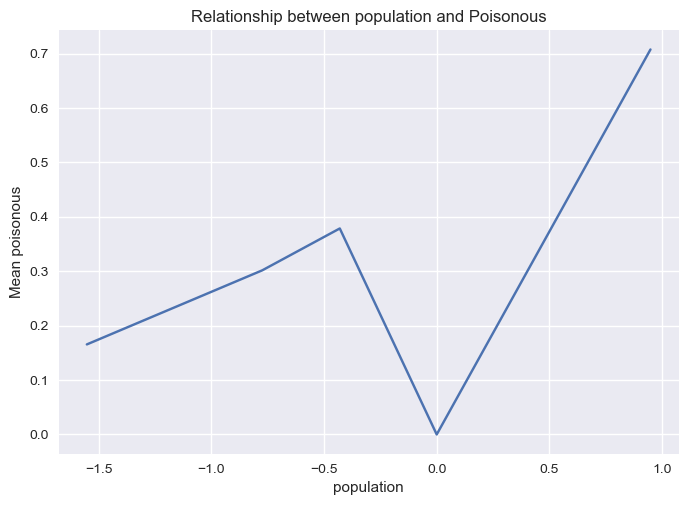

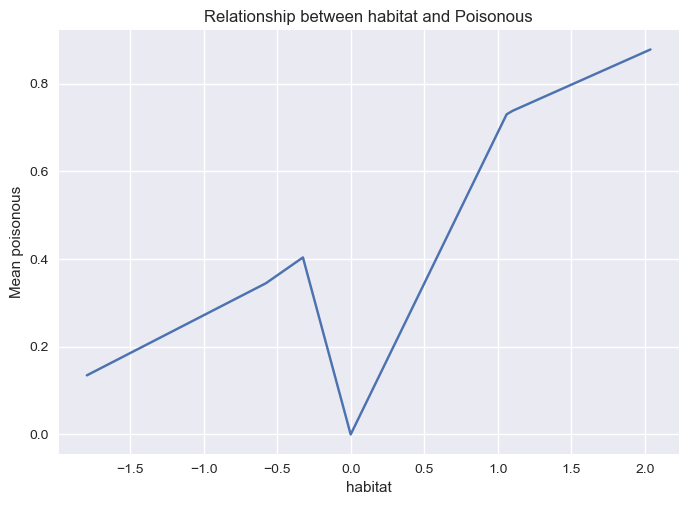

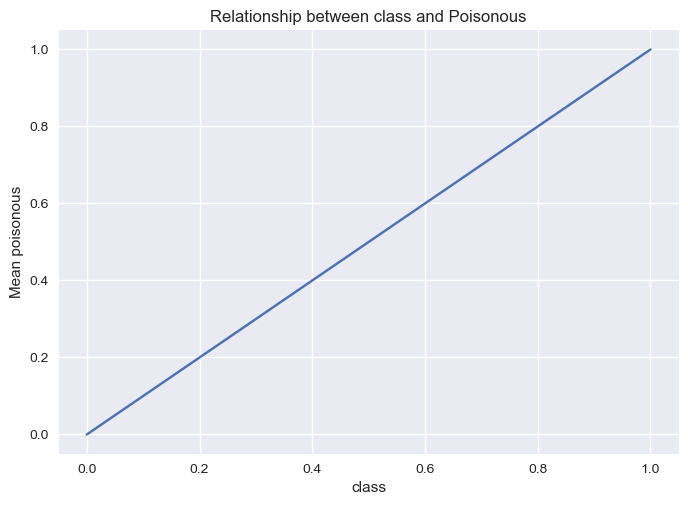

In [51]:
X_train_transform['class'] = y_train_encode
for col in X_train_transform.columns:  
    fig = plt.figure()
    fig = X_train_transform.groupby([col])['class'].mean().plot()
    fig.set_title(f'Relationship between {col} and Poisonous')
    fig.set_ylabel('Mean poisonous')
    plt.show()

In [52]:
#The function has a break to 1 or 0 when one of the feature classes contains only poisonous mushrooms or edible

### 8. Leave One Out encoding

In [53]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

X_train_transform['class'] = y_train_encode

In [54]:
def find_category_mappings(df, variable, target, return_df=False):
    dic_group = df.groupby(variable).agg({target: ['count', 'mean']}).droplevel(axis=1, level=0)    
    new_dict = dict()
    new_var_feature = []
    for i in df.index:
        val = df.loc[i, variable]
        new_val = (dic_group.loc[val]['mean']*dic_group.loc[val]['count'] - df.loc[i, 'class']) \
                    / (dic_group.loc[val]['count']-1)
        new_var_feature.append(new_val)
        if str(val) in new_dict:
            new_dict[str(val)] += (new_val/dic_group.loc[val]['count'])
        else:
            new_dict[str(val)] = new_val/dic_group.loc[val]['count']
    if return_df == True:
        df[variable] = new_var_feature
    return new_dict

In [55]:
def leave_one_out_encode(train, test, variable, loo_mapping, return_df=True):
    if return_df==False:
        train[variable] = train[variable].map(loo_mapping)
    test[variable] = test[variable].map(loo_mapping)

In [56]:
for col in cat_columns:
    mappings = find_category_mappings(X_train_transform, col, 'class', True)
    leave_one_out_encode(X_train_transform, X_test_transform, col, mappings)

In [57]:
X_train_transform.drop('class', axis=1, inplace=True)

In [58]:
gaussian_model('Leave one out', X_train_transform, X_test_transform, y_train_encode, y_test_encode)

Gaussian Naive Bayes model accuracy: 99.14
F1 score: 0.99
[[852   0]
 [ 14 759]]


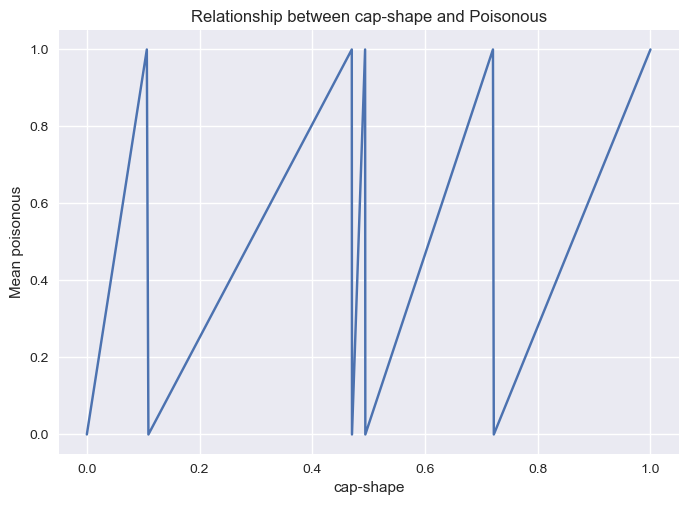

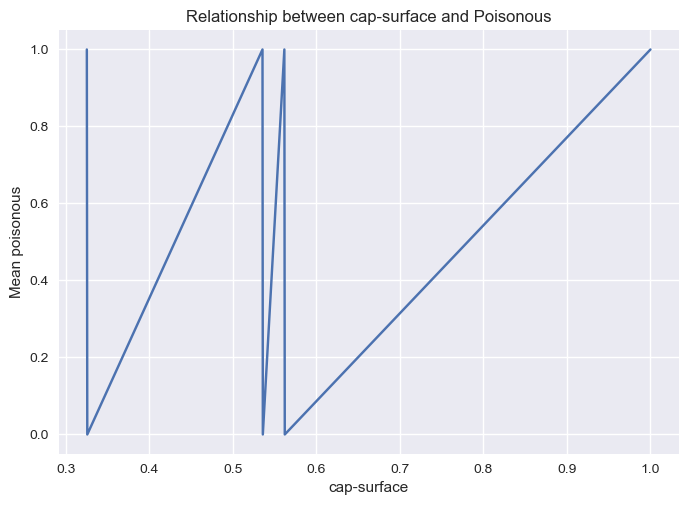

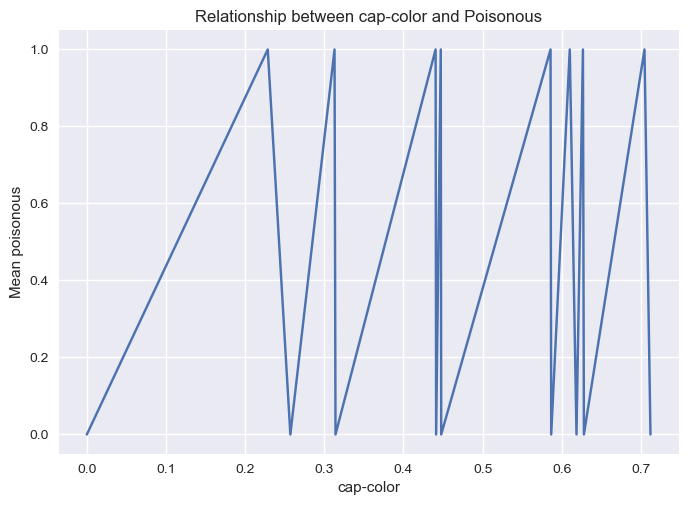

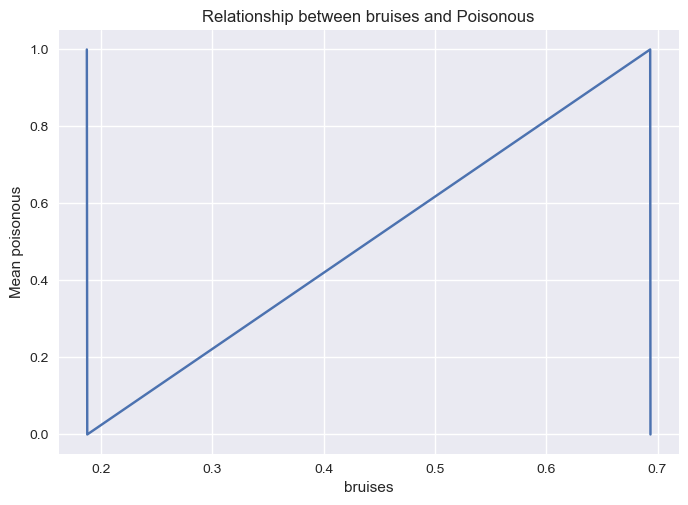

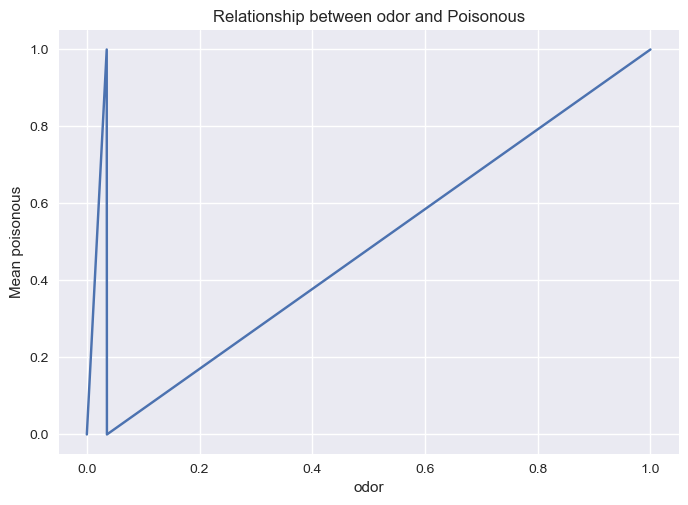

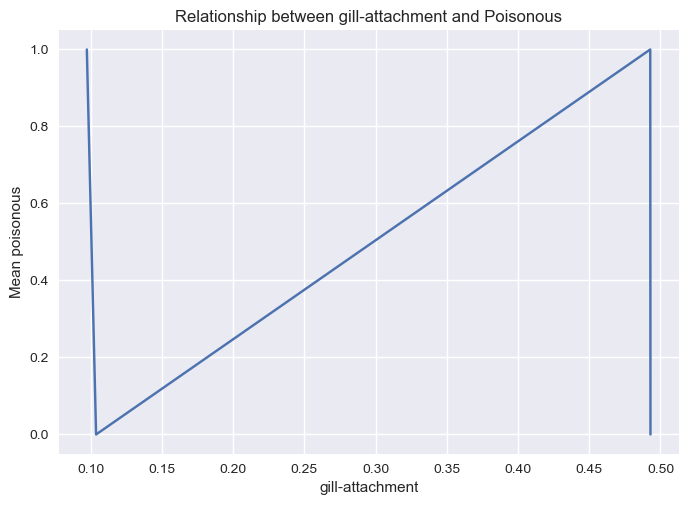

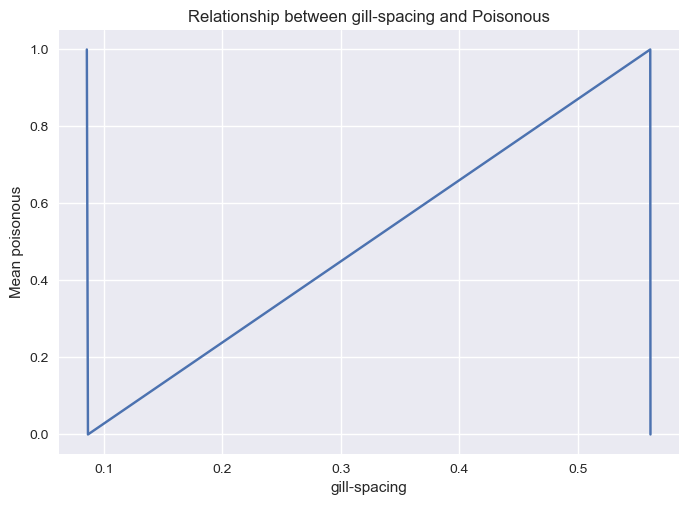

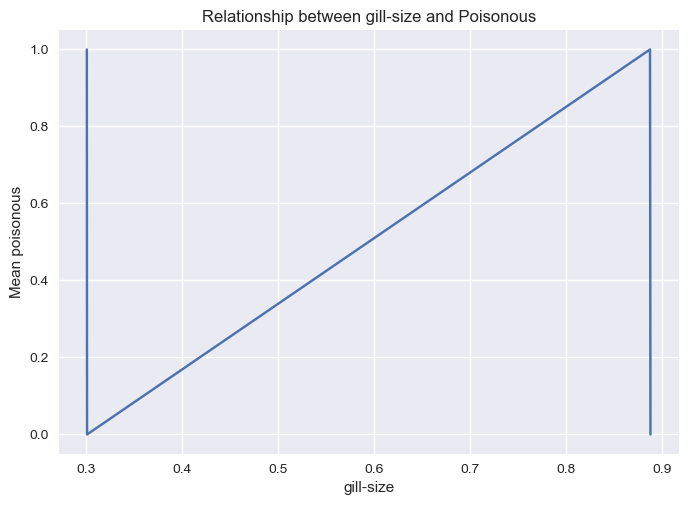

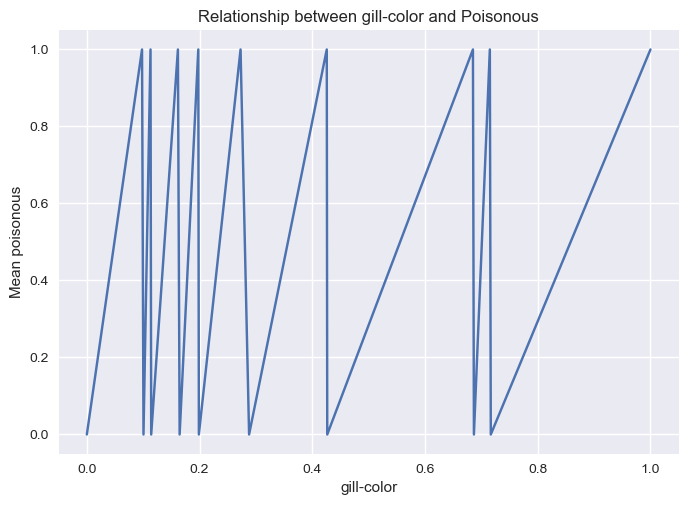

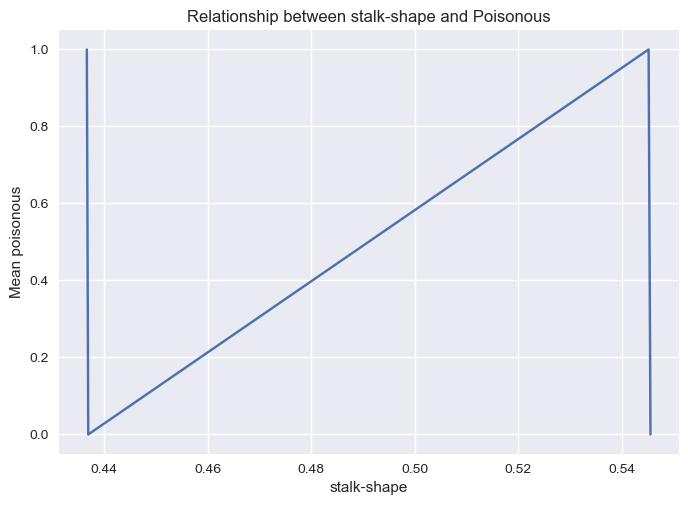

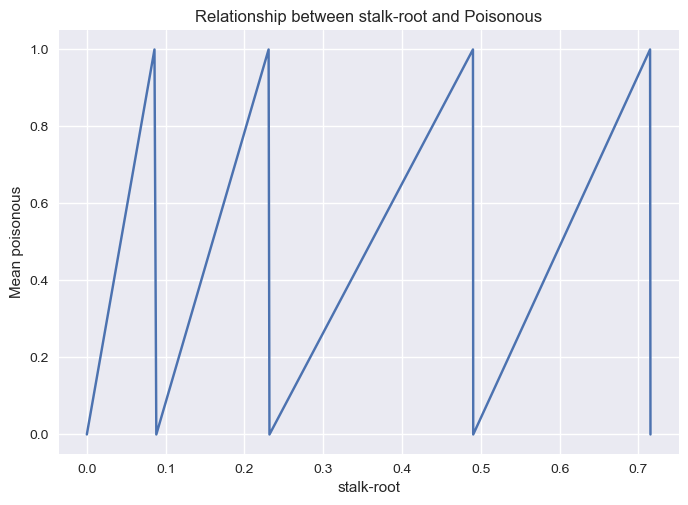

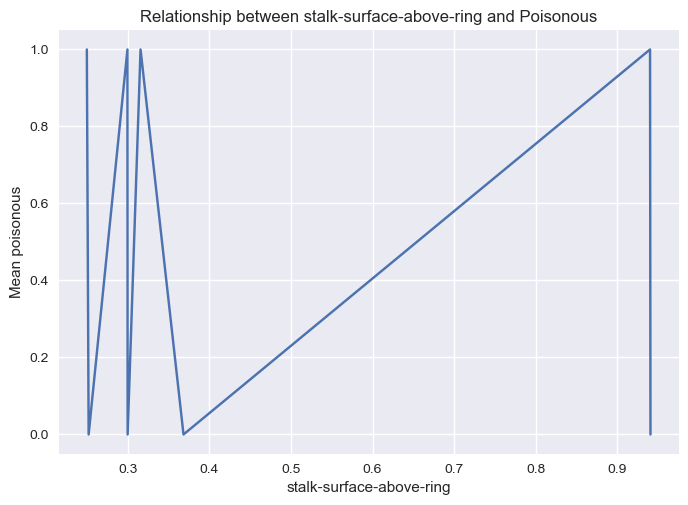

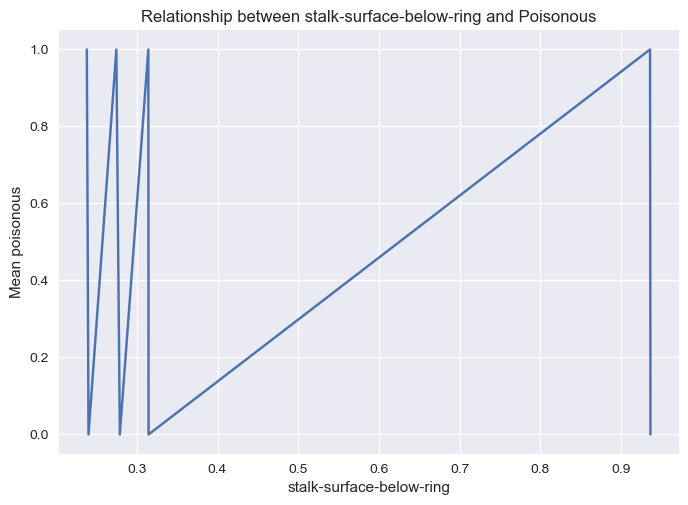

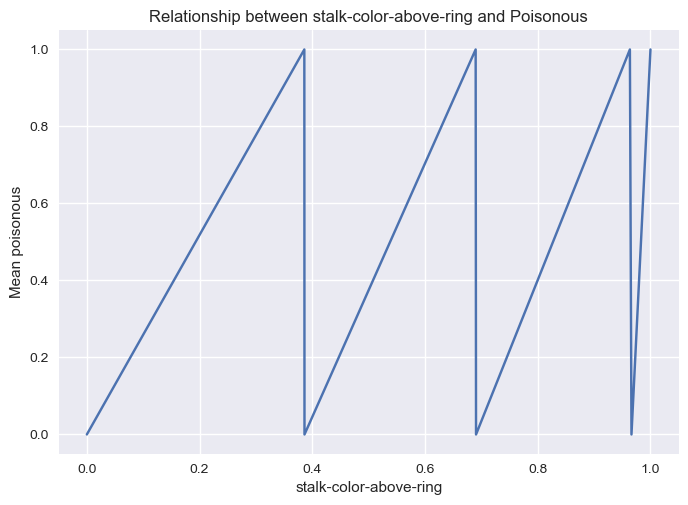

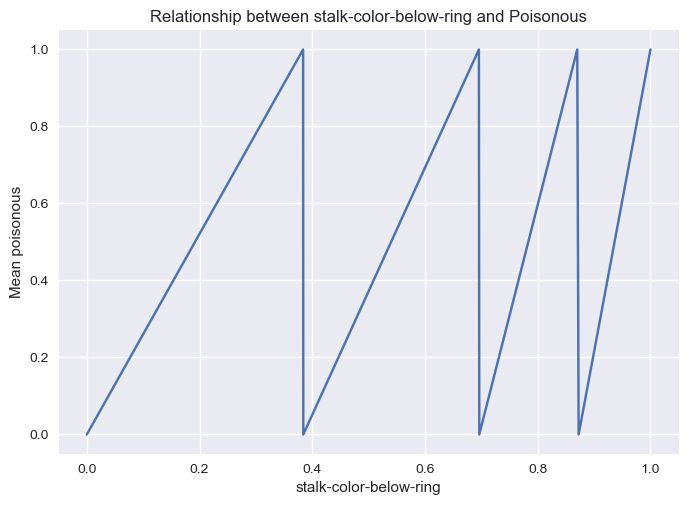

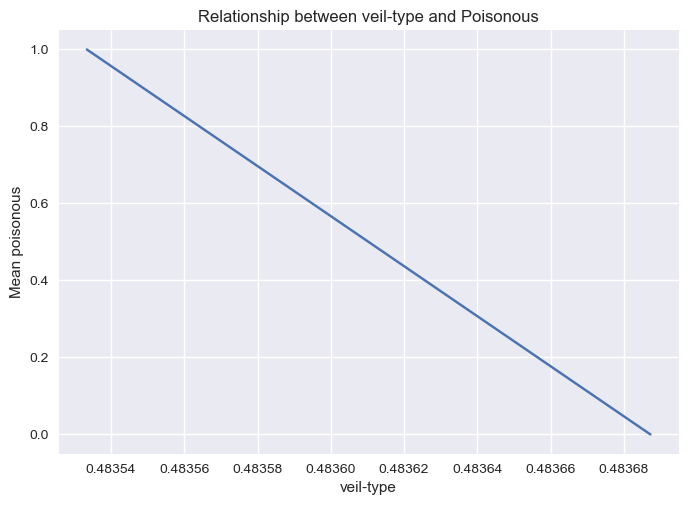

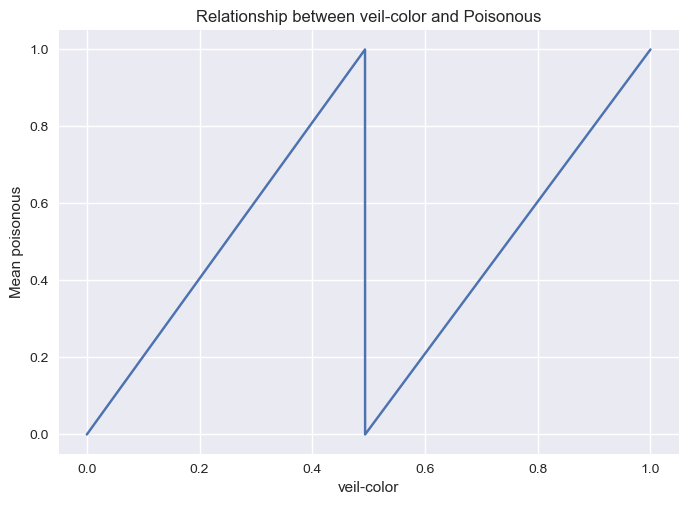

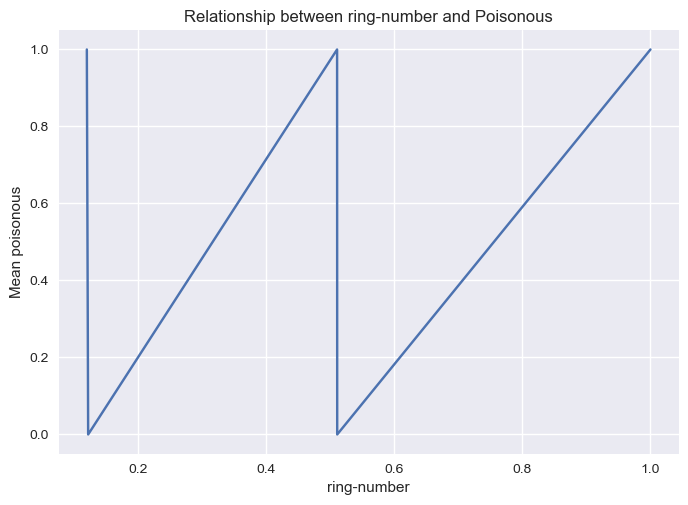

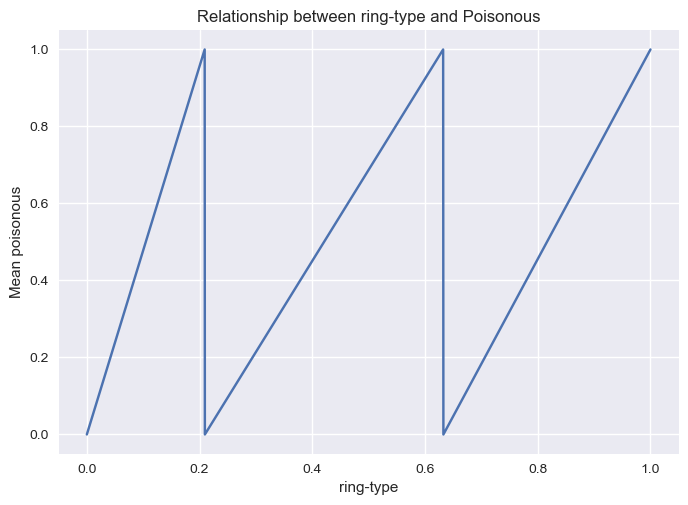

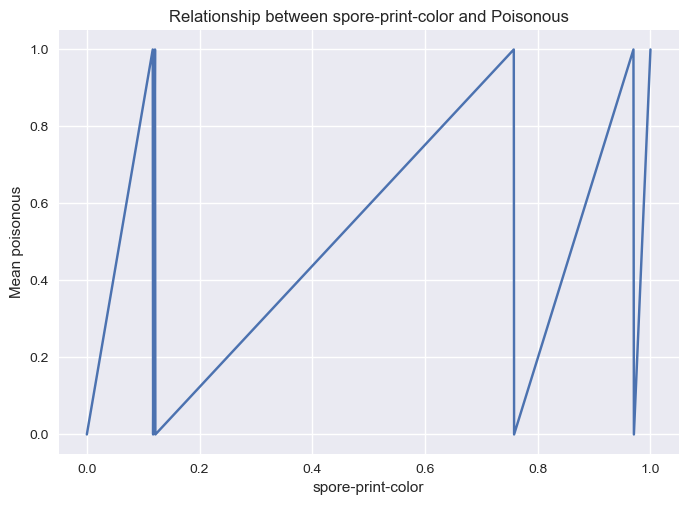

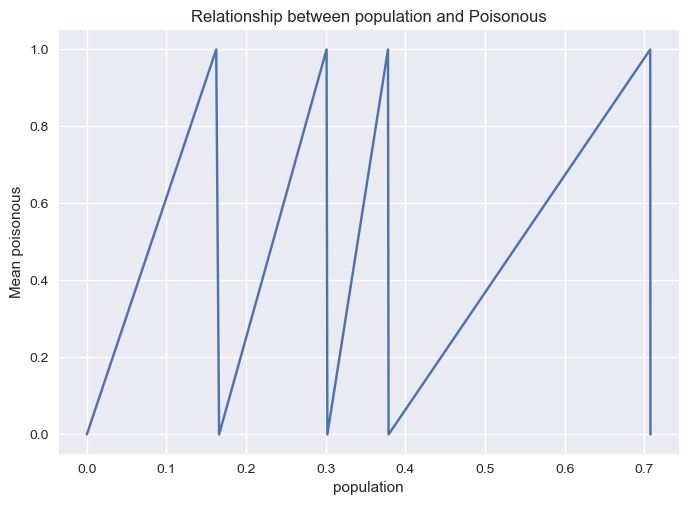

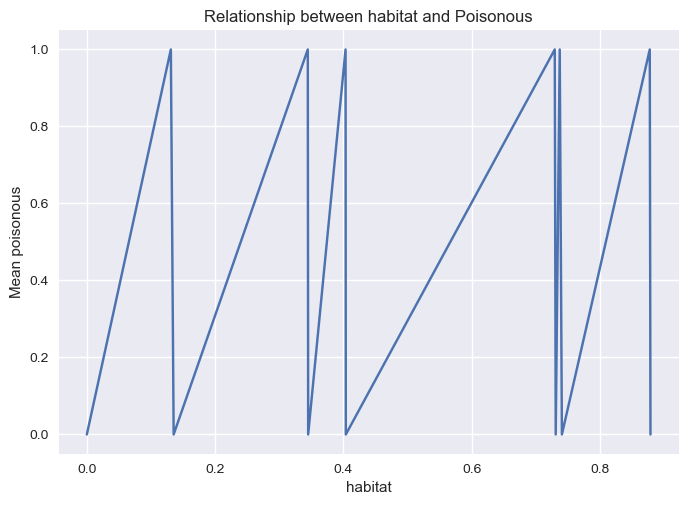

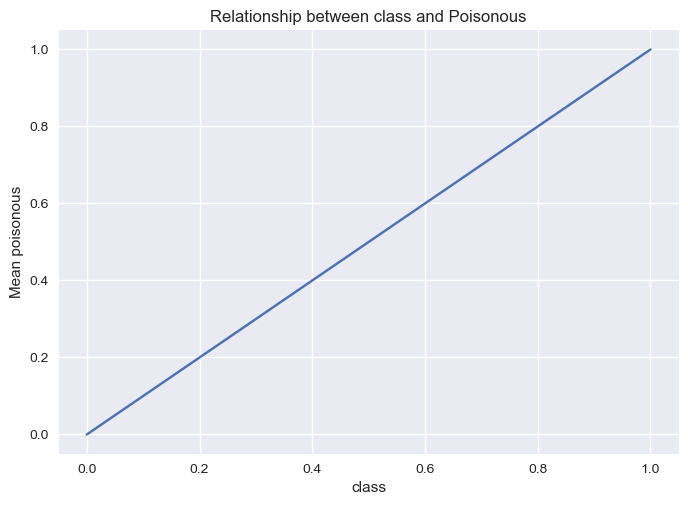

In [61]:
X_train_transform['class'] = y_train_encode
for col in X_train_transform.columns:  
    fig = plt.figure()
    fig = X_train_transform.groupby([col])['class'].mean().plot()
    fig.set_title(f'Relationship between {col} and Poisonous')
    fig.set_ylabel('Mean poisonous')
    plt.show()

So, here we replace the value in the train data set in place and we do not use a dictionary with means. It's a reason why the chart is not monotonic. Also, it's a binary classification problem, so the Leave one out method is very similar to Mean encoding.

In [66]:
df_result.sort_values('F1 score', ascending=False)

encoder   Test acc  F1 score
5               Mean Encoding  99.138462  0.990862
7               Leave one out  99.138462  0.990862
4  Probability Ratio Encoding  98.400000  0.983161
6          Weight of evidence  96.123077  0.958140
0                     One hot  94.830769  0.948466
3         Count and Frequency  94.646154  0.942498
1              Label Encoding  91.569231  0.912572
2            Ordinal Encoding  91.569231  0.912572

Target Based Encoding methods show the best results, but a leak is possible.